## Sep - Oct 2022
### Explore the distribution of PV length, DP for doublets and triplets
### Use 09-2022 PV algorithm with blocklists applied, use GO samples (with matched normal), no plasma follow-up in the manifests
### Explore the possibility to leverage only short PVs for MRD

In [38]:
import os
import pandas as pd
import numpy as np
import math
import scipy
from scipy import stats
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
from IPython.display import display
import fitter
from fitter import Fitter, get_common_distributions, get_distributions
pd.options.display.max_columns = None


import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
plt.rcParams['figure.dpi'] = 600
sns.set(style="whitegrid")

In [39]:
file = '~/Downloads/GO_PV_agg_non_IG_for_plot.csv'
df_GO_PV_non_IG = pd.read_csv(file, header=0, sep="\t")

In [40]:
file_2 = '~/Downloads/GO_PV_agg_allDP_non_IG_for_plot.csv'
df_GO_PV_allDP = pd.read_csv(file_2, header=0, sep="\t")

In [41]:
df_GO_PV_non_IG.head()

cluster_1based  num_snvs   chr  \
0  frozenset({'chr1_203306432_C_T', 'chr1_2033064...         2  chr1   
1  frozenset({'chr1_203306551_G_A', 'chr1_2033064...         3  chr1   
2  frozenset({'chr1_203306530_G_A', 'chr1_2033065...         2  chr1   
3  frozenset({'chr1_203306530_G_A', 'chr1_2033065...         3  chr1   
4  frozenset({'chr1_203306530_G_A', 'chr1_2033065...         2  chr1   

       start        end  ig_filter_pass  baseline_support  baseline_coverage  \
0  203306421  203306431            True               604               5200   
1  203306434  203306560            True                 2               1973   
2  203306529  203306550            True                 9               5648   
3  203306529  203306560            True                 8               4968   
4  203306529  203306560            True                 8               5017   

   baseline_af  PV_len  sample PV_len_cat  
0     0.116154      10   11001       0-50  
1     0.001014     126   11001    100-150  
2     0.001593      21   11001       0-50  
3     0.001610      31   11001       0-50  
4     0.001595      31   11001       0-50

In [42]:
df_GO_PV_non_IG.shape

(117721, 12)

In [43]:
df_GO_PV_allDP.shape

(133398, 12)

In [44]:
df_GO_PV_allDP.PV_len_cat.value_counts()

50-100     42665
0-50       42193
100-150    31492
150-175     9358
175-250     7337
>250         353
Name: PV_len_cat, dtype: int64

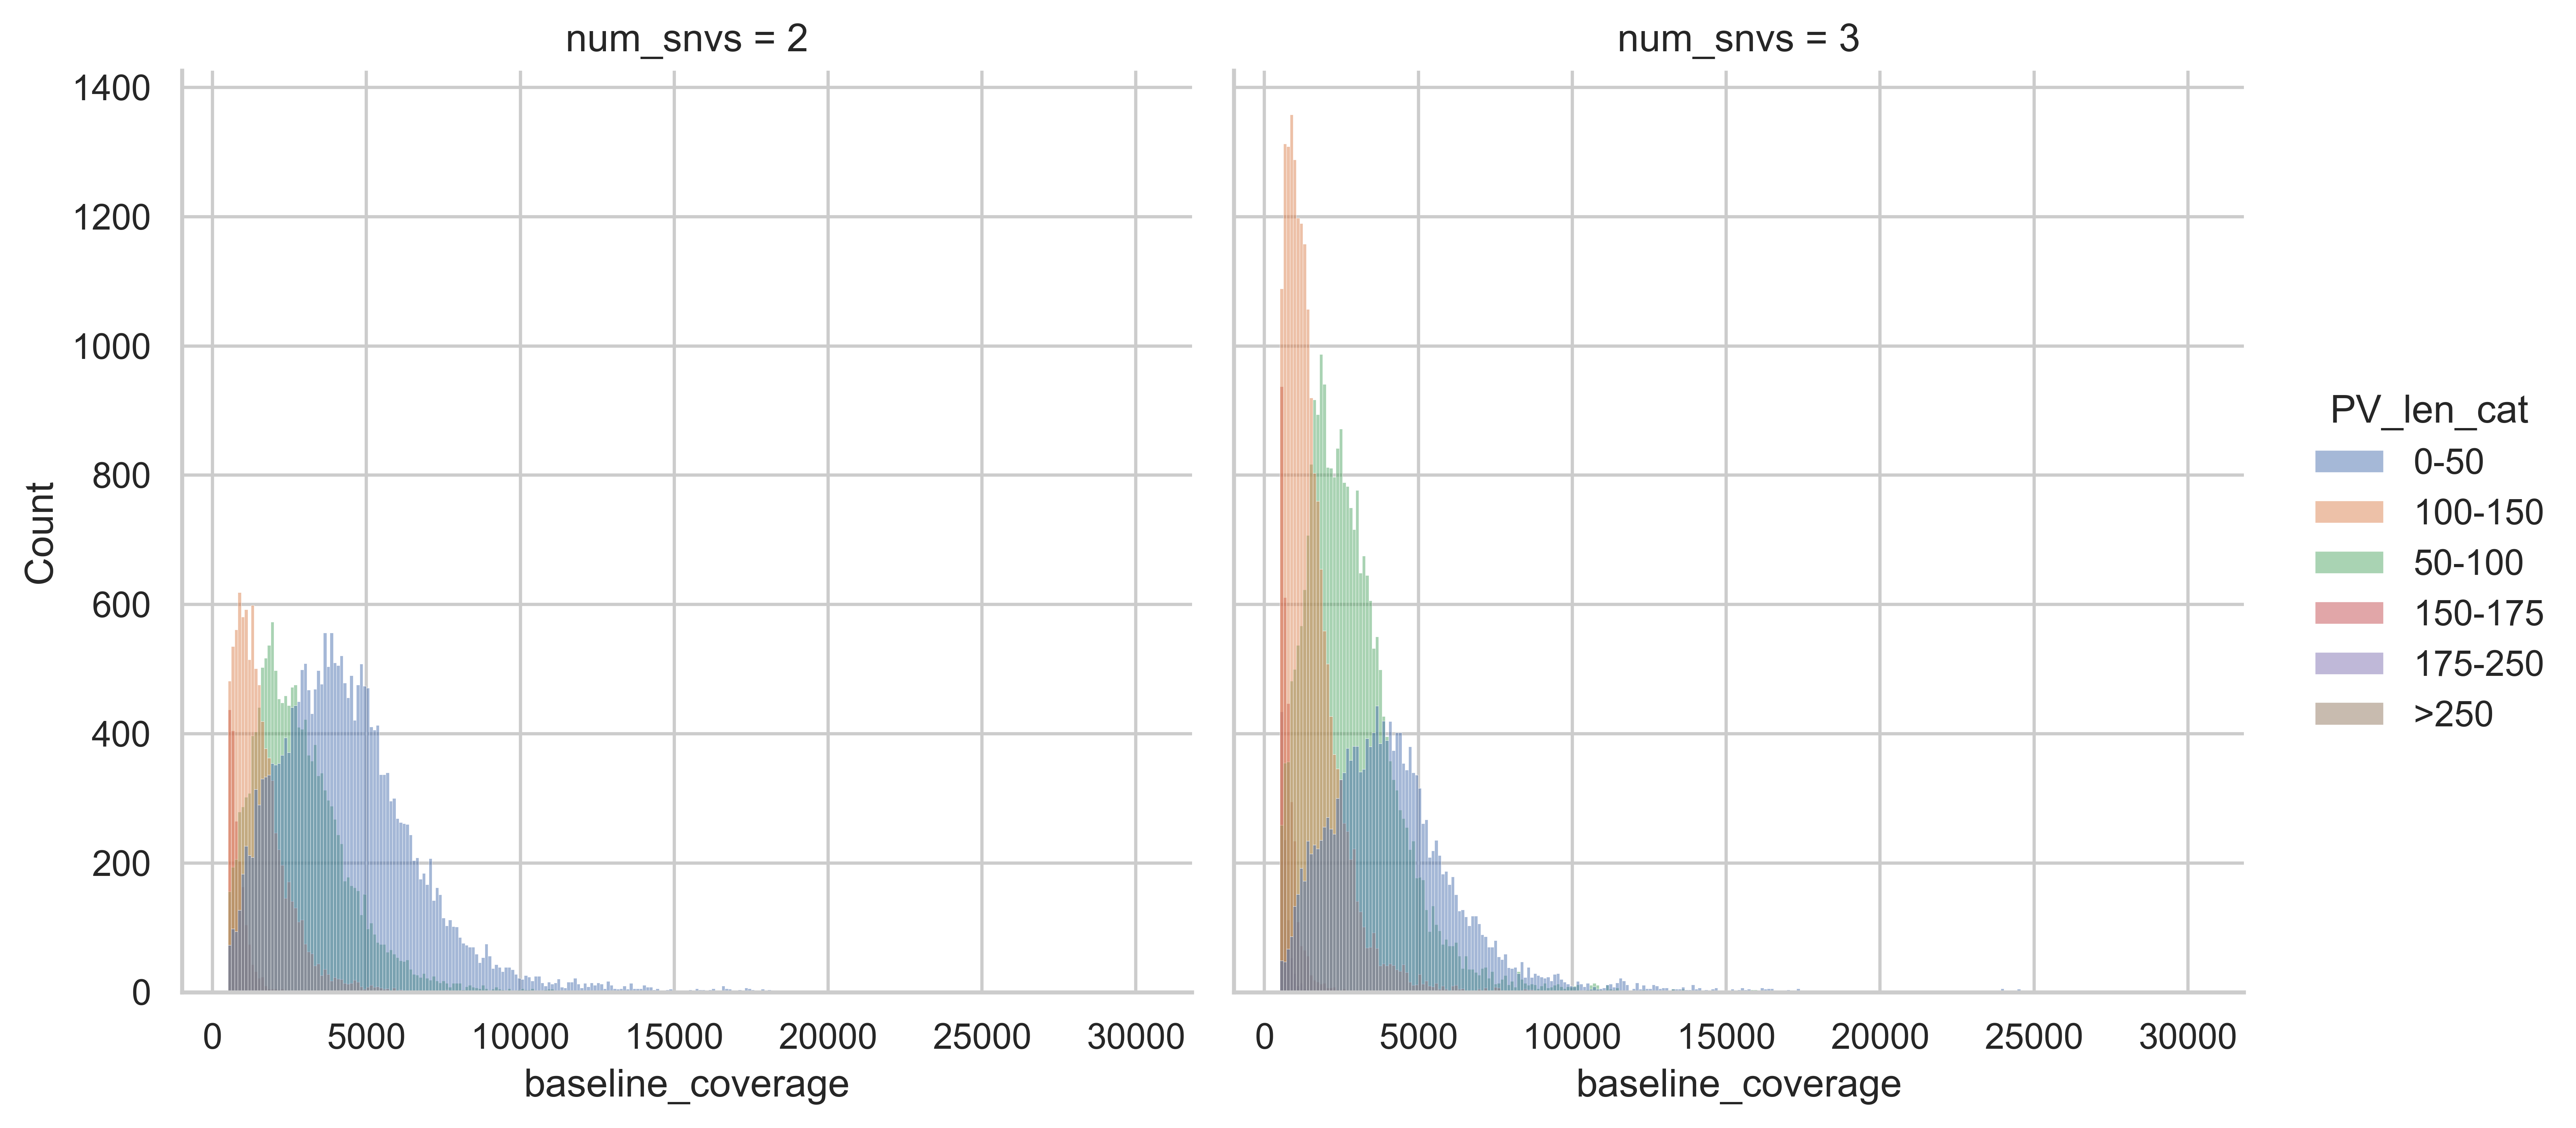

In [45]:
sns.displot(df_GO_PV_non_IG, x="baseline_coverage",\
            hue="PV_len_cat", col='num_snvs')

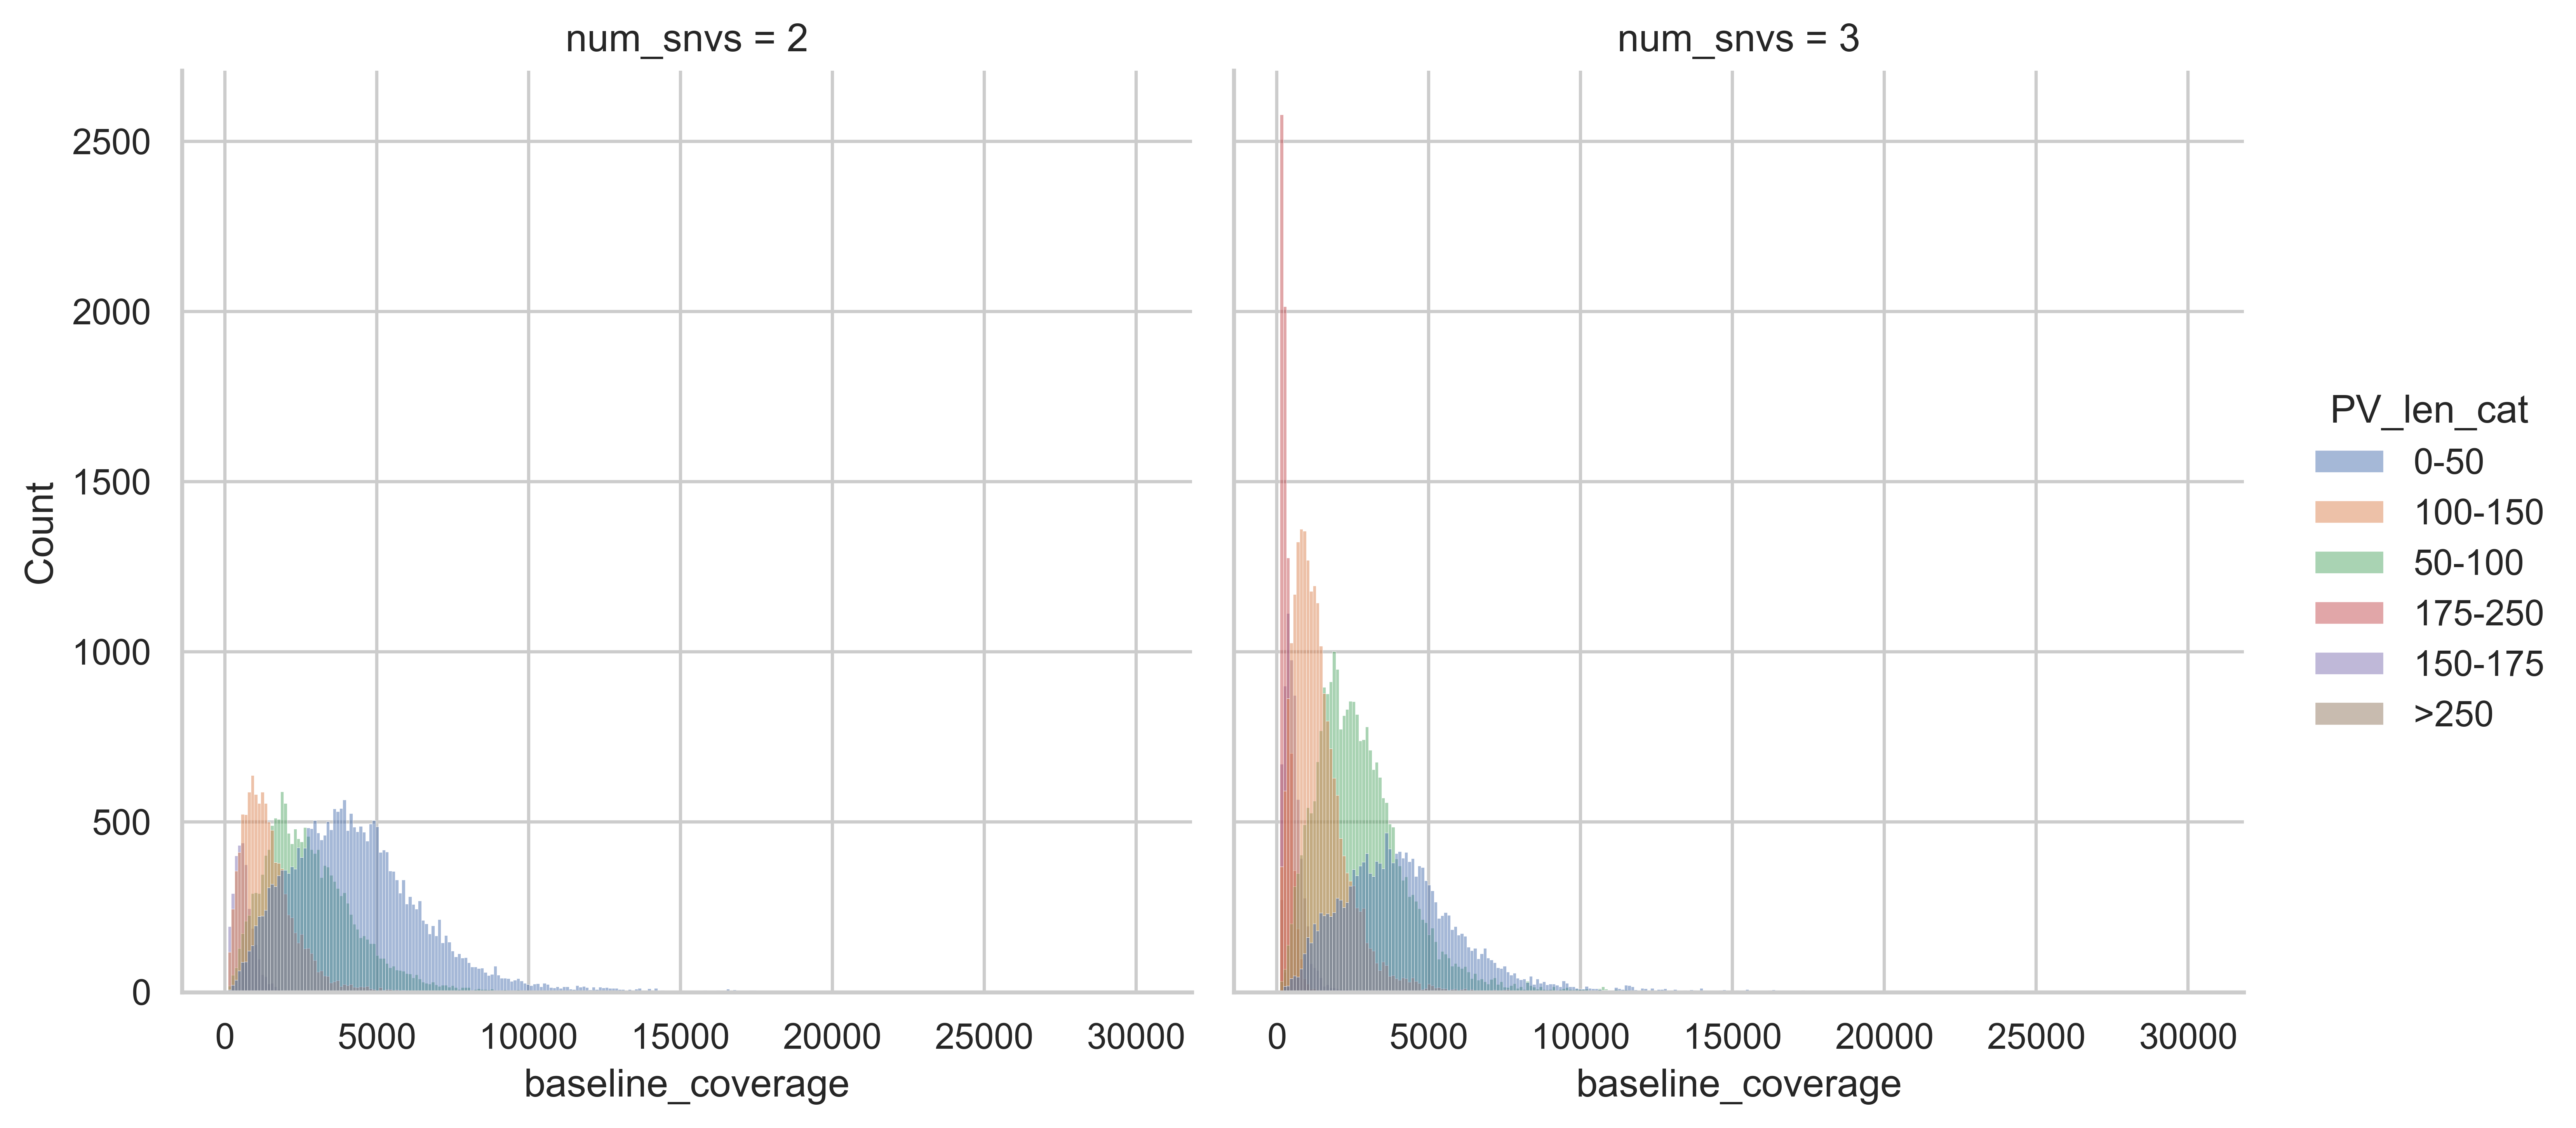

In [46]:
sns.displot(df_GO_PV_allDP, x="baseline_coverage",\
            hue="PV_len_cat", col='num_snvs')

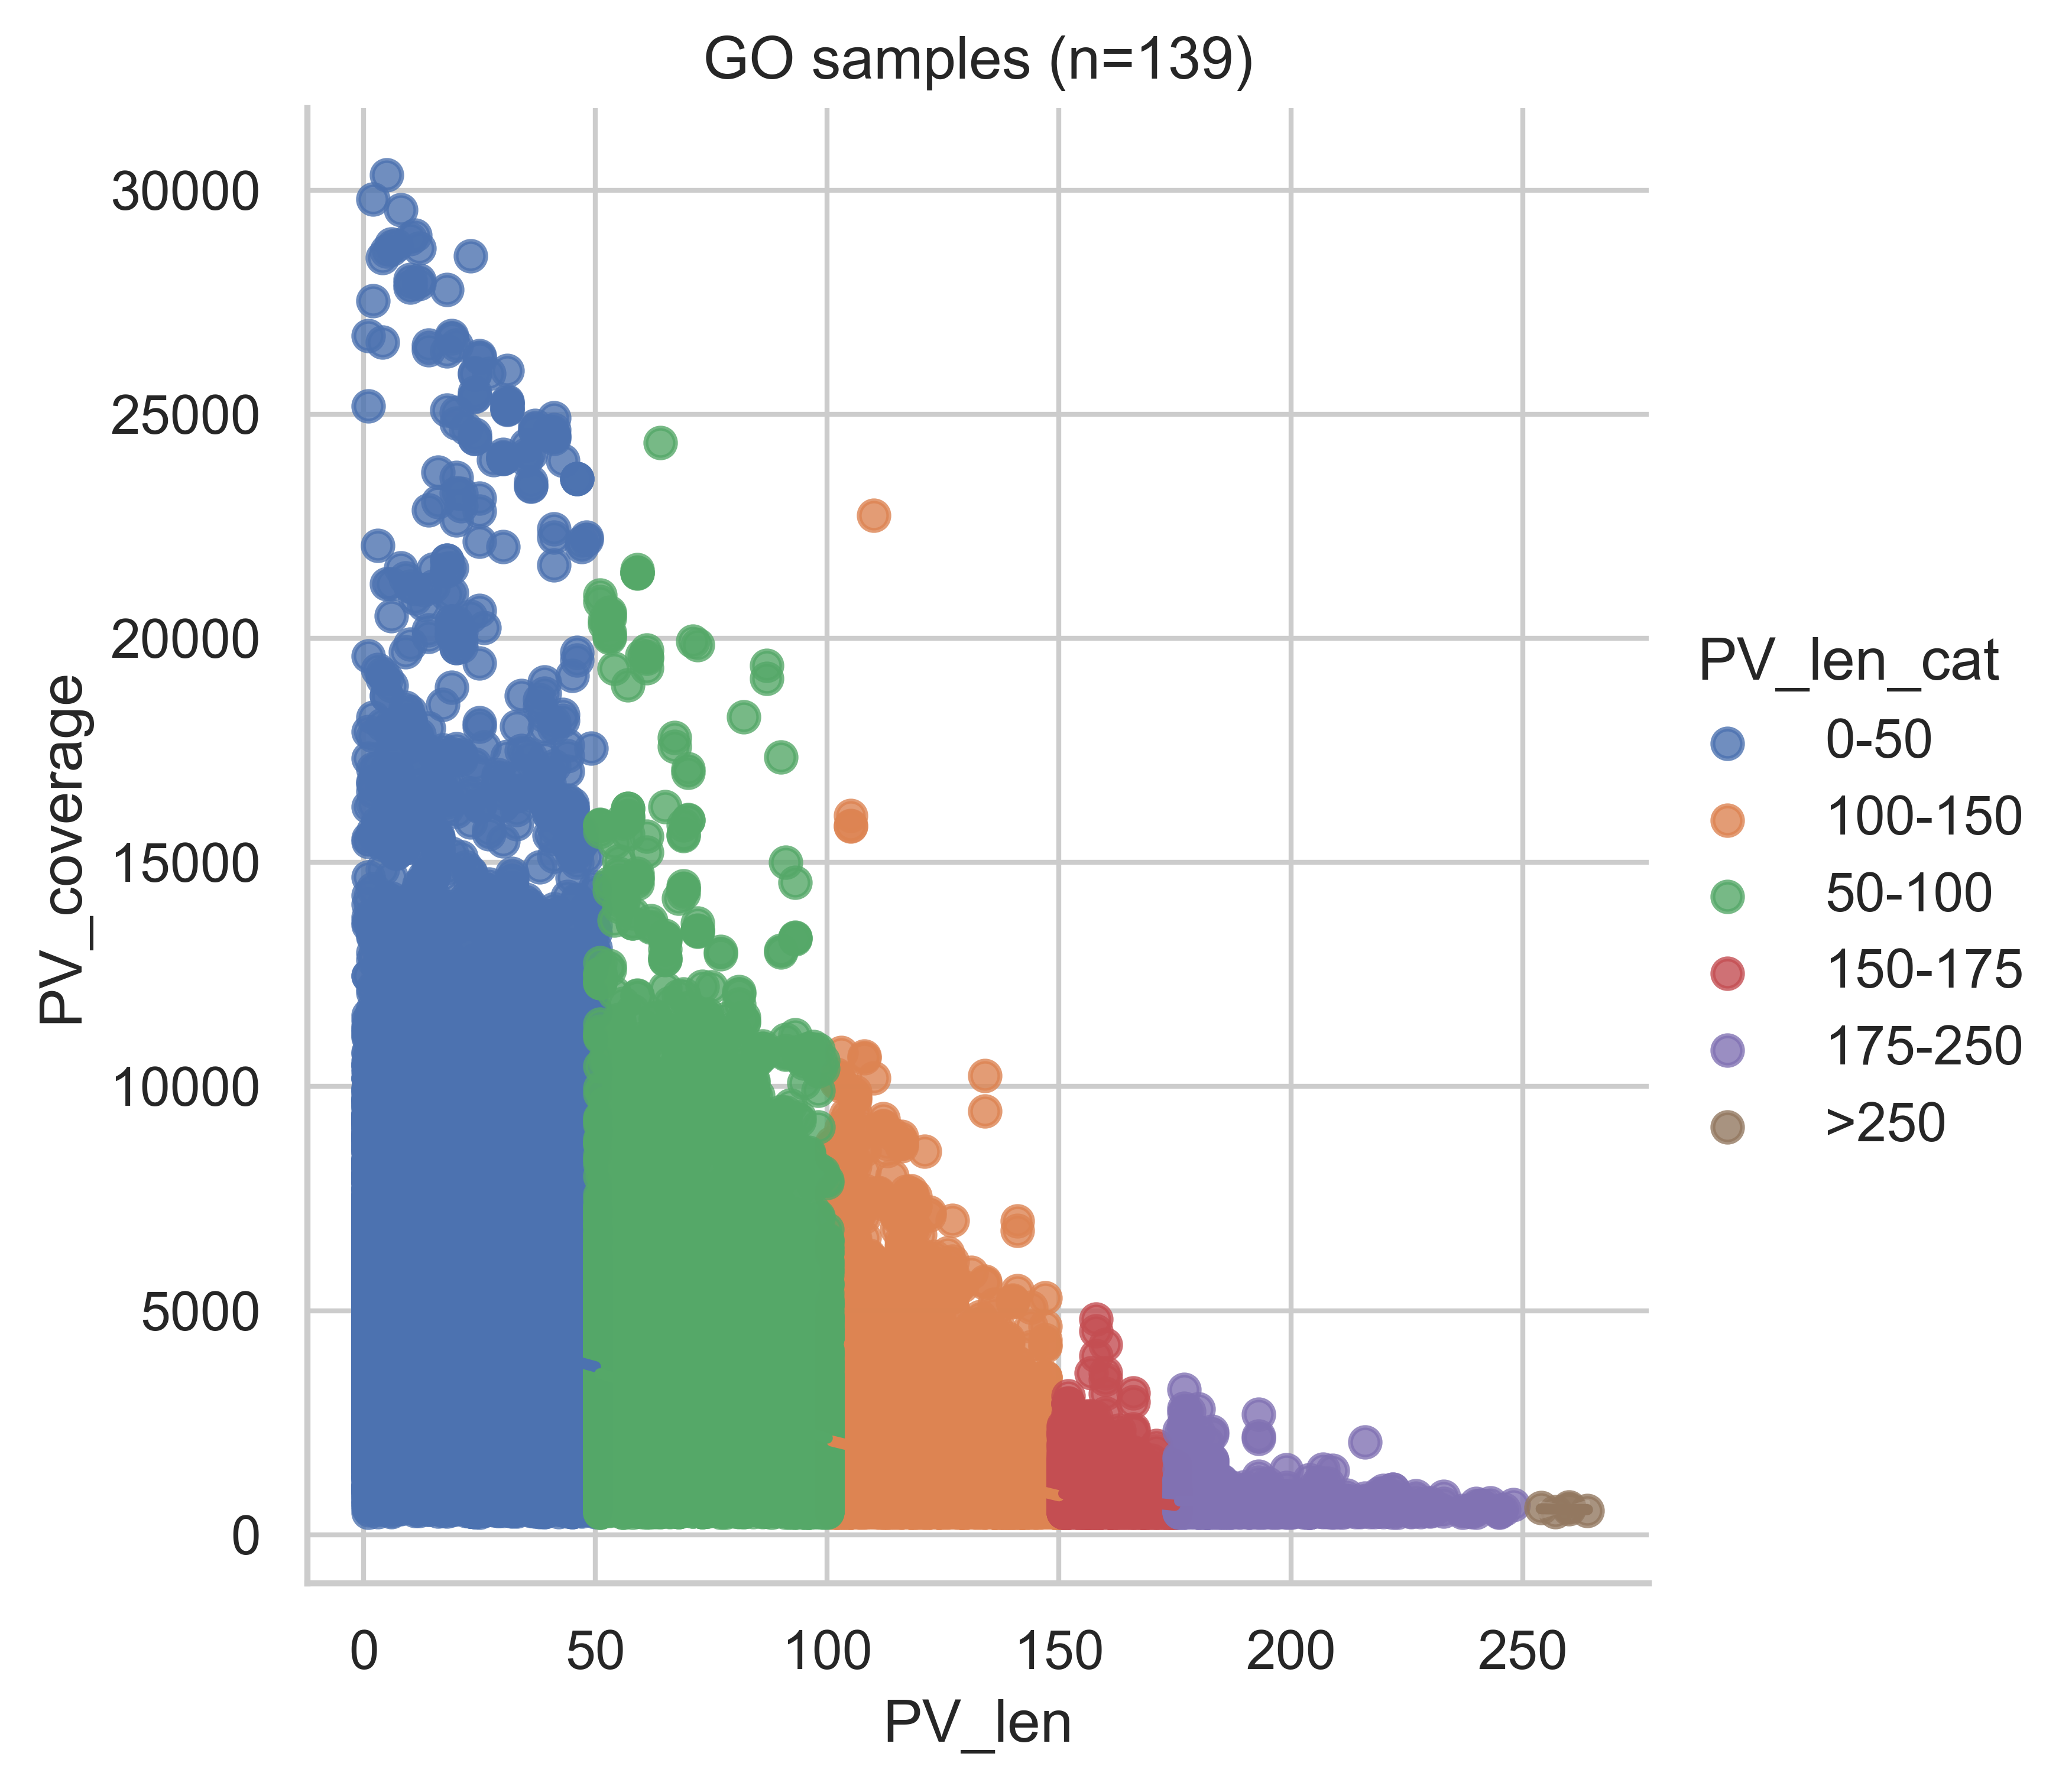

In [48]:
ax = sns.lmplot(data=df_GO_PV_non_IG, x='PV_len', y='baseline_coverage', hue='PV_len_cat')
ax.set(xlabel="PV_len", ylabel="PV_coverage", \
       title="GO samples (n=139)")
#ax.set(ylim=(0,30000))

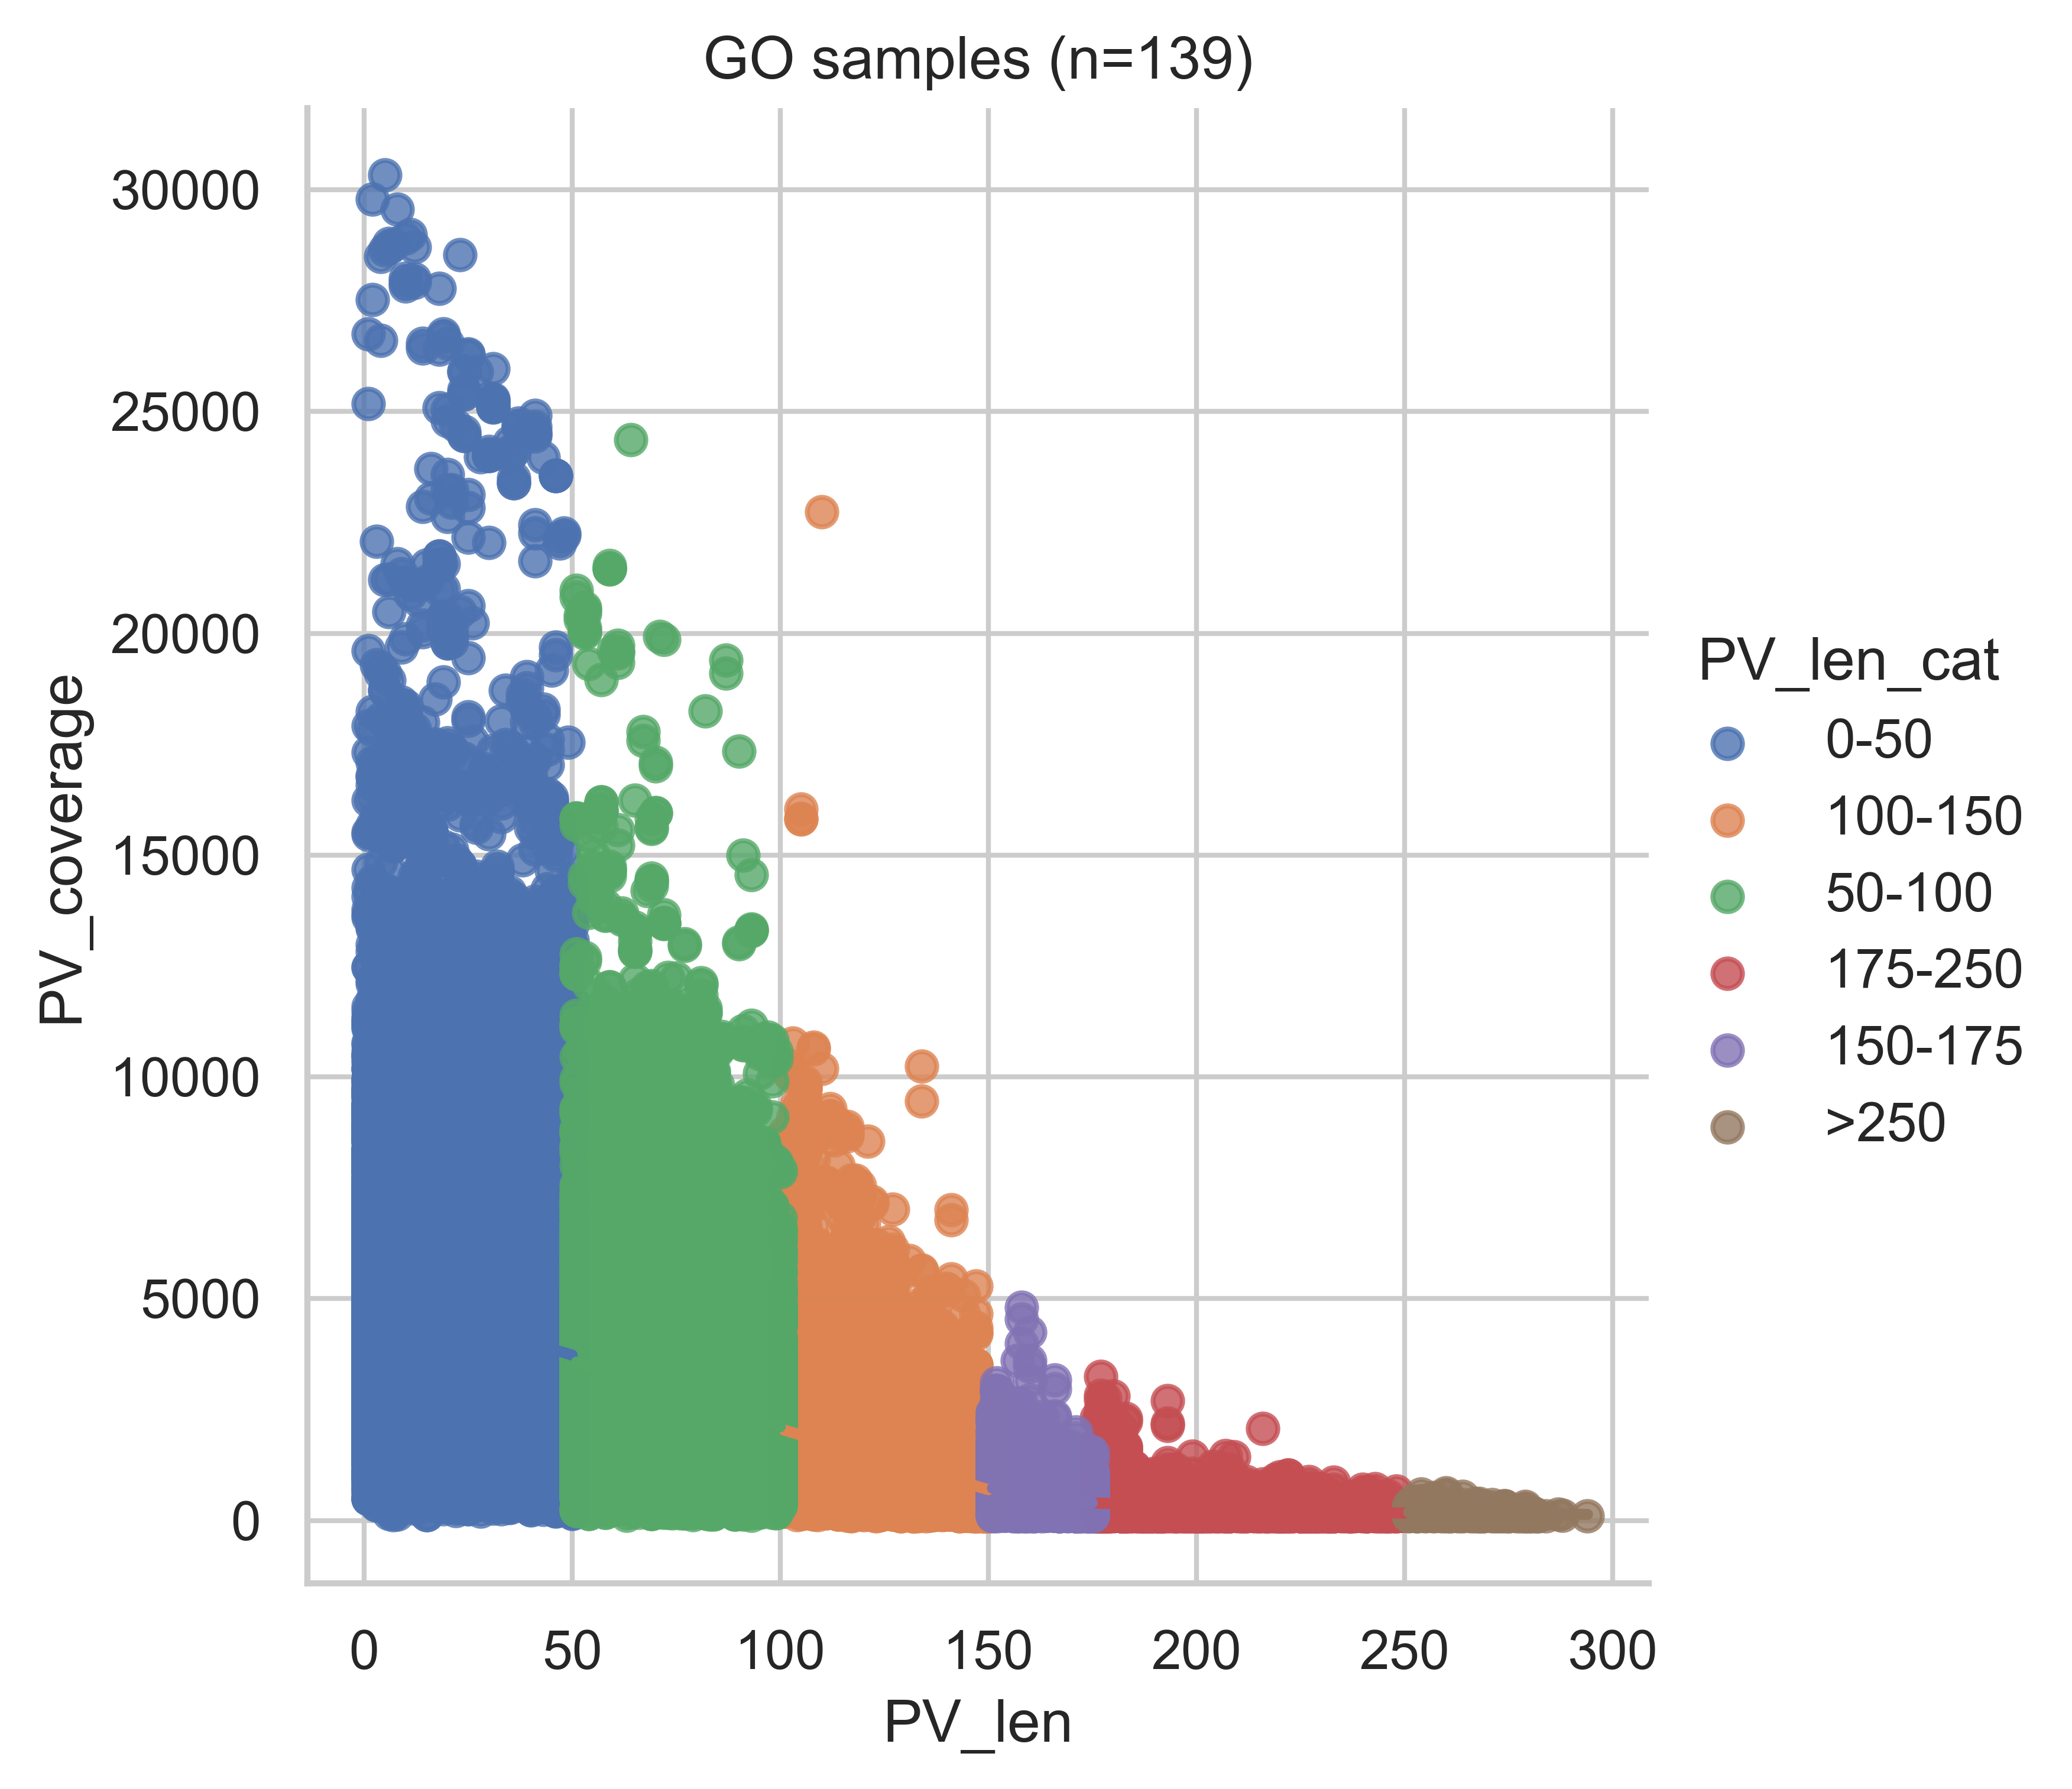

In [50]:
ax = sns.lmplot(data=df_GO_PV_allDP, x='PV_len', y='baseline_coverage', hue='PV_len_cat')
ax.set(xlabel="PV_len", ylabel="PV_coverage", \
       title="GO samples (n=139)")
#ax.set(ylim=(0,30000))

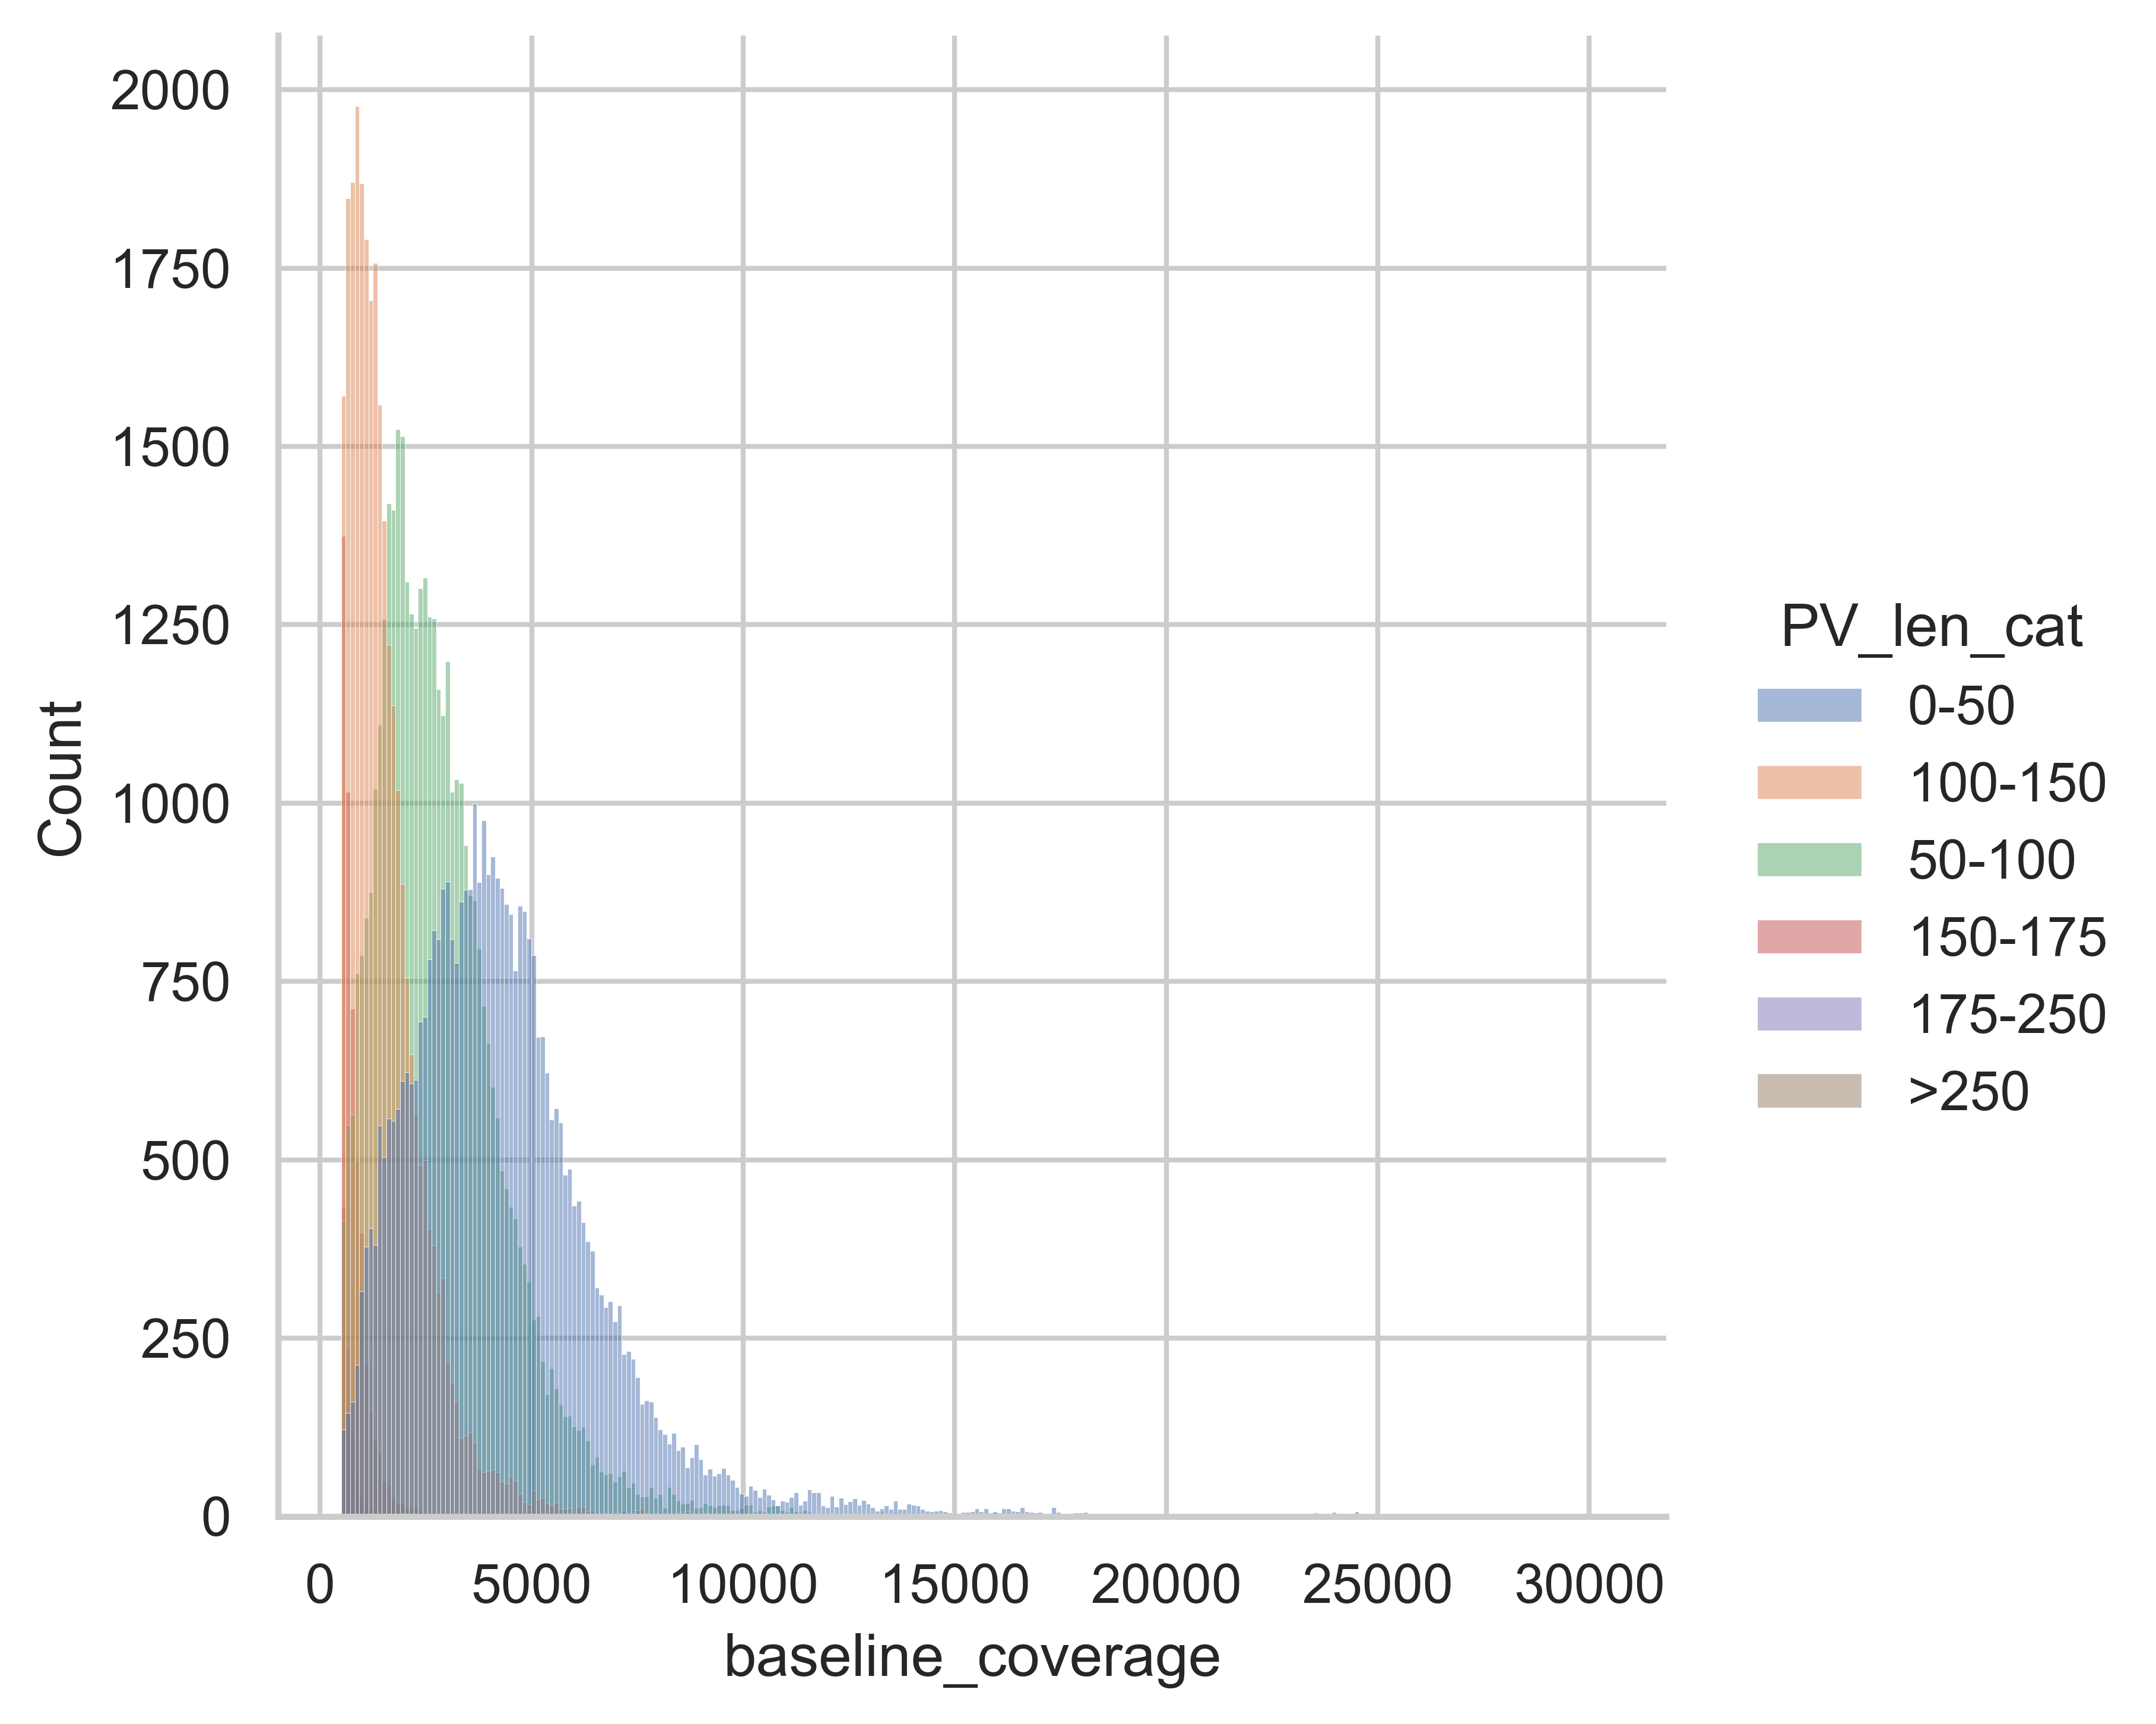

In [51]:
## Plot PV_len_distribution by doublet triplet

from matplotlib.patches import Rectangle

sns.displot(df_GO_PV_non_IG, x='baseline_coverage', hue='PV_len_cat')

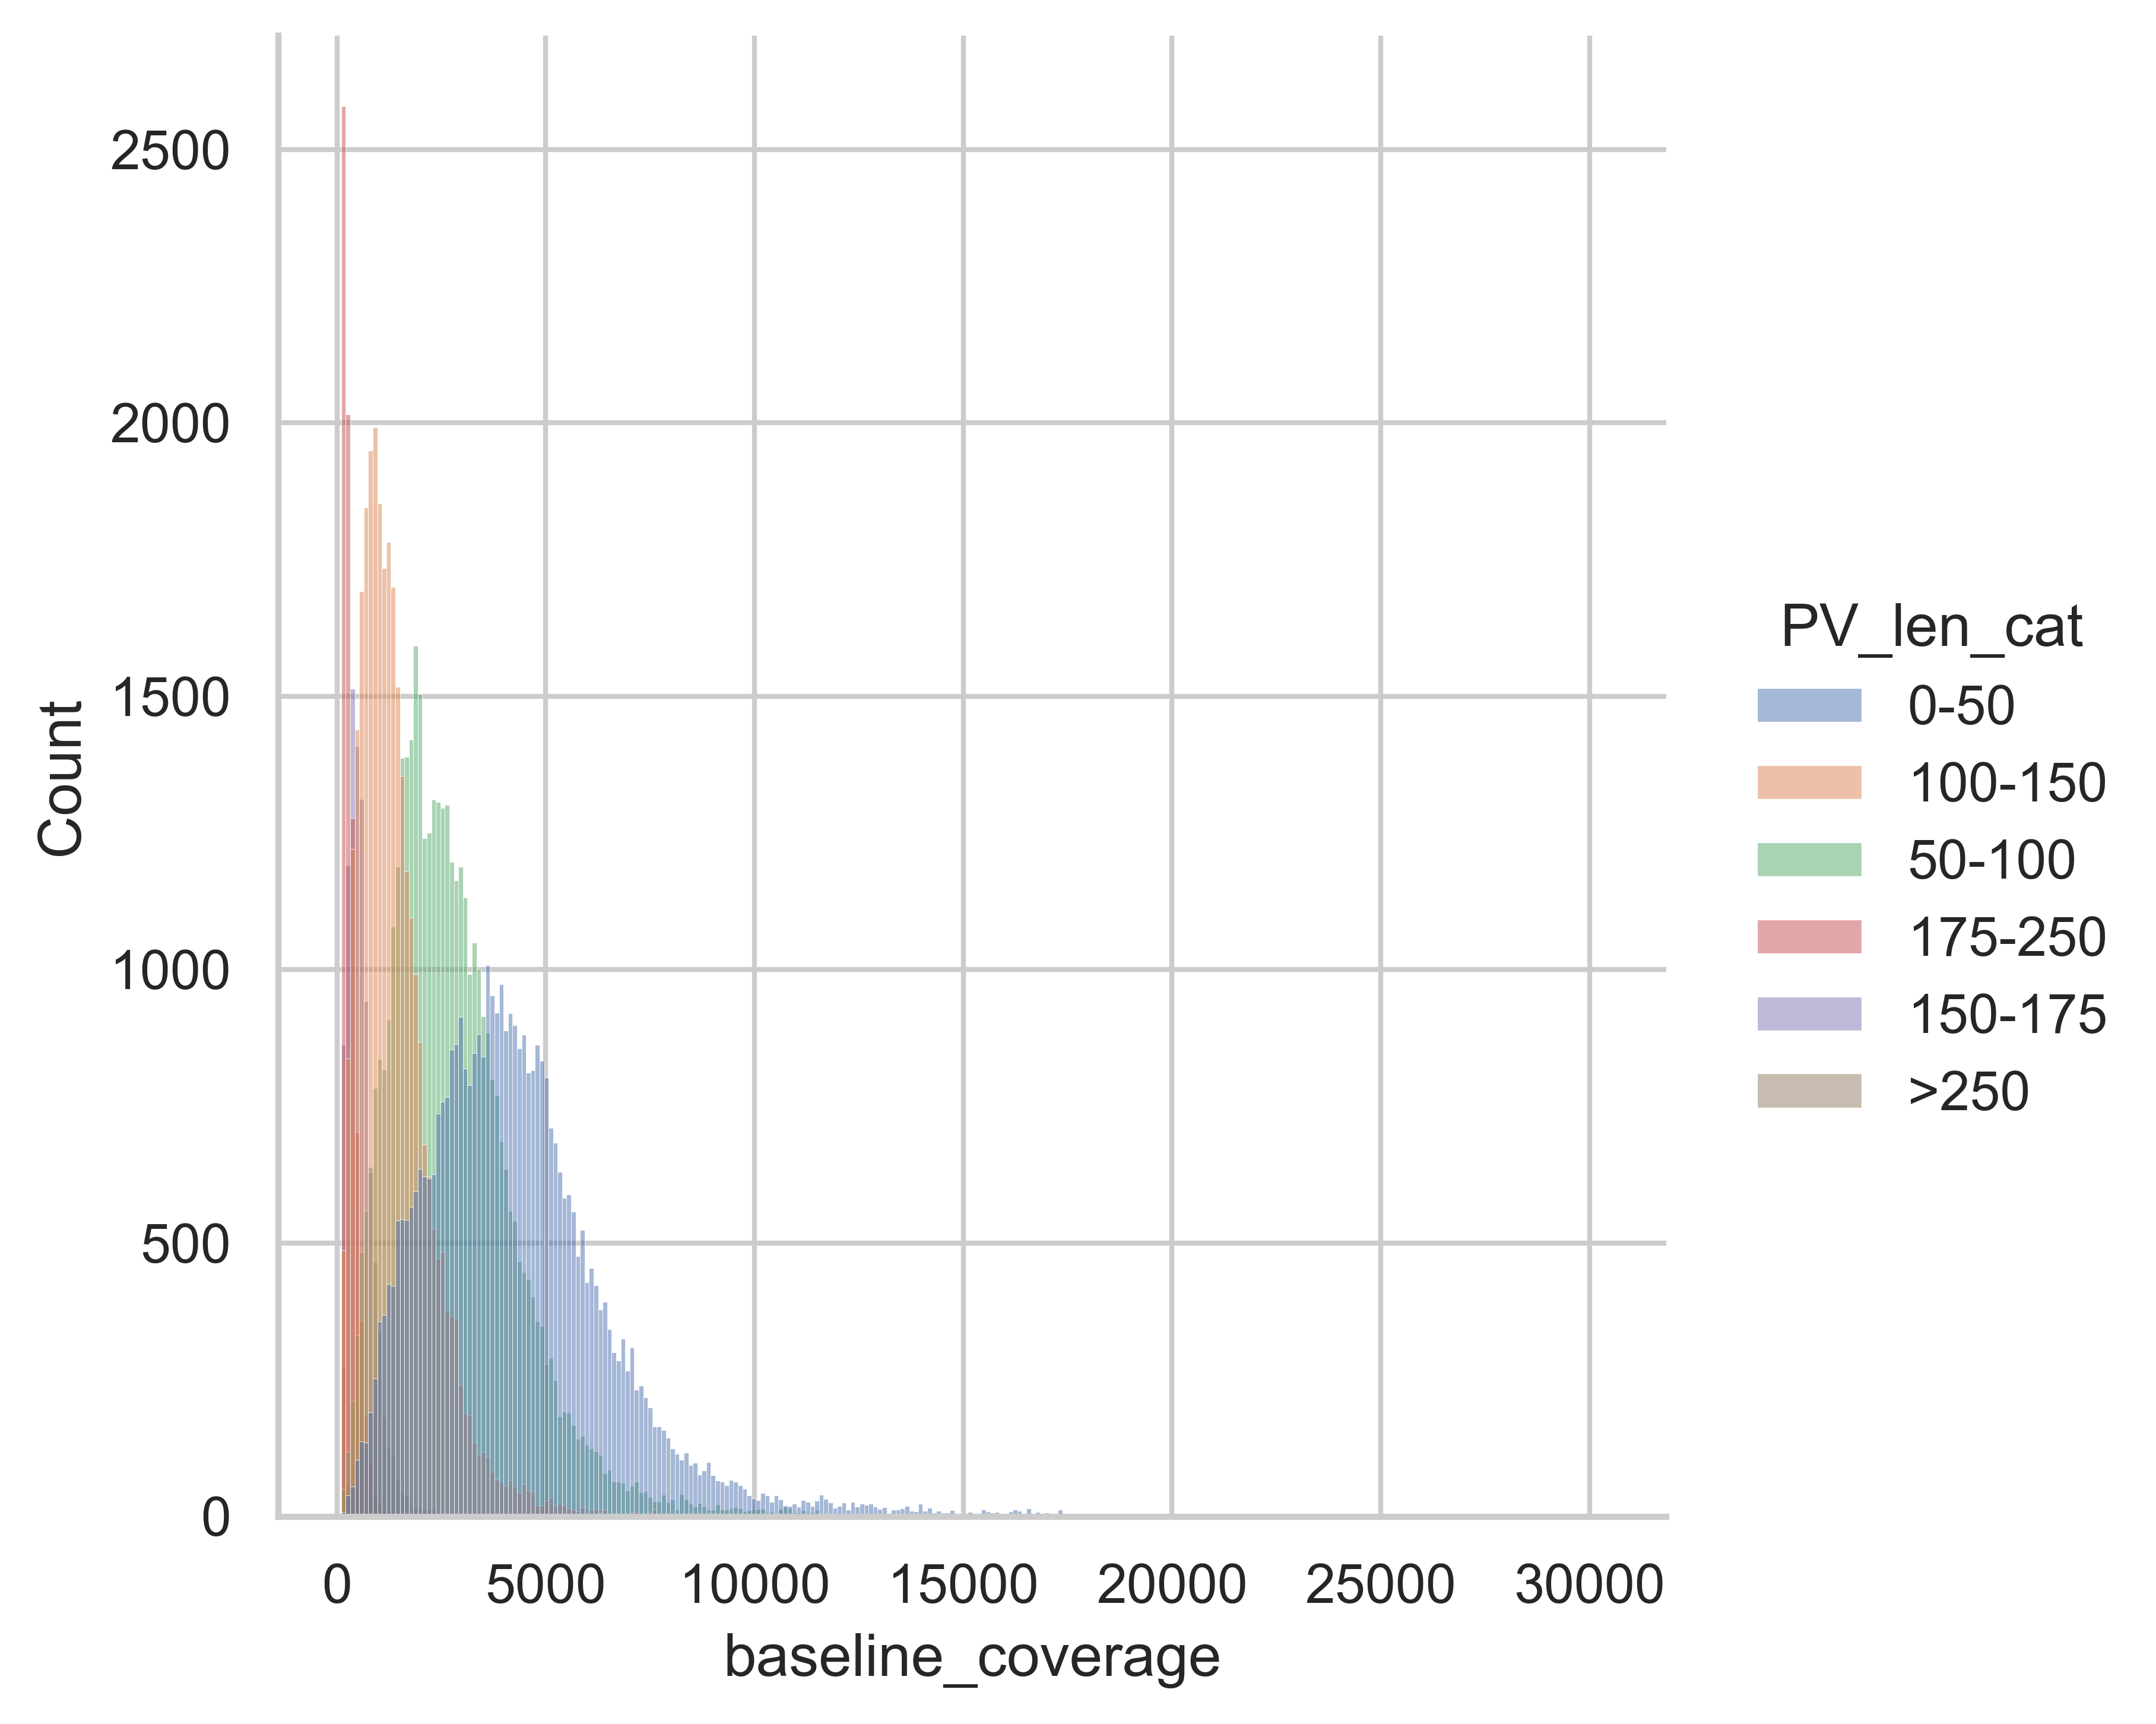

In [52]:
## Plot PV_len_distribution by doublet triplet

from matplotlib.patches import Rectangle

sns.displot(df_GO_PV_allDP, x='baseline_coverage', hue='PV_len_cat')

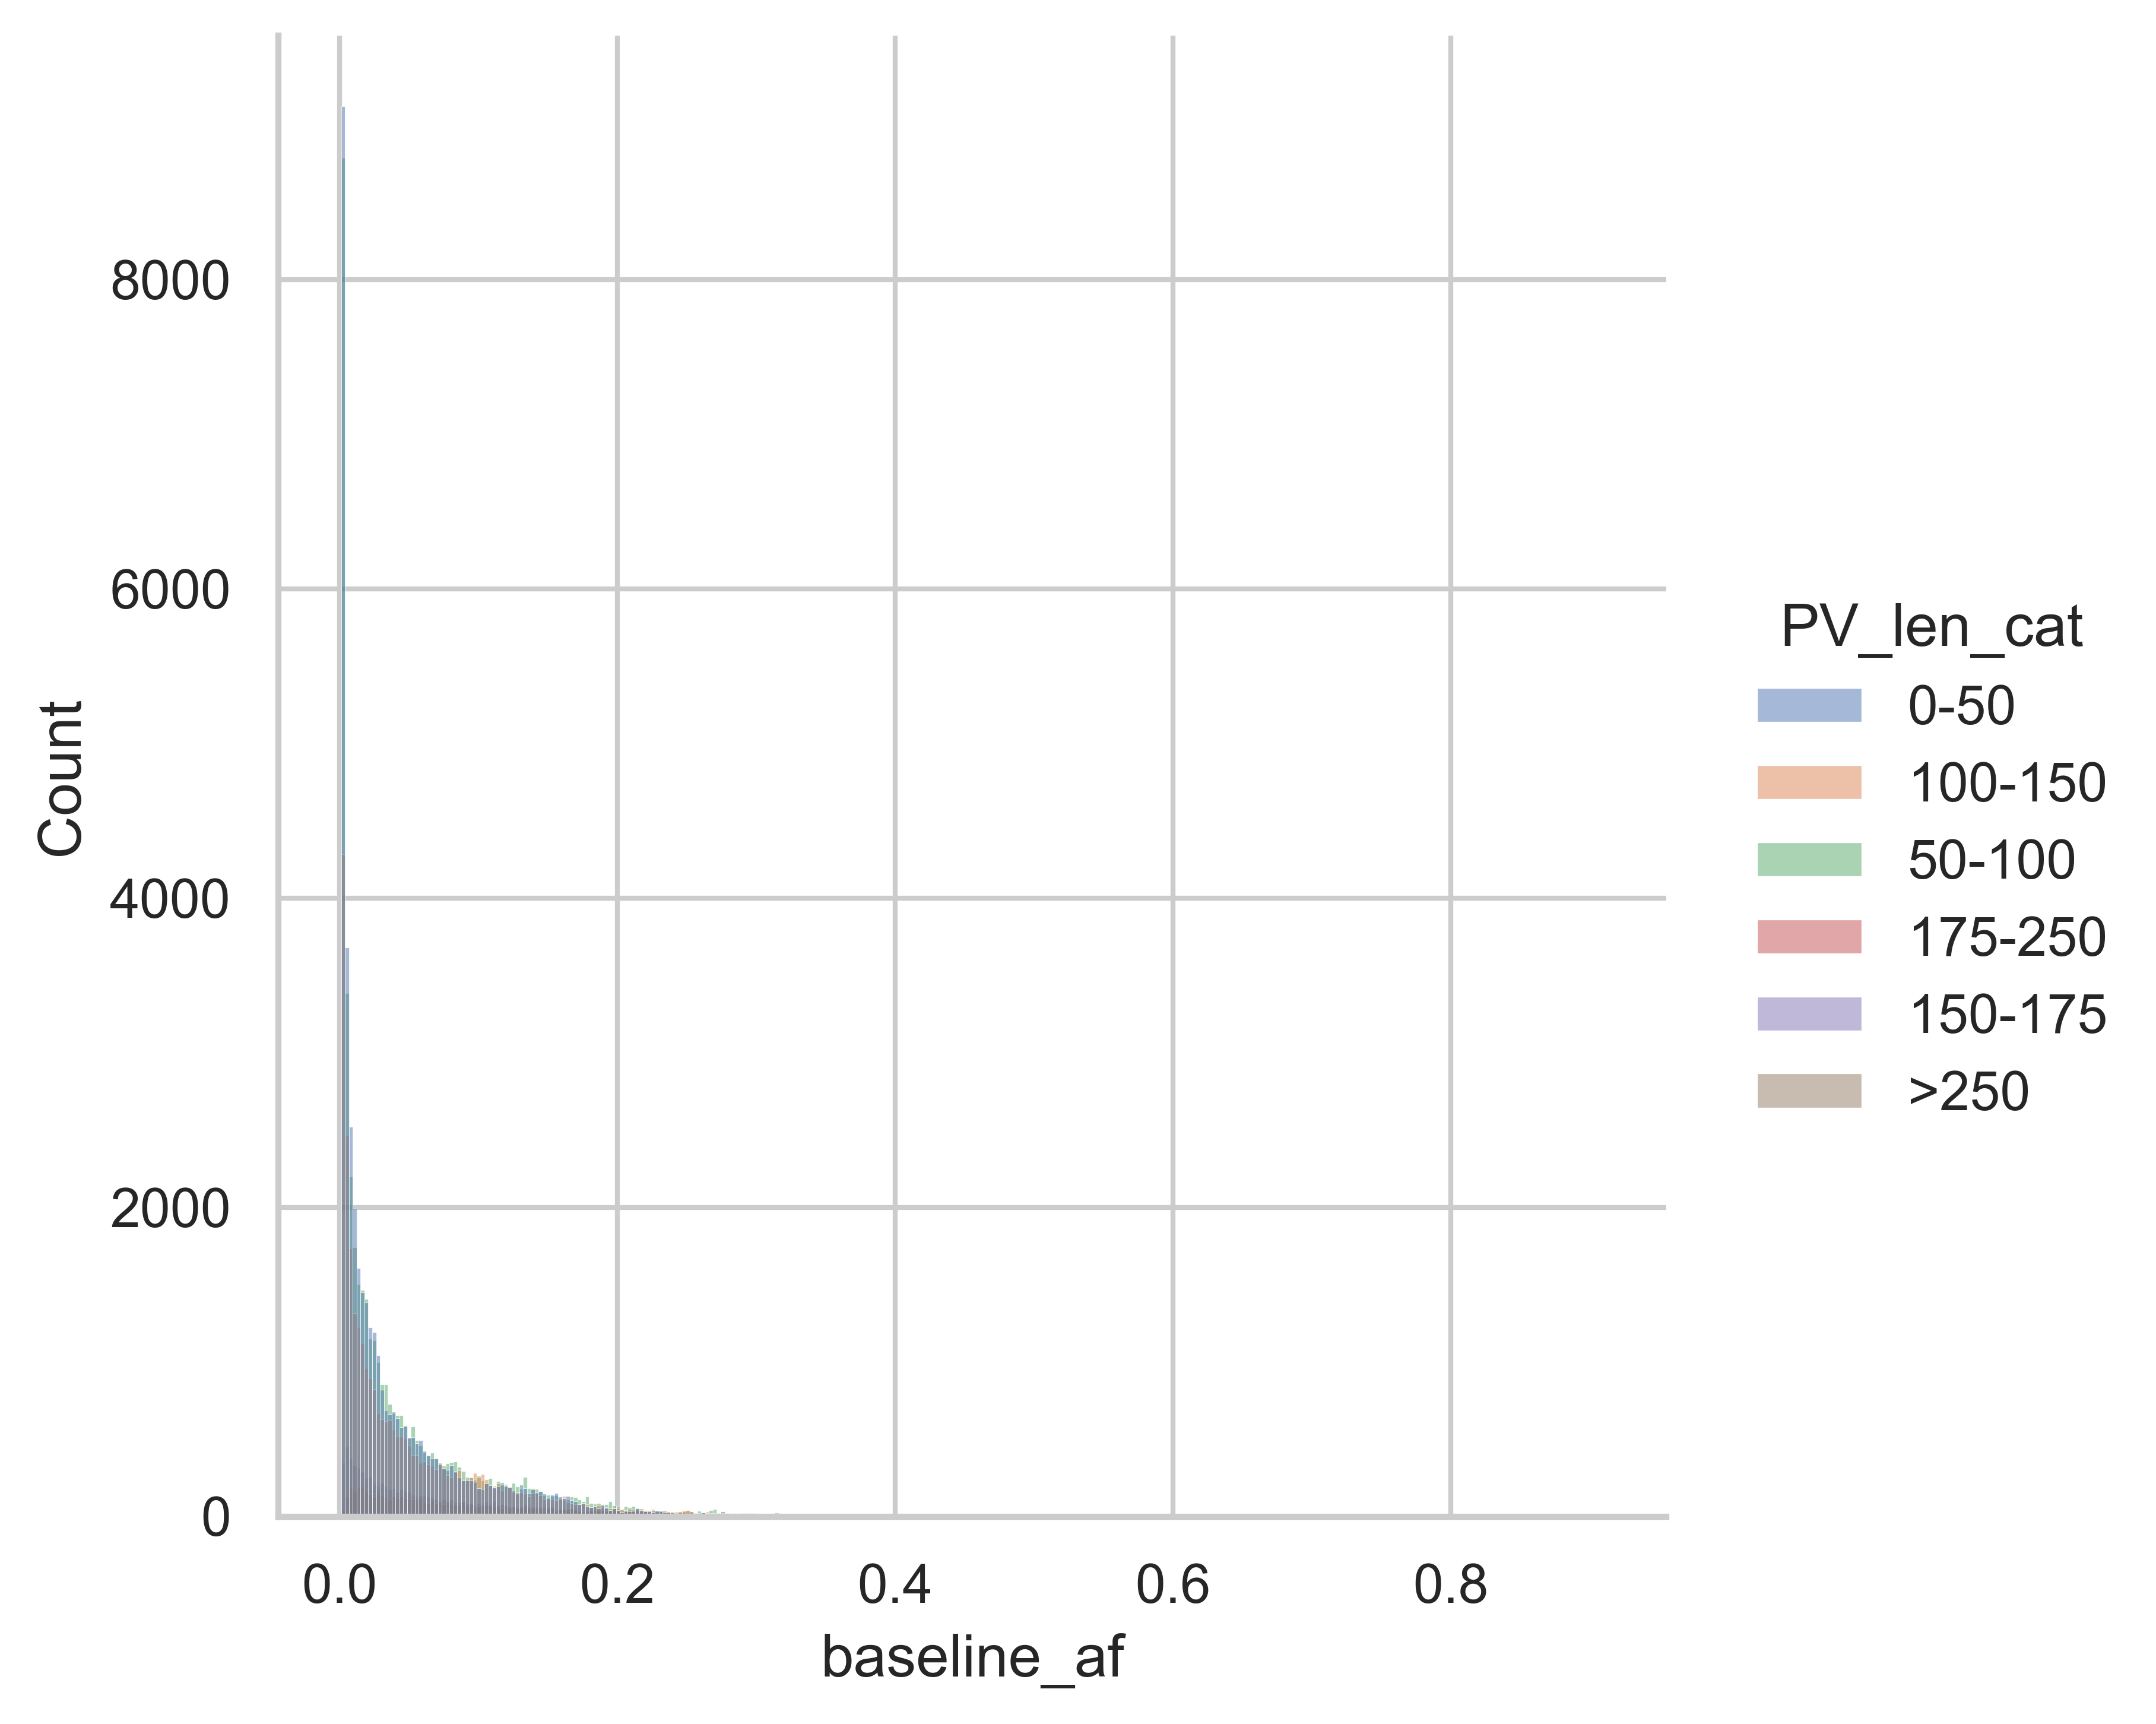

In [52]:
sns.displot(df_GO_PV_allDP, x='baseline_af', hue='PV_len_cat')

In [53]:
df_GO_PV_non_IG_long_PV = df_GO_PV_non_IG[df_GO_PV_non_IG['PV_len']>150]
df_GO_PV_non_IG_short_PV = df_GO_PV_non_IG[df_GO_PV_non_IG['PV_len']<=150]

In [54]:
df_GO_PV_allDP_long_PV = df_GO_PV_allDP[df_GO_PV_allDP['PV_len']>150]
df_GO_PV_allDP_short_PV = df_GO_PV_allDP[df_GO_PV_allDP['PV_len']<=150]

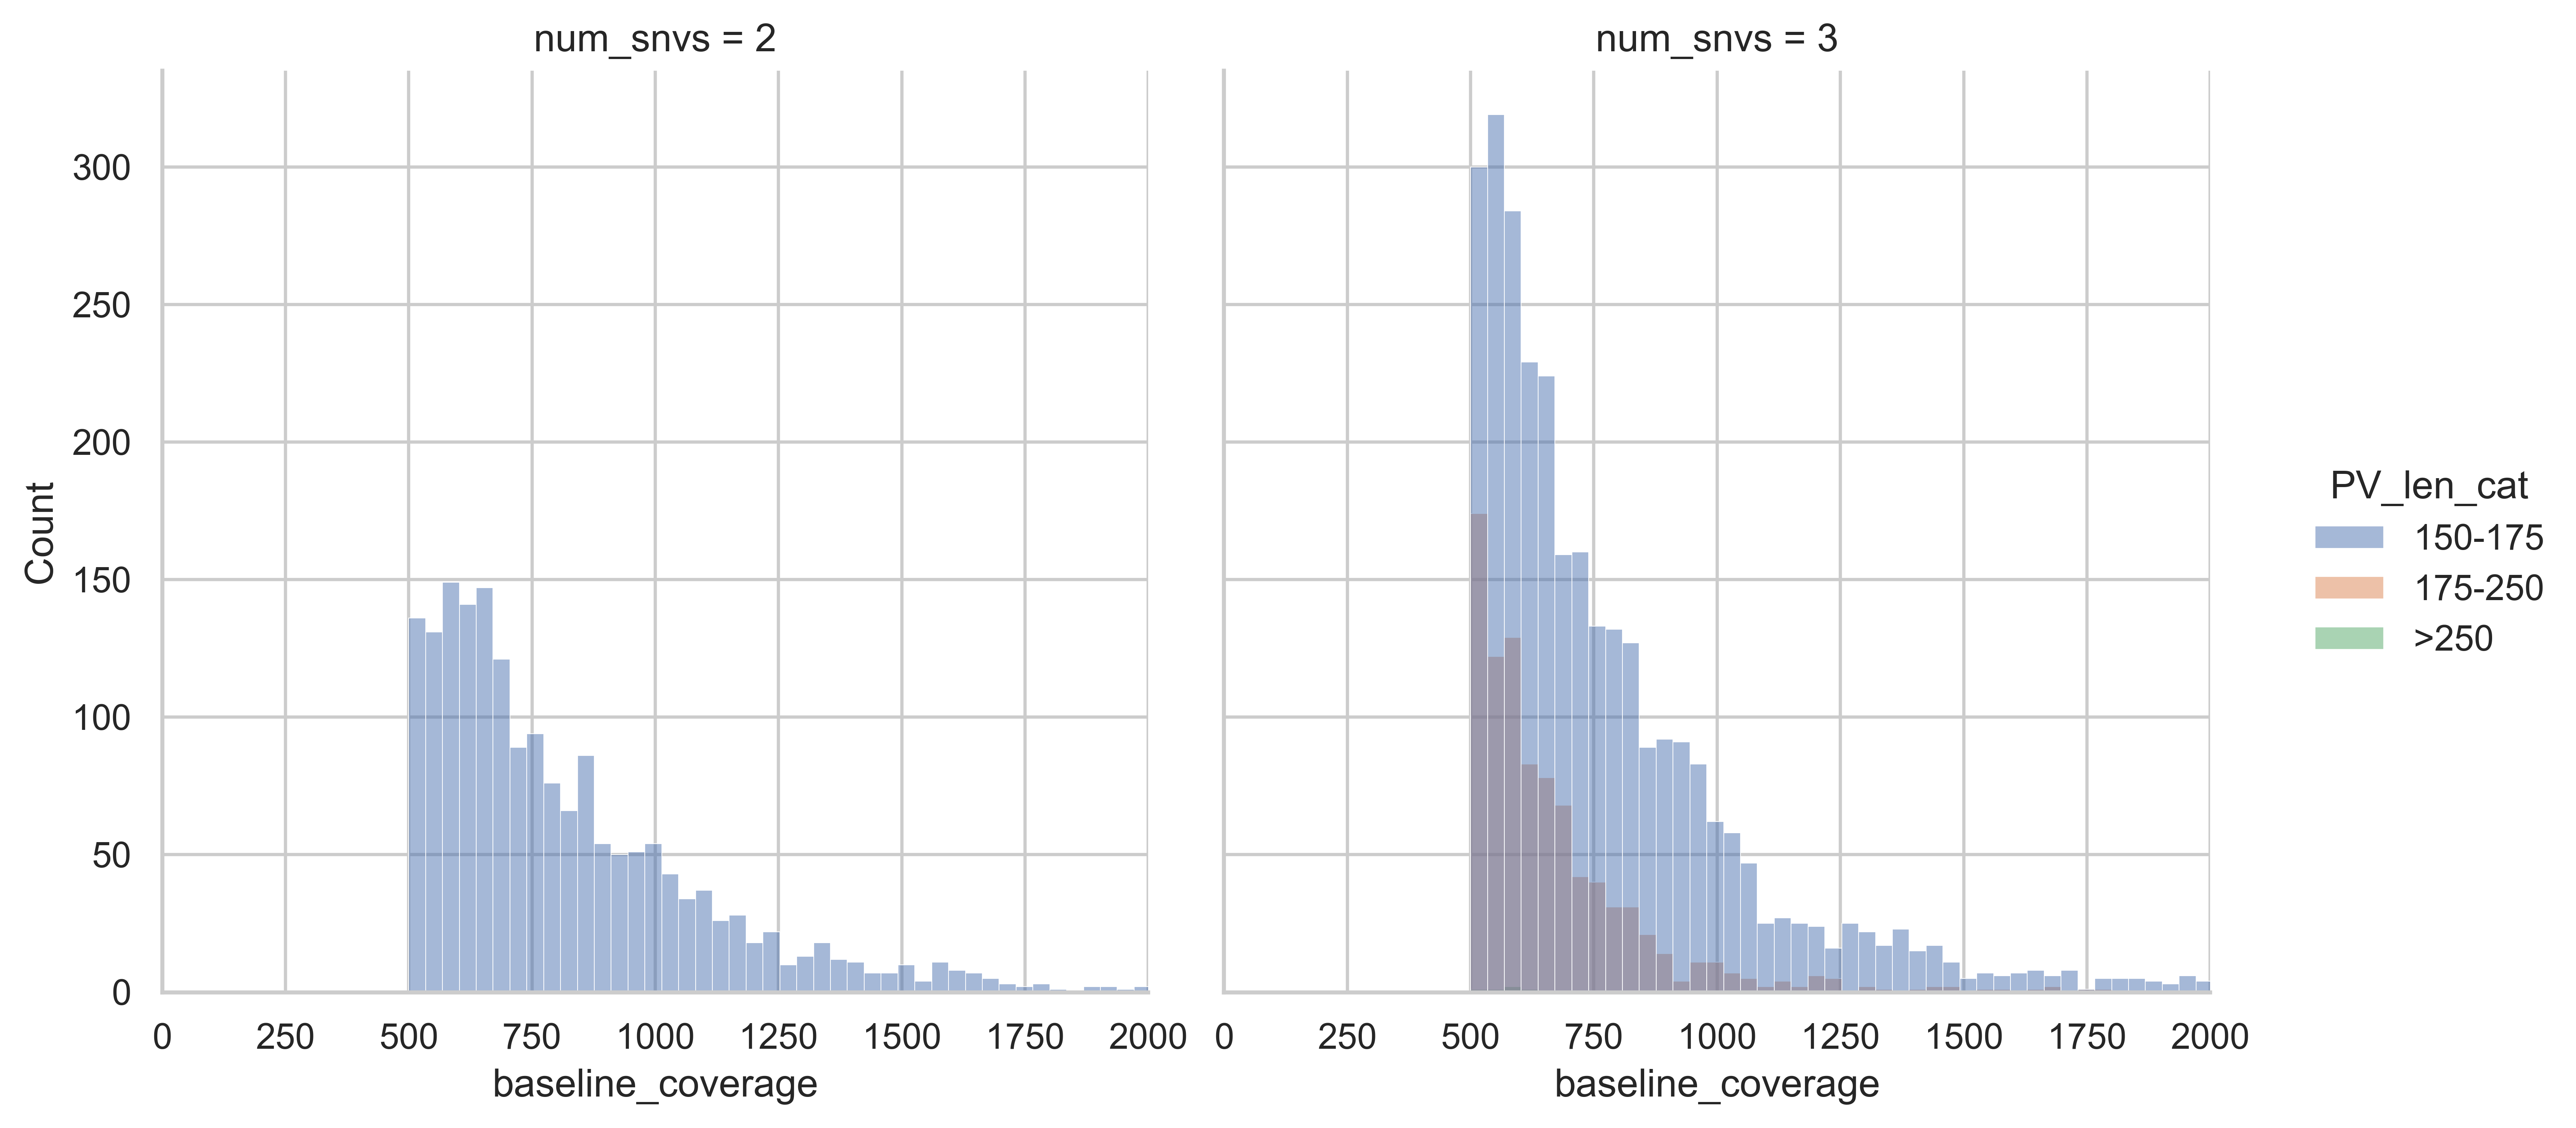

In [55]:
sns.color_palette("Paired")
sns.displot(df_GO_PV_non_IG_long_PV, x="baseline_coverage",\
            hue="PV_len_cat", col='num_snvs').set(xlim=(0,2000))

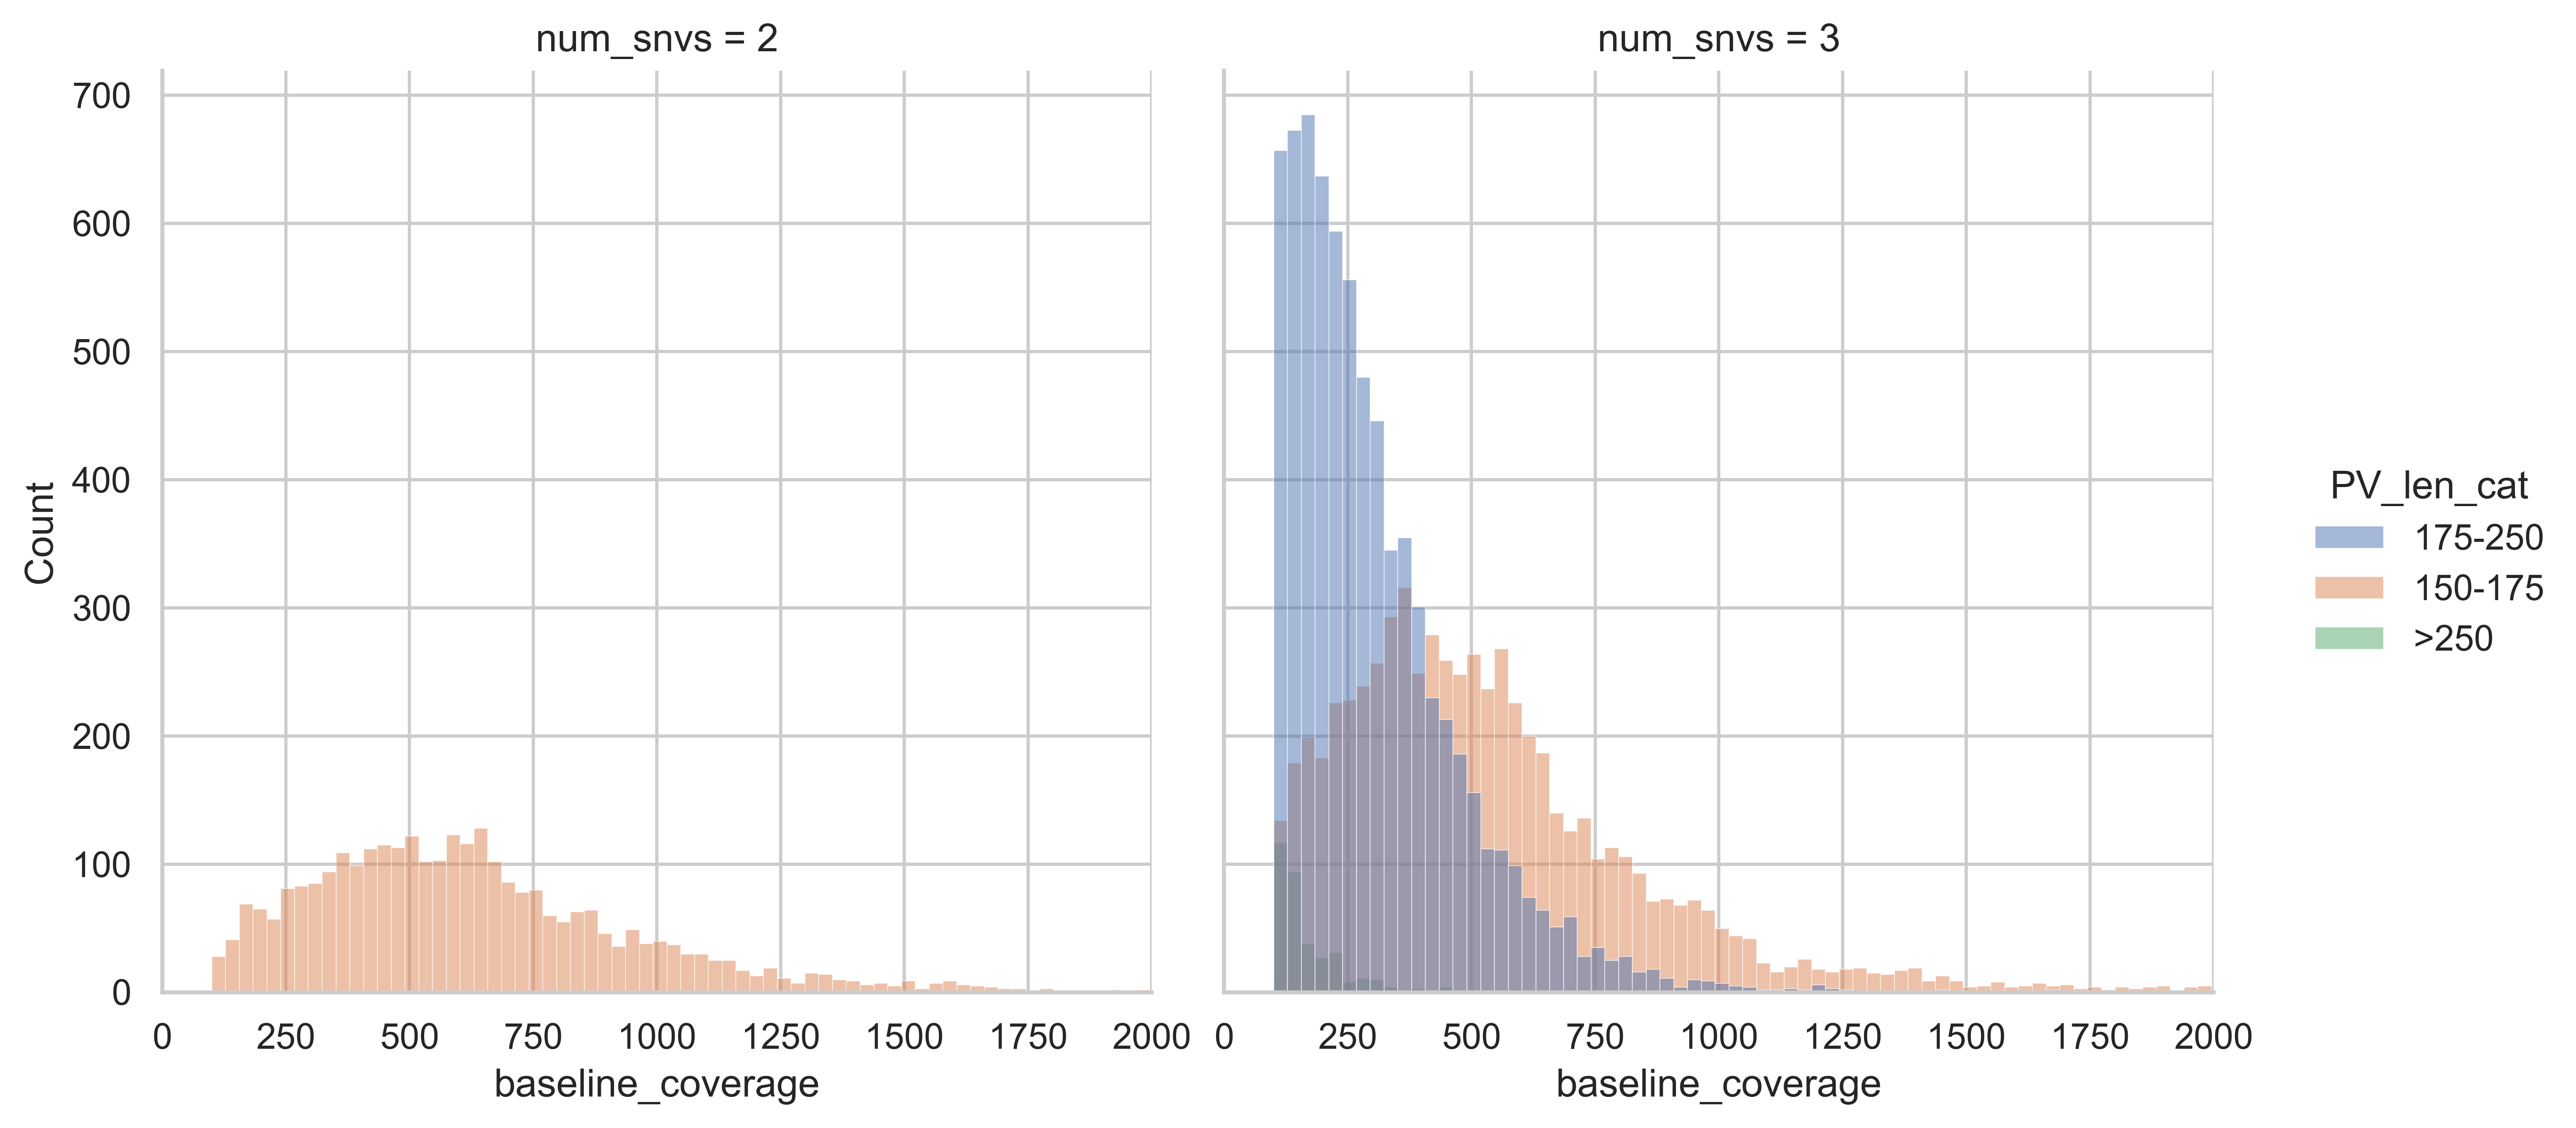

In [56]:
sns.color_palette("Paired")
sns.displot(df_GO_PV_allDP_long_PV, x="baseline_coverage",\
            hue="PV_len_cat", col='num_snvs').set(xlim=(0,2000))

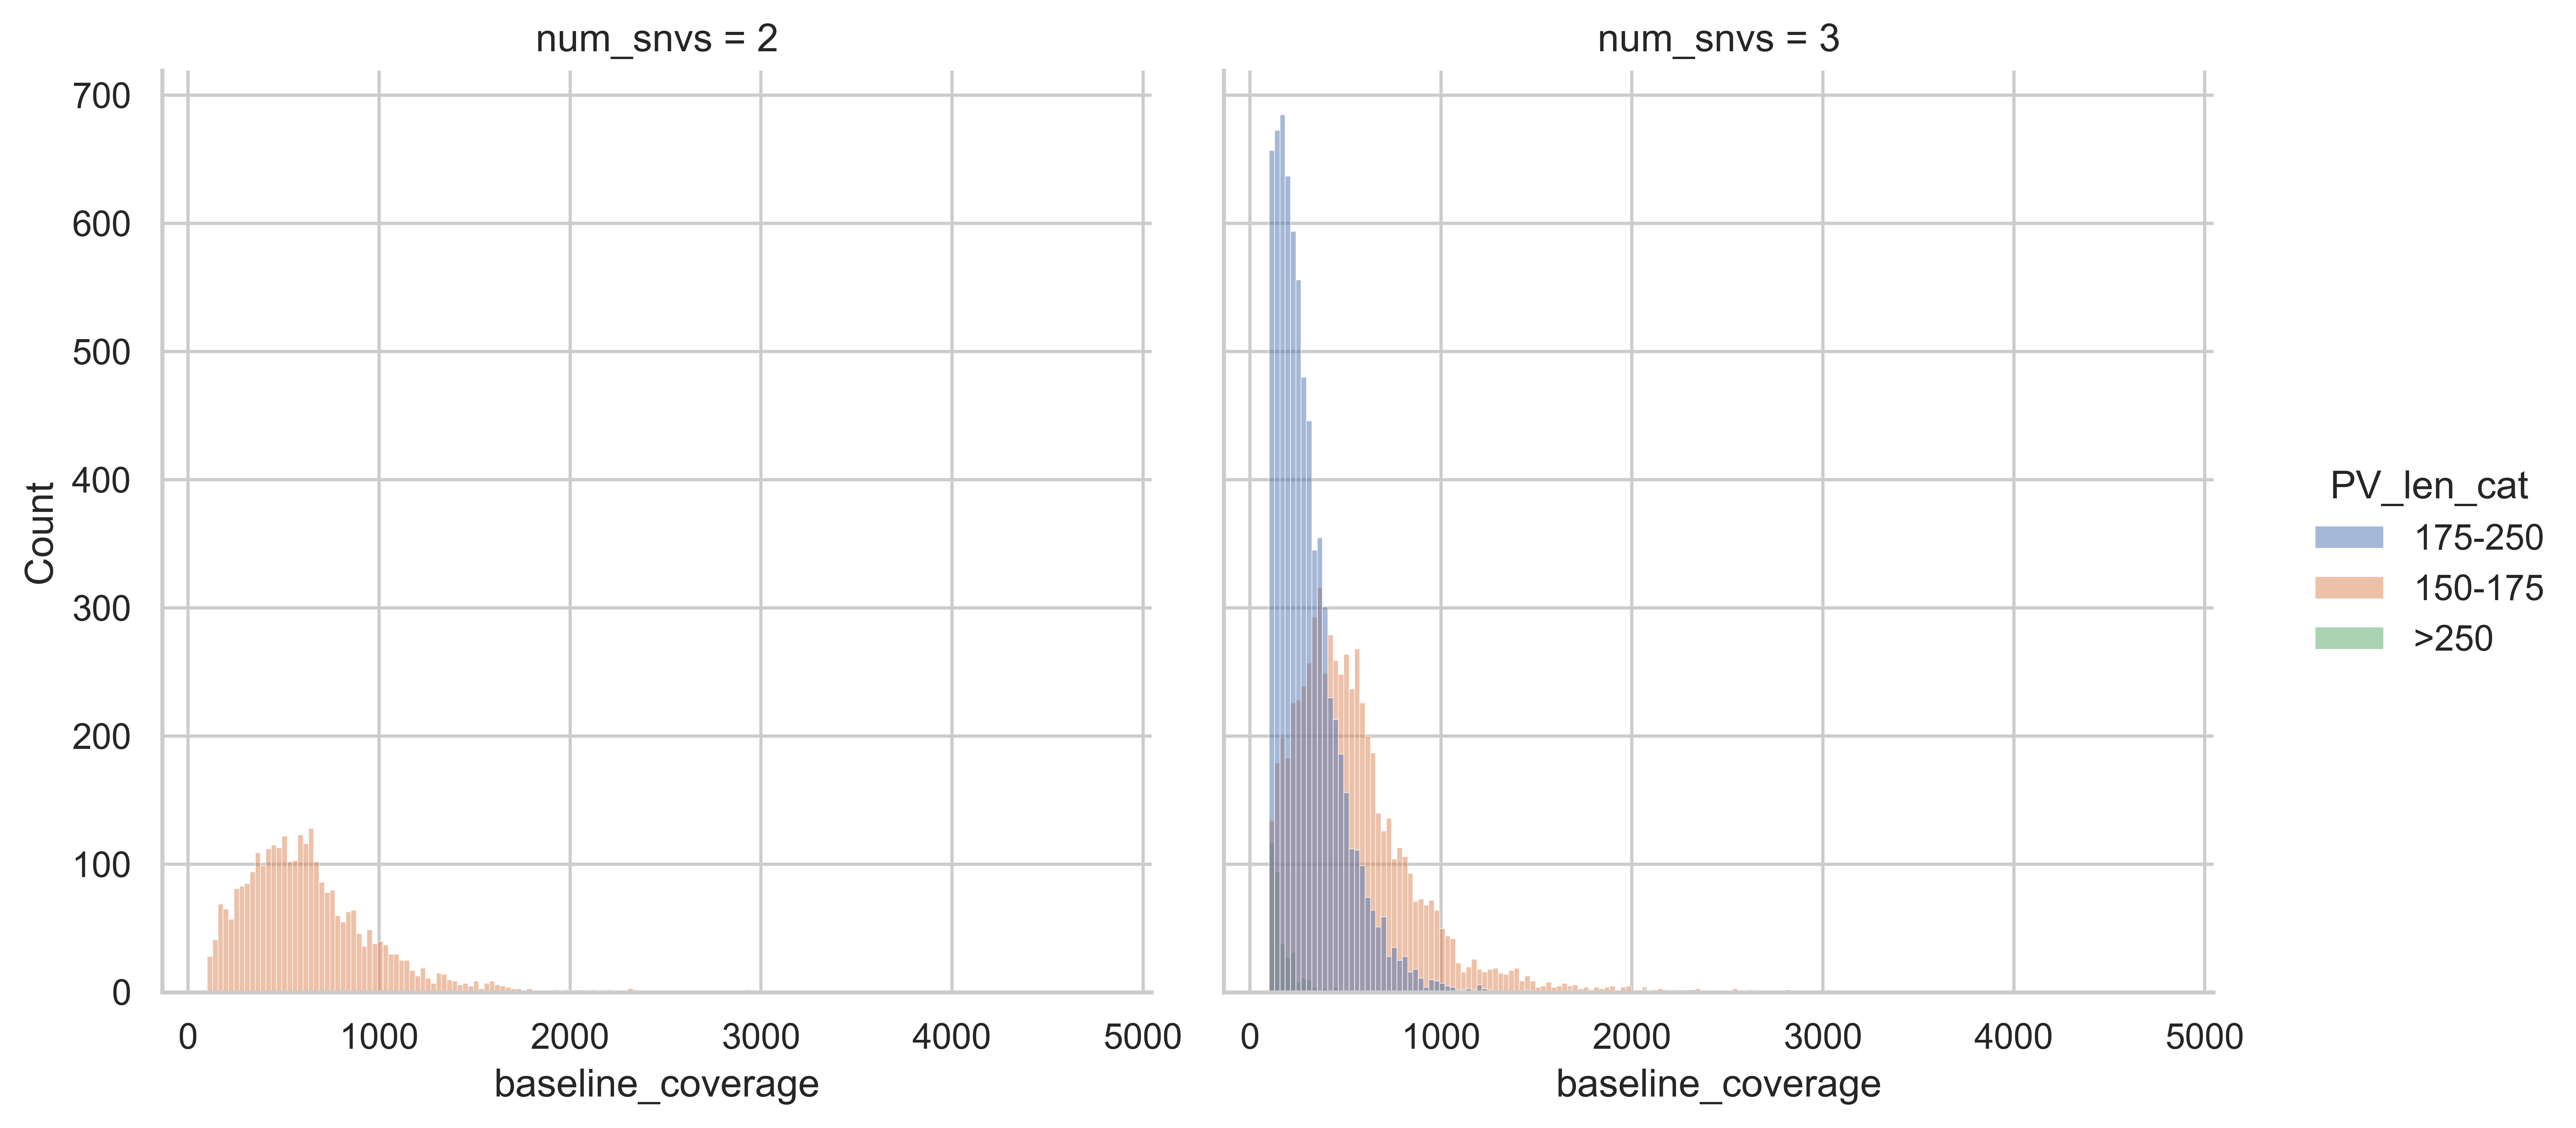

In [57]:
sns.color_palette("Paired")
sns.displot(df_GO_PV_allDP_long_PV, x="baseline_coverage",\
            hue="PV_len_cat", col='num_snvs')

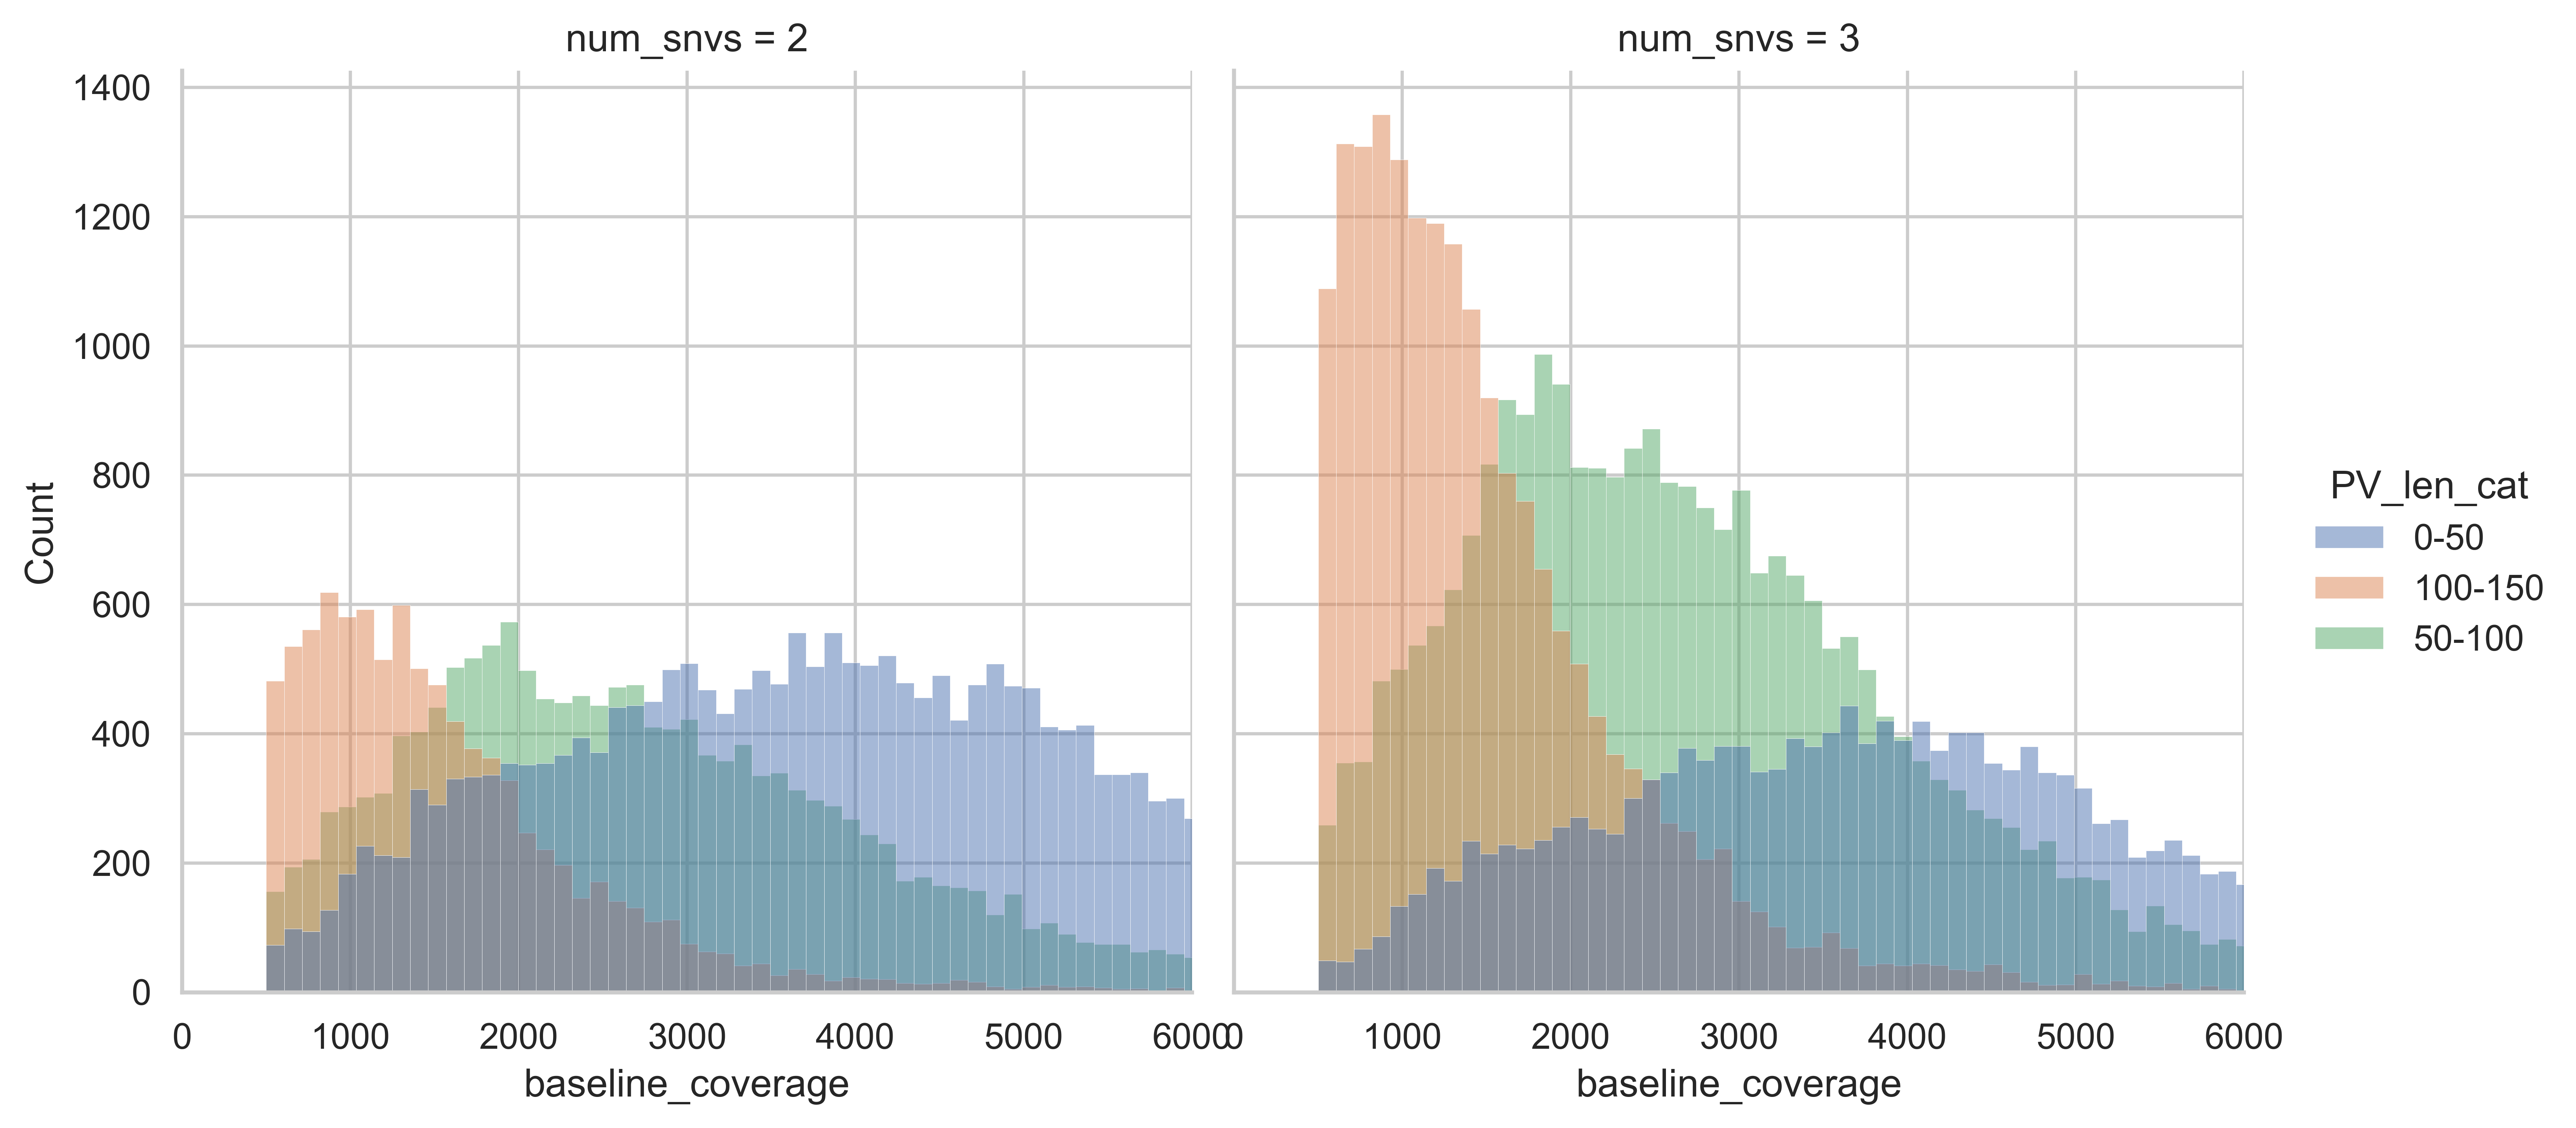

In [58]:
sns.displot(df_GO_PV_non_IG_short_PV, x="baseline_coverage",\
            hue="PV_len_cat", col='num_snvs').set(xlim=(0,6000))

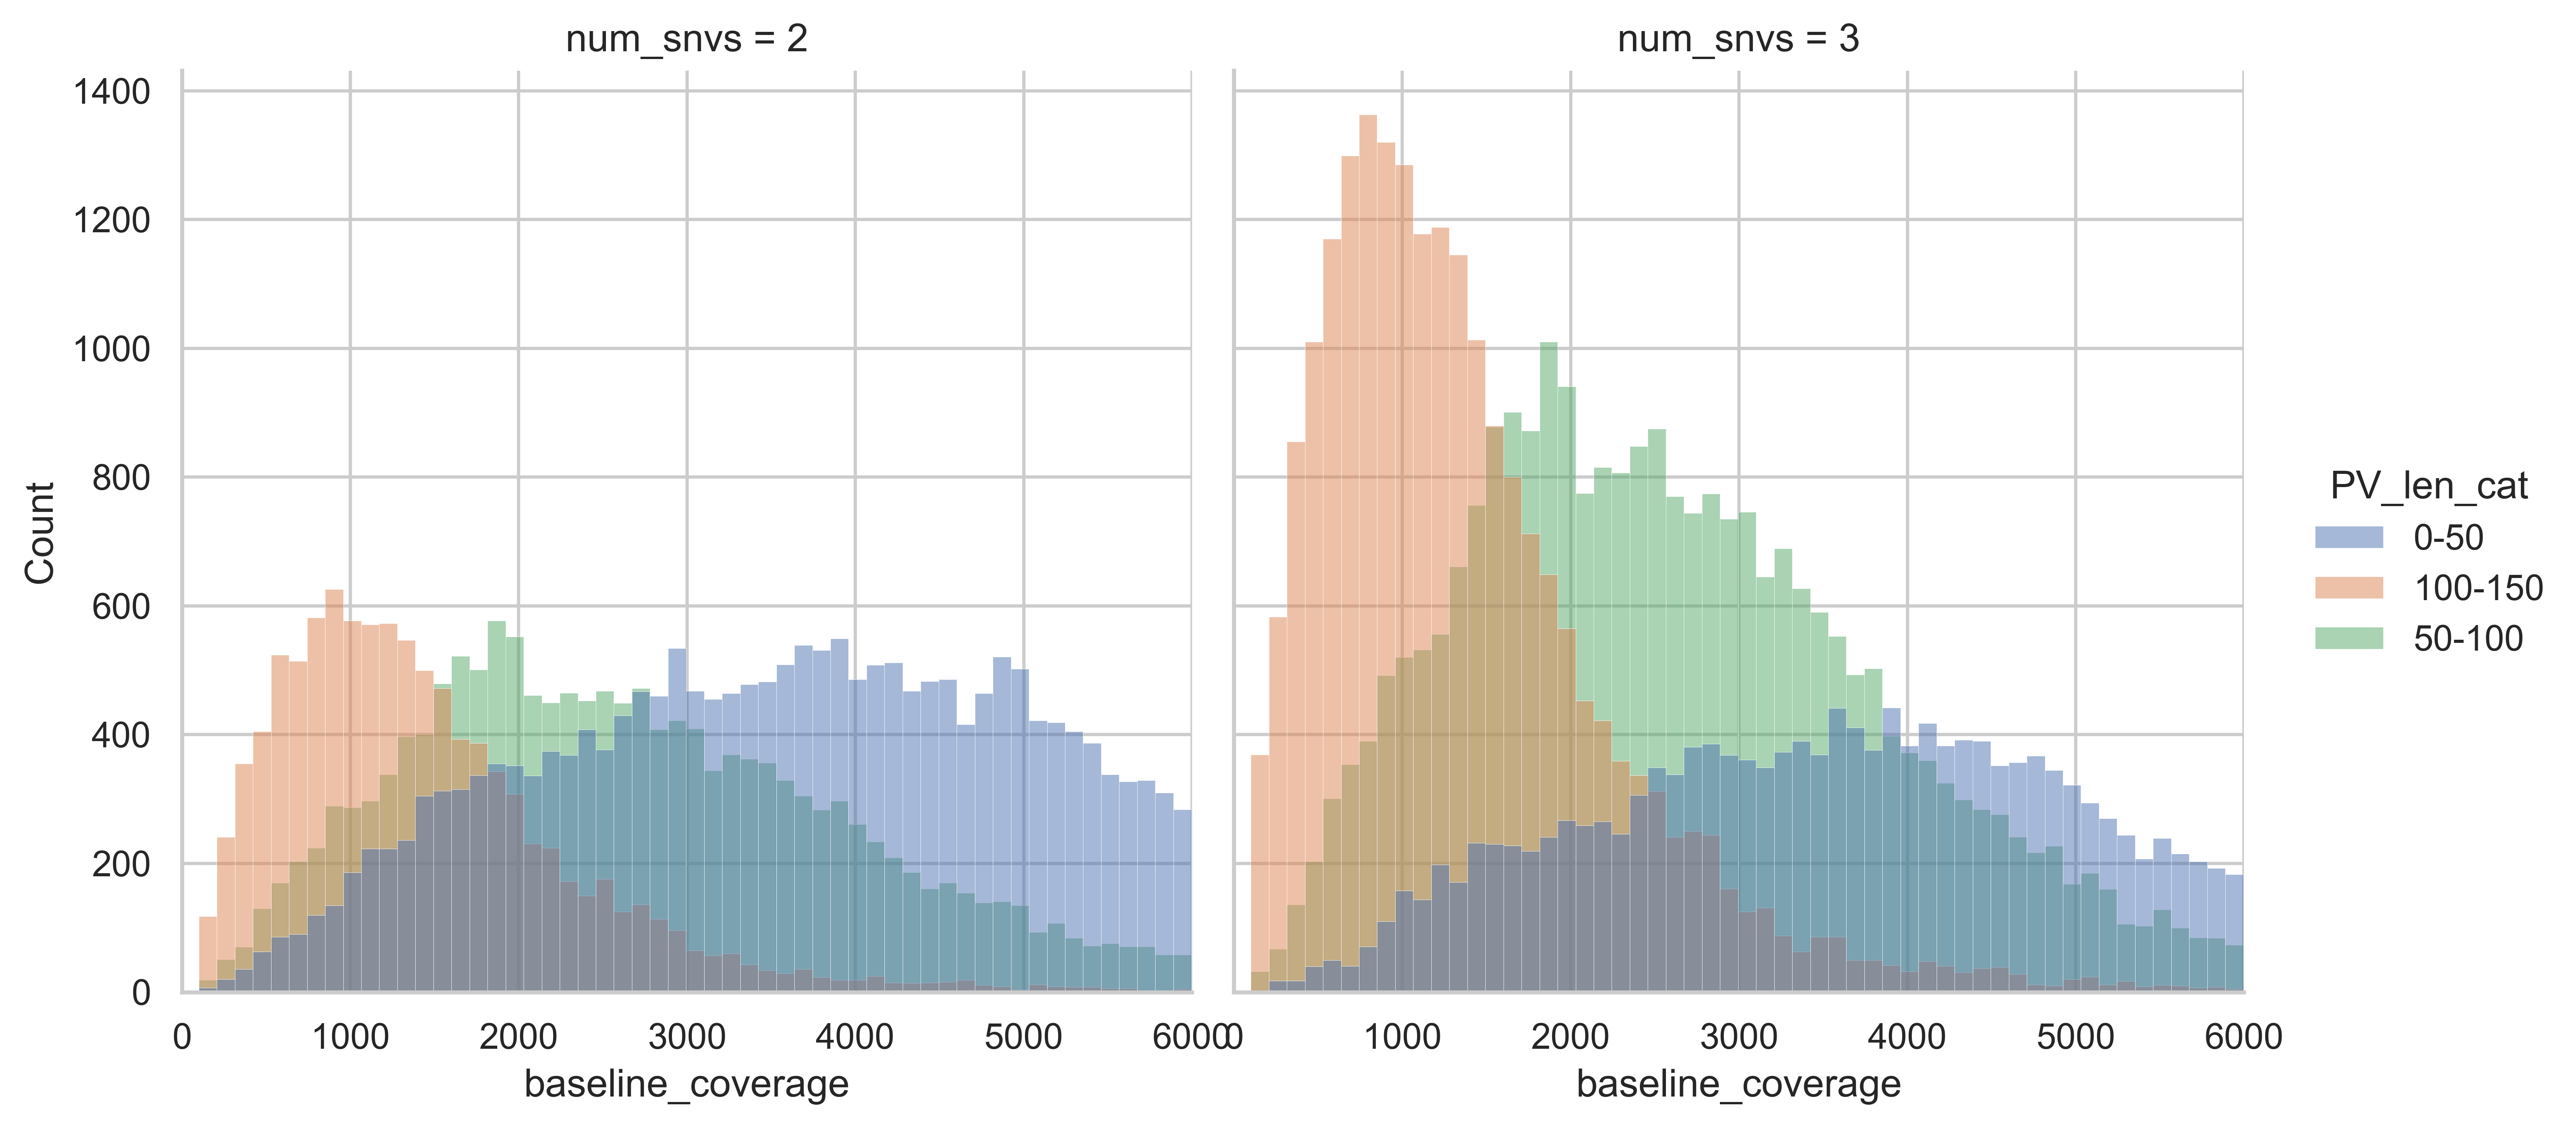

In [60]:
sns.displot(df_GO_PV_allDP_short_PV, x="baseline_coverage",\
            hue="PV_len_cat", col='num_snvs').set(xlim=(0,6000))

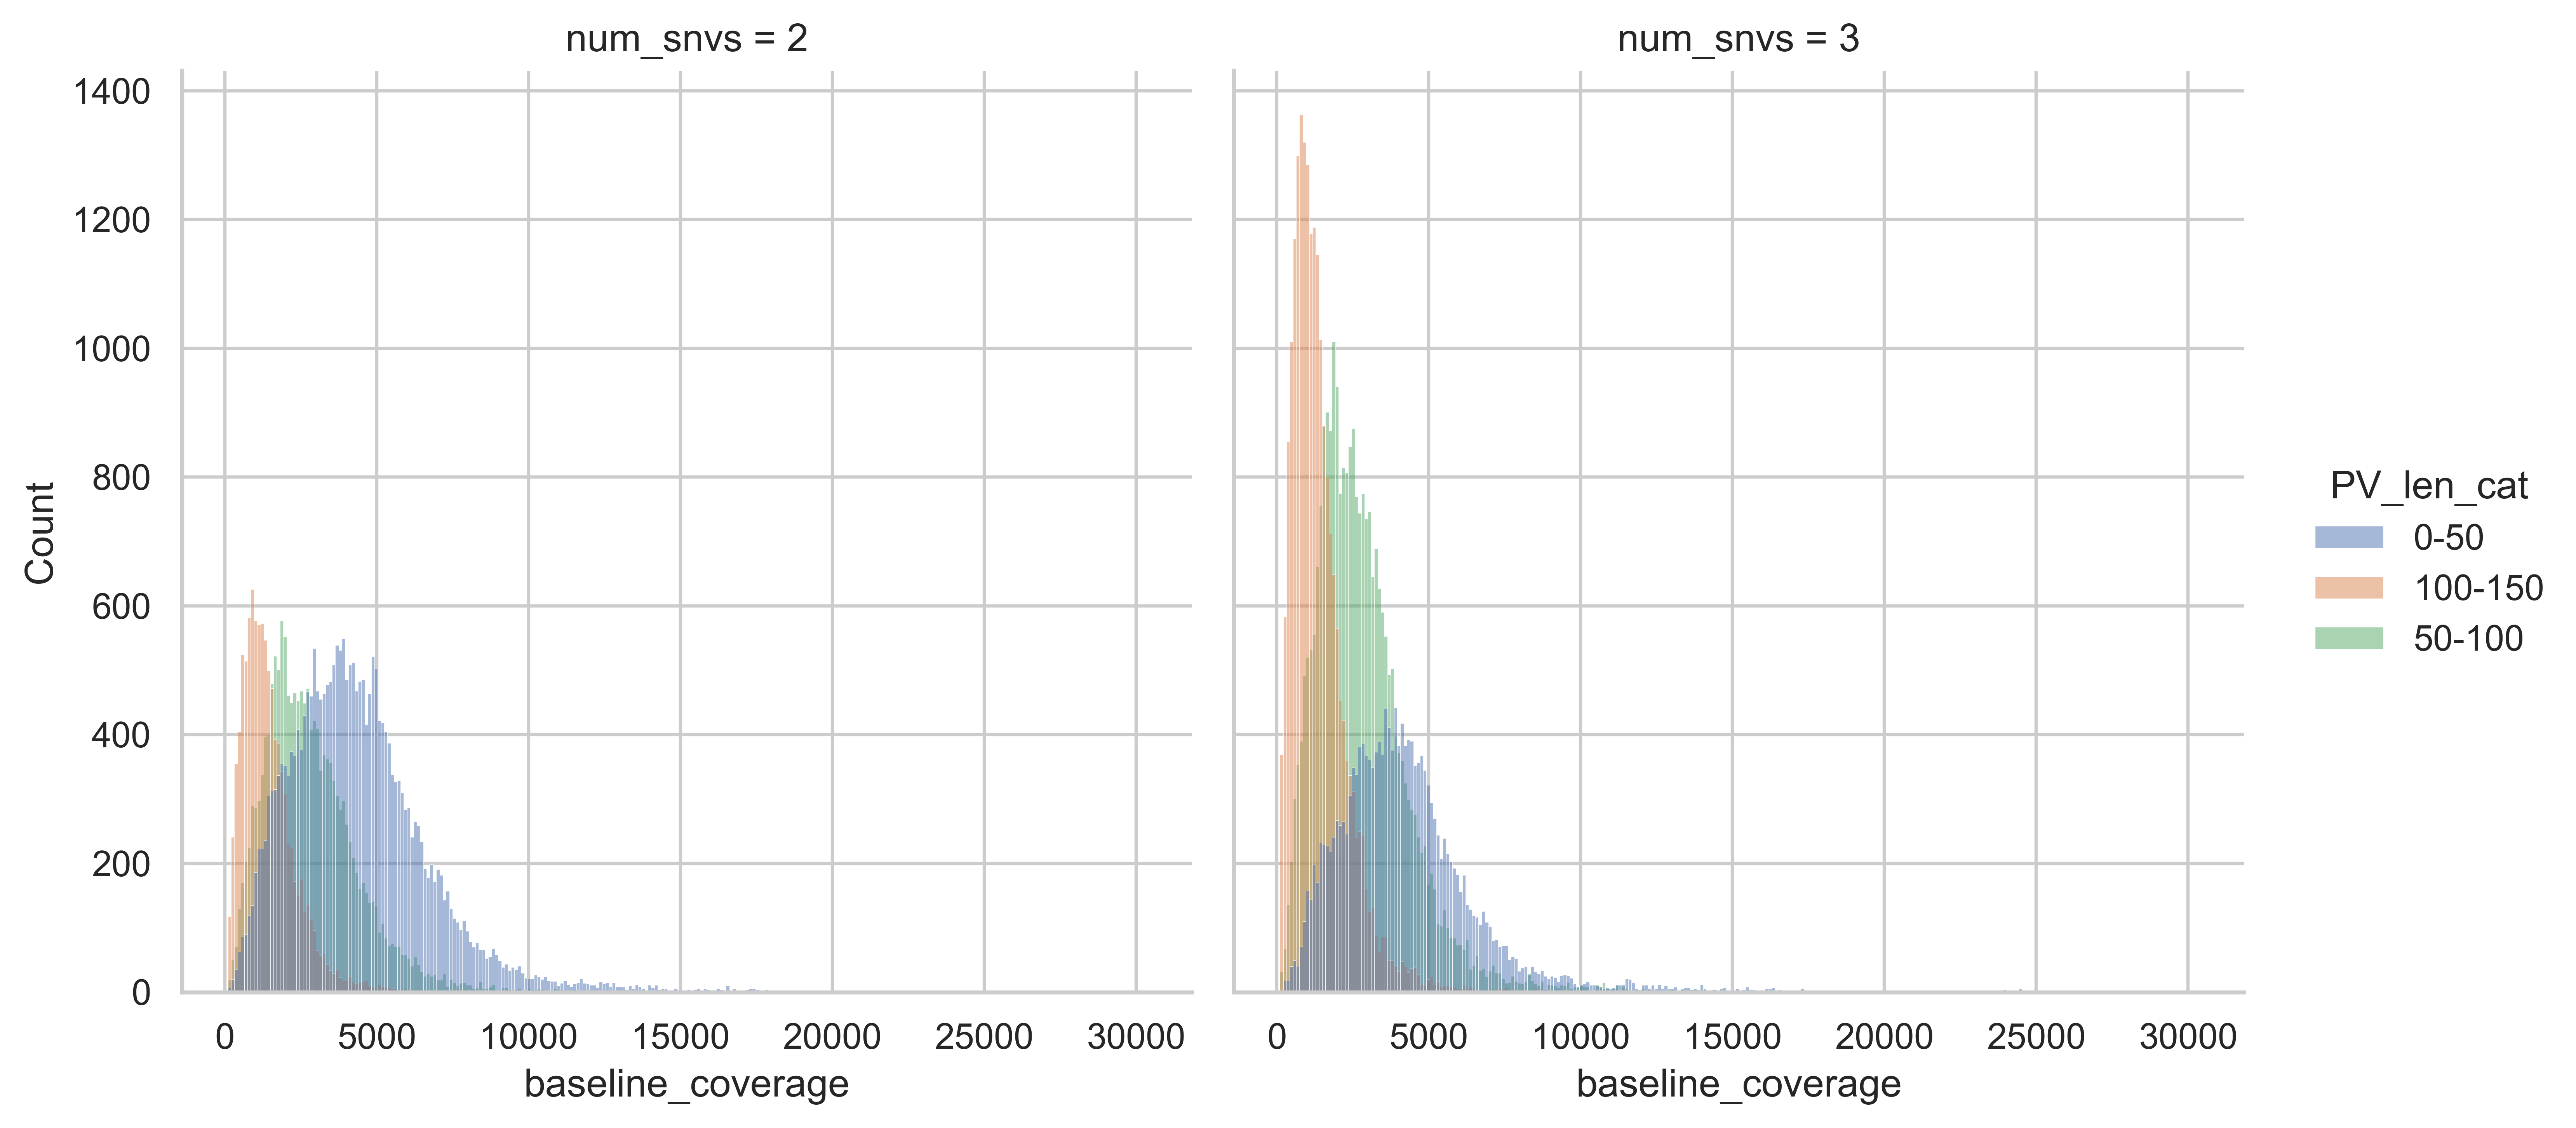

In [61]:
sns.displot(df_GO_PV_allDP_short_PV, x="baseline_coverage",\
            hue="PV_len_cat", col='num_snvs')

In [62]:
df_GO_PV_allDP.head()

cluster_1based  num_snvs   chr  \
0  frozenset({'chr1_203306432_C_T', 'chr1_2033064...         2  chr1   
1  frozenset({'chr1_203306551_G_A', 'chr1_2033064...         3  chr1   
2  frozenset({'chr1_203306530_G_A', 'chr1_2033065...         2  chr1   
3  frozenset({'chr1_203306530_G_A', 'chr1_2033065...         3  chr1   
4  frozenset({'chr1_203306530_G_A', 'chr1_2033065...         2  chr1   

       start        end  ig_filter_pass  baseline_support  baseline_coverage  \
0  203306421  203306431            True               604               5200   
1  203306434  203306560            True                 2               1973   
2  203306529  203306550            True                 9               5648   
3  203306529  203306560            True                 8               4968   
4  203306529  203306560            True                 8               5017   

   baseline_af  PV_len  sample PV_len_cat  
0     0.116154      10   11001       0-50  
1     0.001014     126   11001    100-150  
2     0.001593      21   11001       0-50  
3     0.001610      31   11001       0-50  
4     0.001595      31   11001       0-50

## Fit linear curve to categories of PV_len_cat

In [63]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [81]:
def fit_normal_curve(data, title, color):
    # Fit a normal distribution to the data:
    mu, std = norm.fit(data)

    # Plot the histogram.
    plt.hist(data, bins=25, density=True, alpha=0.6, color=color)

    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2, color=color)
    PV_count = len(data)
    title = "%s (n=%s)\nFit results: mu = %.2f,  std = %.2f" % (title, PV_count, mu, std)
    plt.title(title)

    plt.show()

In [77]:
df_GO_PV_allDP.PV_len_cat.value_counts()

50-100     42665
0-50       42193
100-150    31492
150-175     9358
175-250     7337
>250         353
Name: PV_len_cat, dtype: int64

In [78]:
df_GO_PV_allDP['PV_len_cat'].unique()

array(['0-50', '100-150', '50-100', '175-250', '150-175', '>250'],
      dtype=object)

In [79]:
PV_0_50 = df_GO_PV_allDP[df_GO_PV_allDP['PV_len_cat']=='0-50'].baseline_coverage
PV_50_100 =df_GO_PV_allDP[df_GO_PV_allDP['PV_len_cat']=='50-100'].baseline_coverage
PV_100_150 = df_GO_PV_allDP[df_GO_PV_allDP['PV_len_cat']=='100-150'].baseline_coverage
PV_150_175 = df_GO_PV_allDP[df_GO_PV_allDP['PV_len_cat']=='150-175'].baseline_coverage
PV_175_250 = df_GO_PV_allDP[df_GO_PV_allDP['PV_len_cat']=='175-250'].baseline_coverage
PV_ge_250 = df_GO_PV_allDP[df_GO_PV_allDP['PV_len_cat']=='>250'].baseline_coverage

/var/folders/d3/n6gqzx2x2cd87p3mfy_j0q8r0000gp/T/ipykernel_13616/1579727512.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.1, 0.1, 0.1, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color=color)


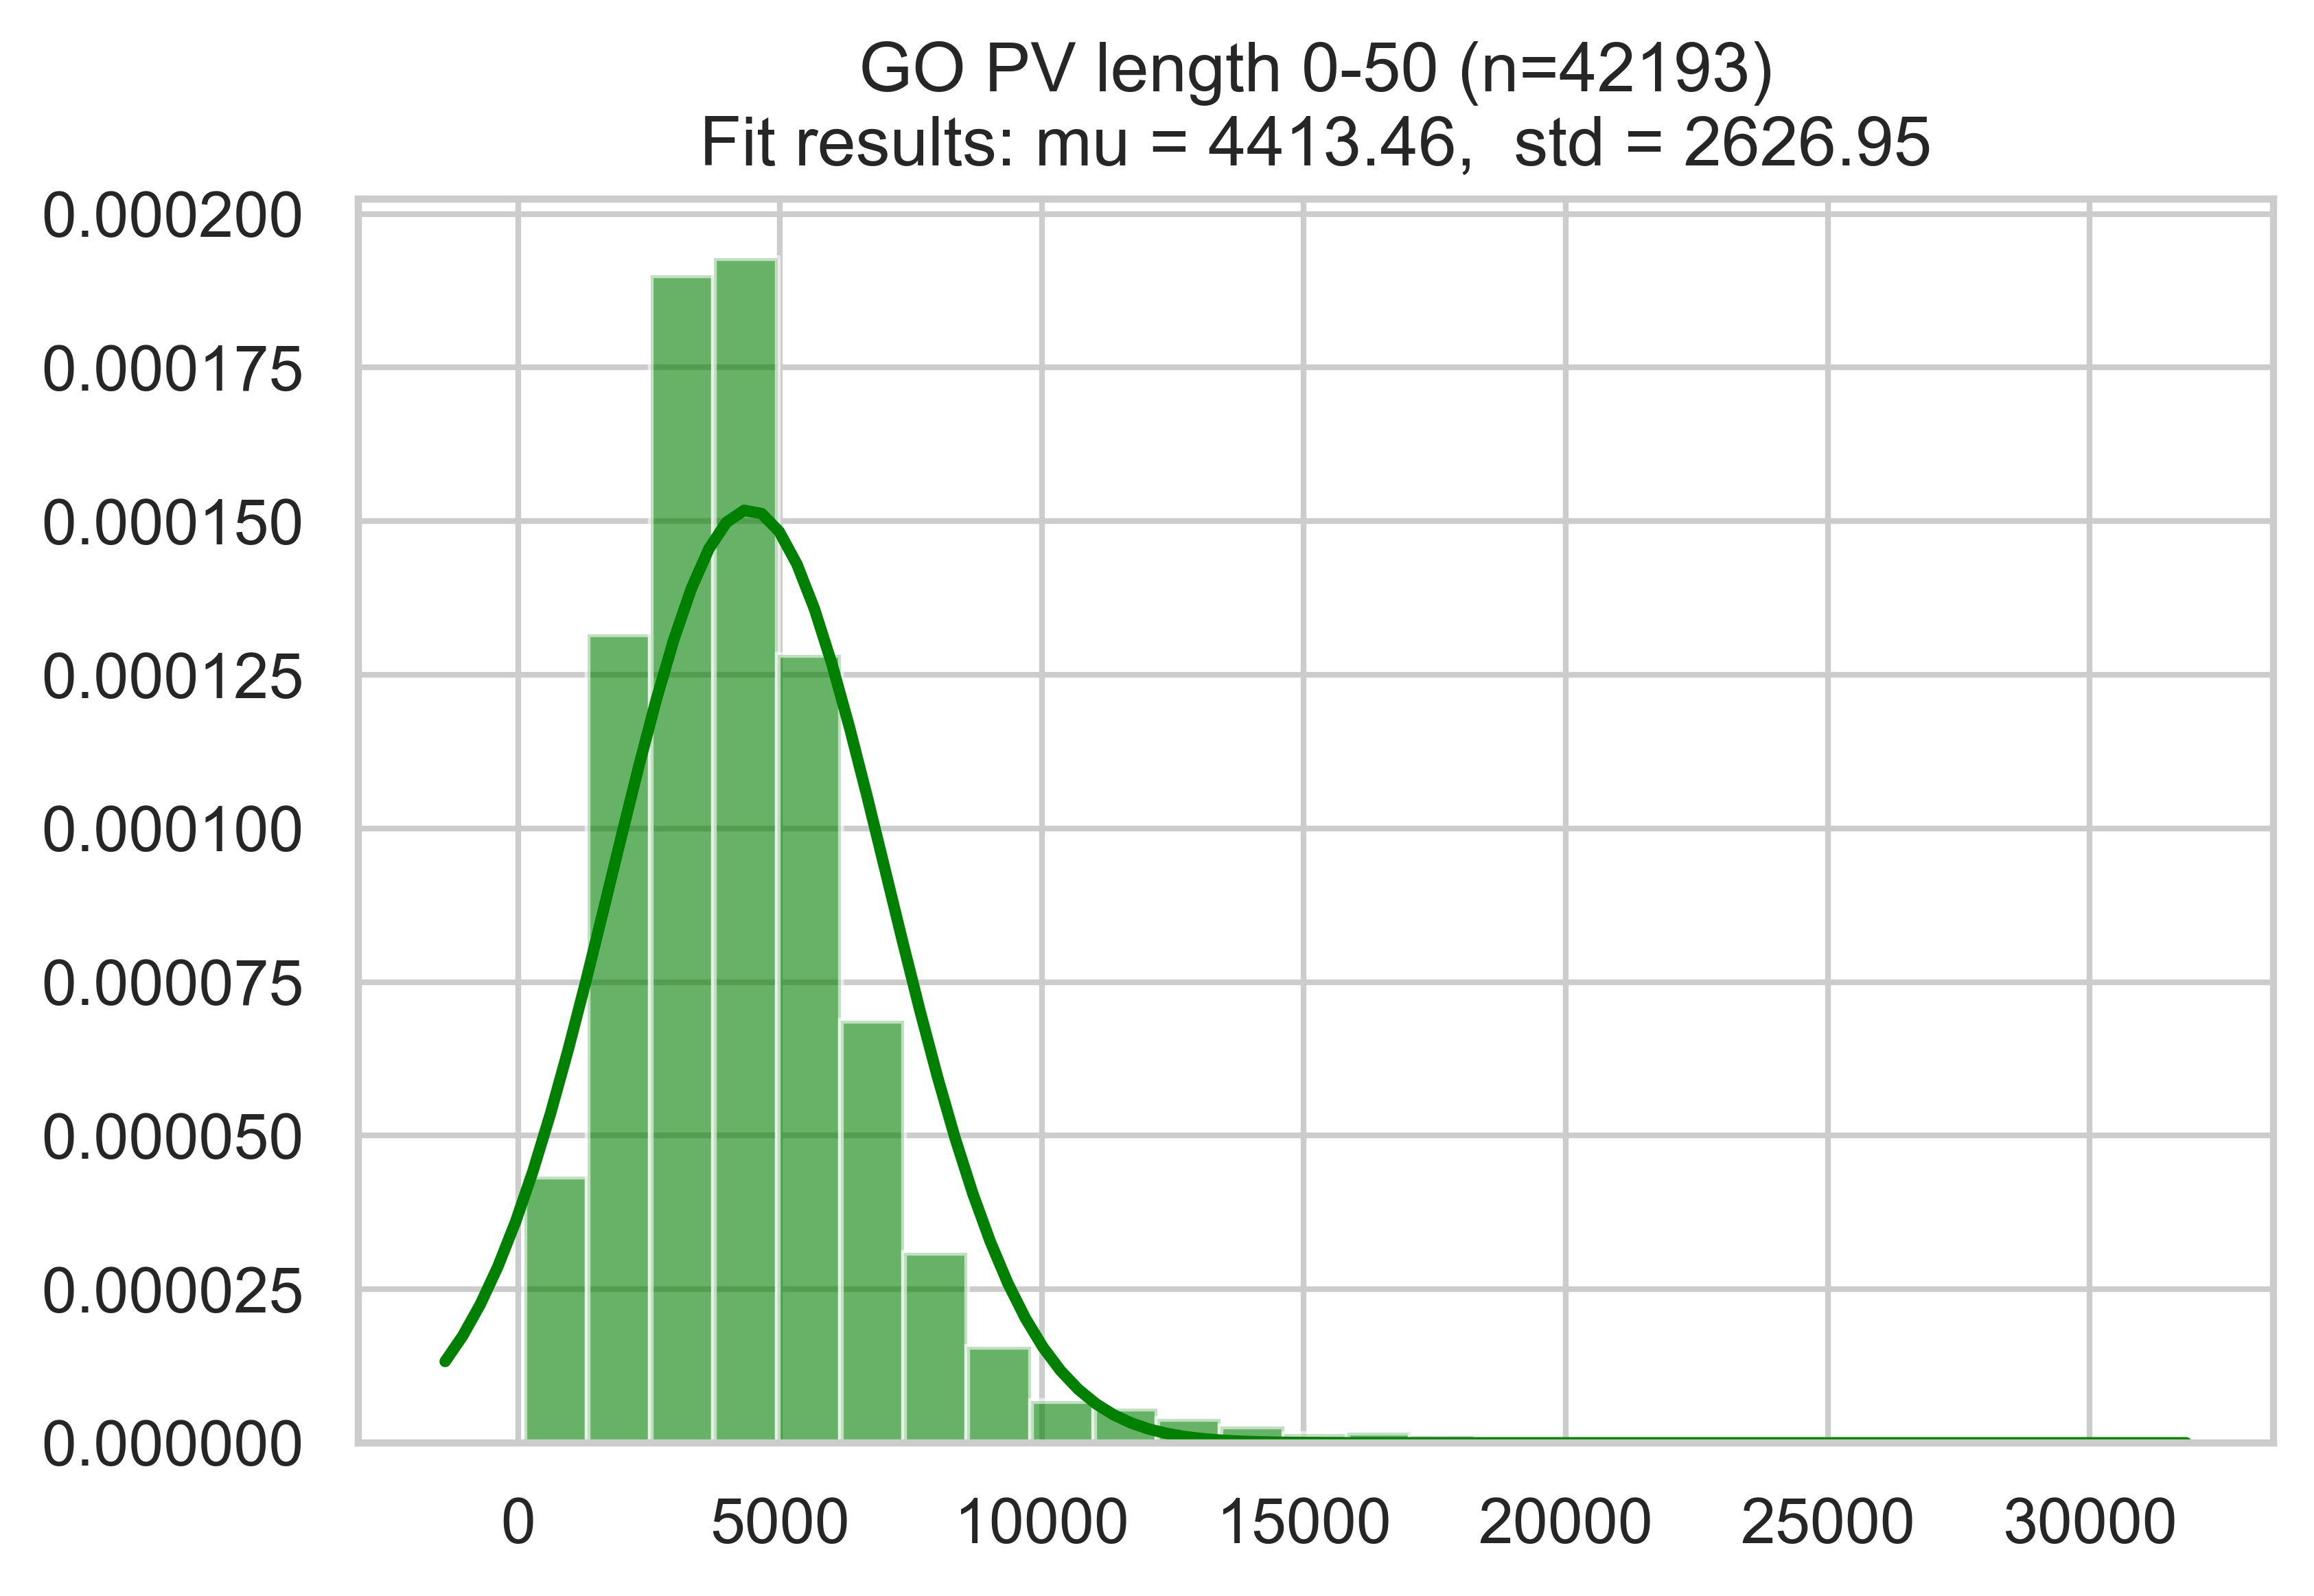

/var/folders/d3/n6gqzx2x2cd87p3mfy_j0q8r0000gp/T/ipykernel_13616/1579727512.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.1, 0.1, 0.1, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color=color)


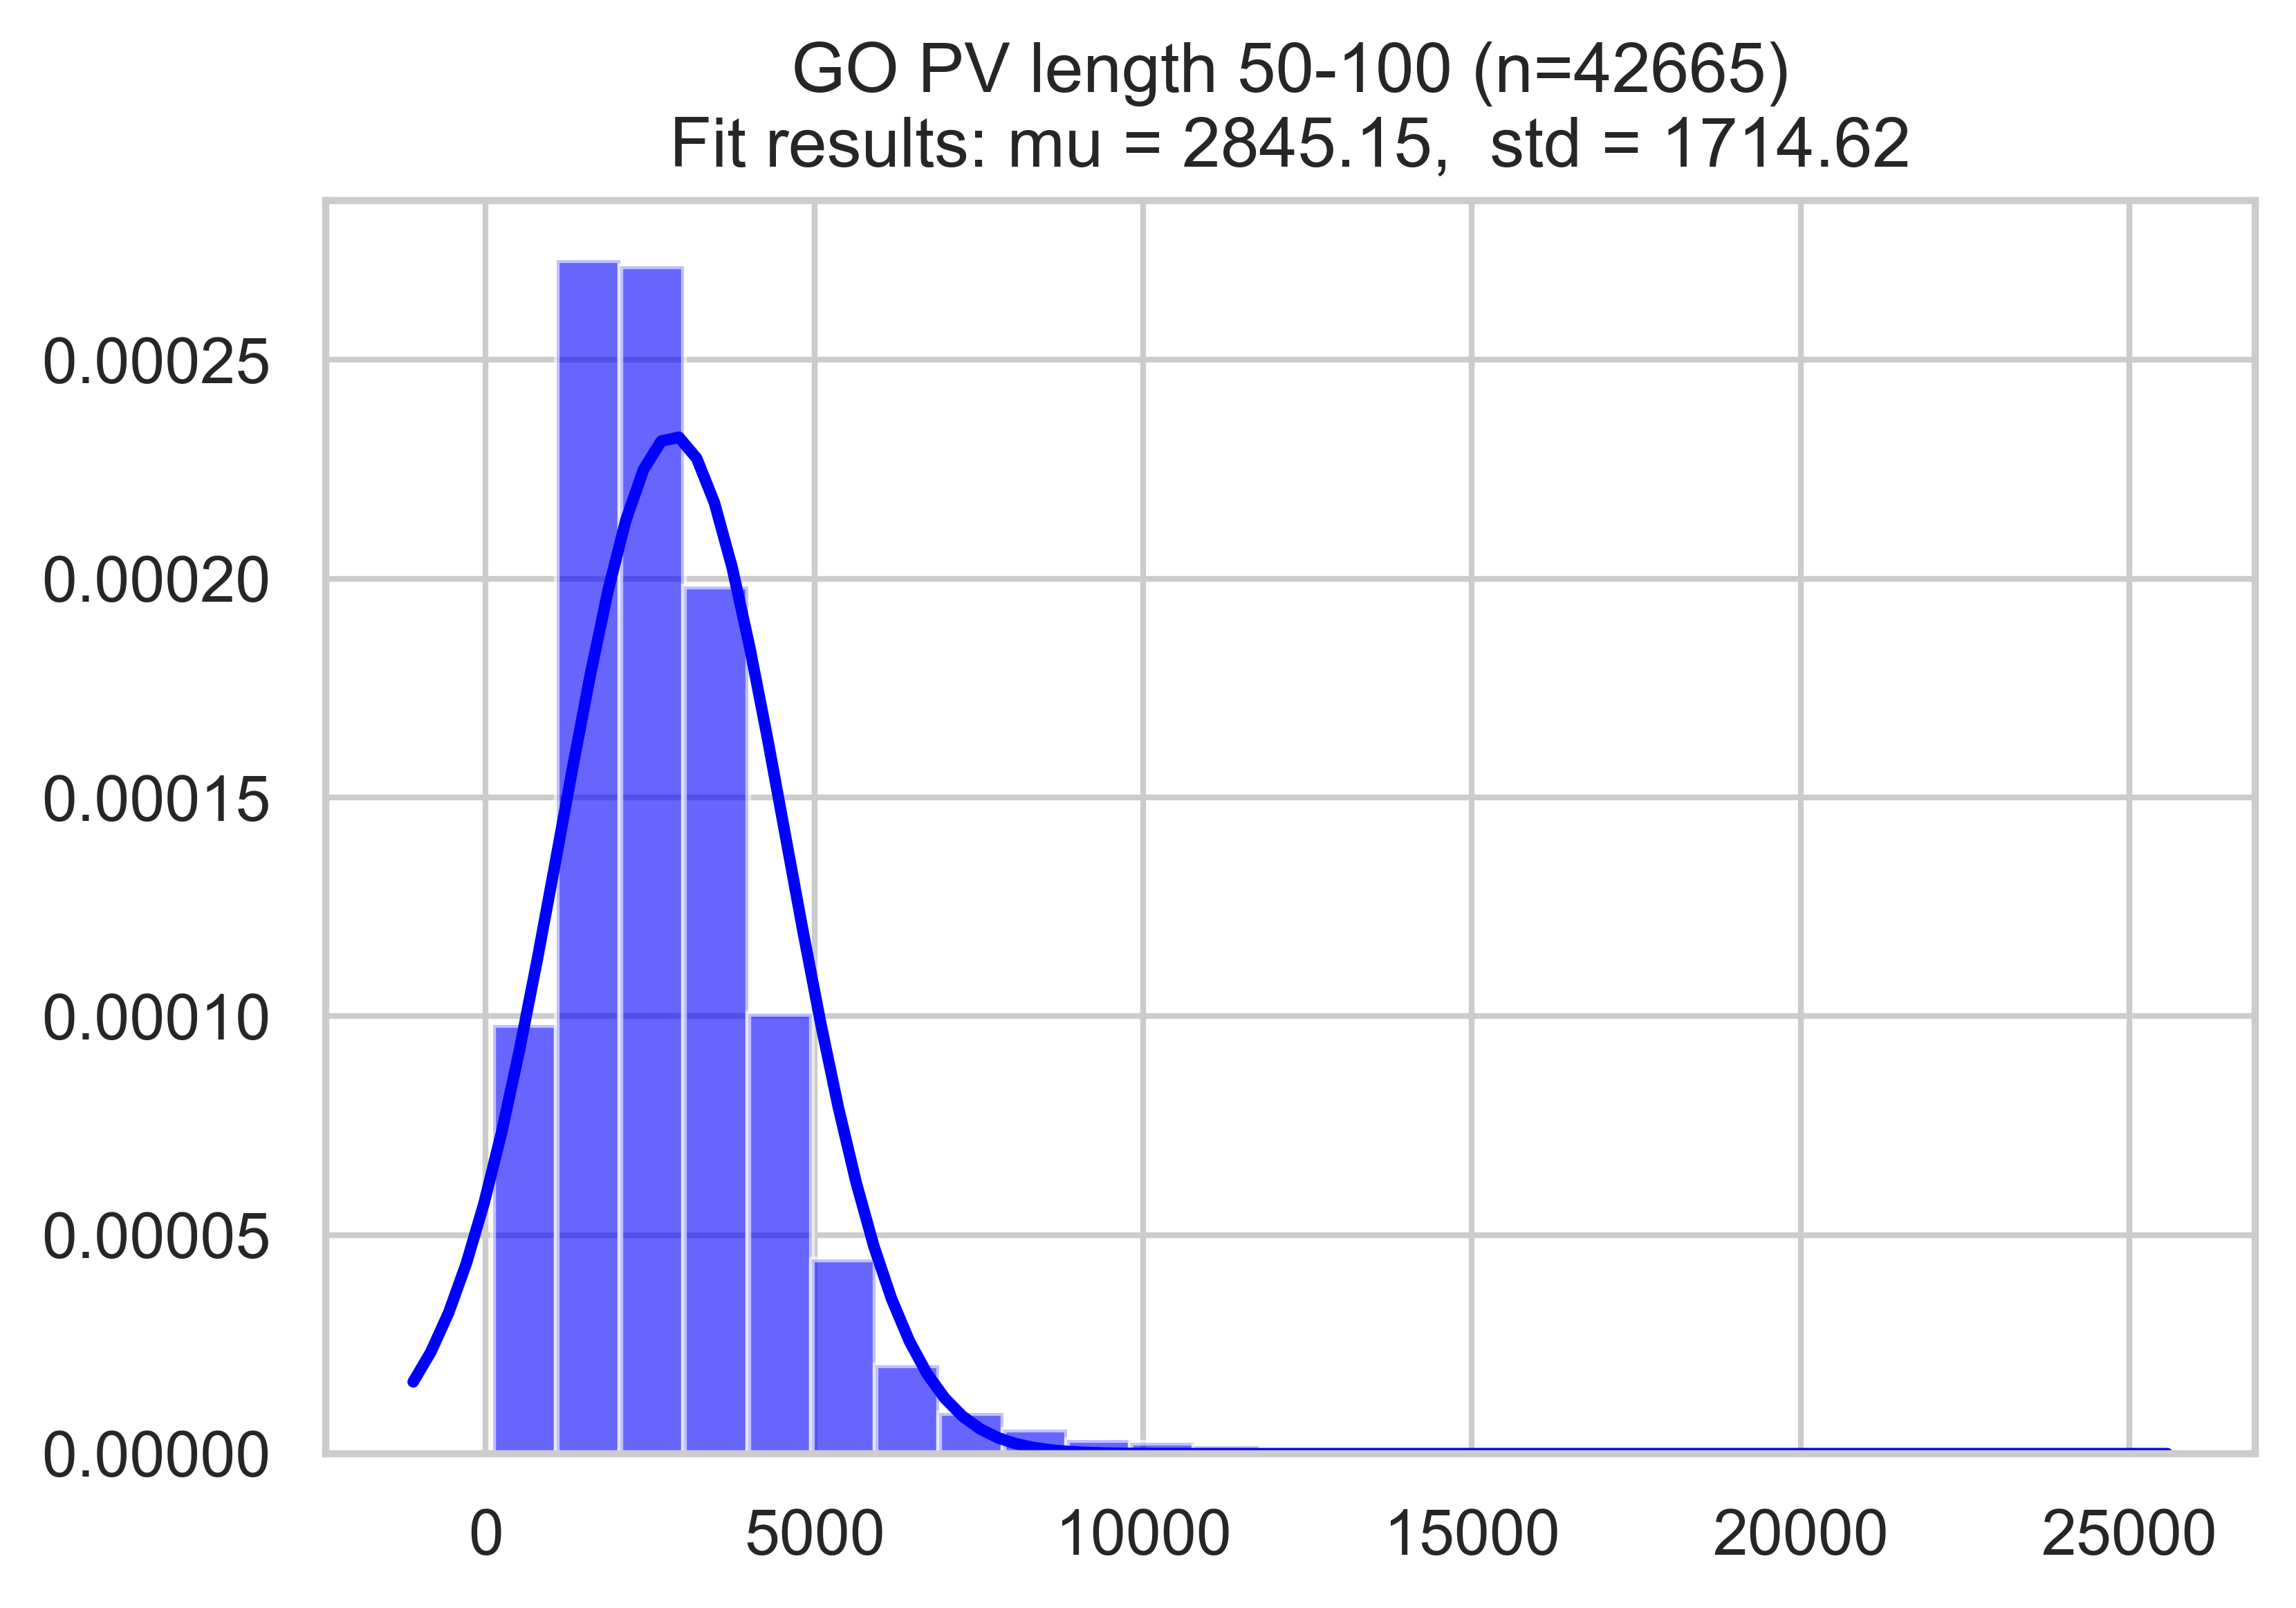

/var/folders/d3/n6gqzx2x2cd87p3mfy_j0q8r0000gp/T/ipykernel_13616/1579727512.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.1, 0.1, 0.1, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color=color)


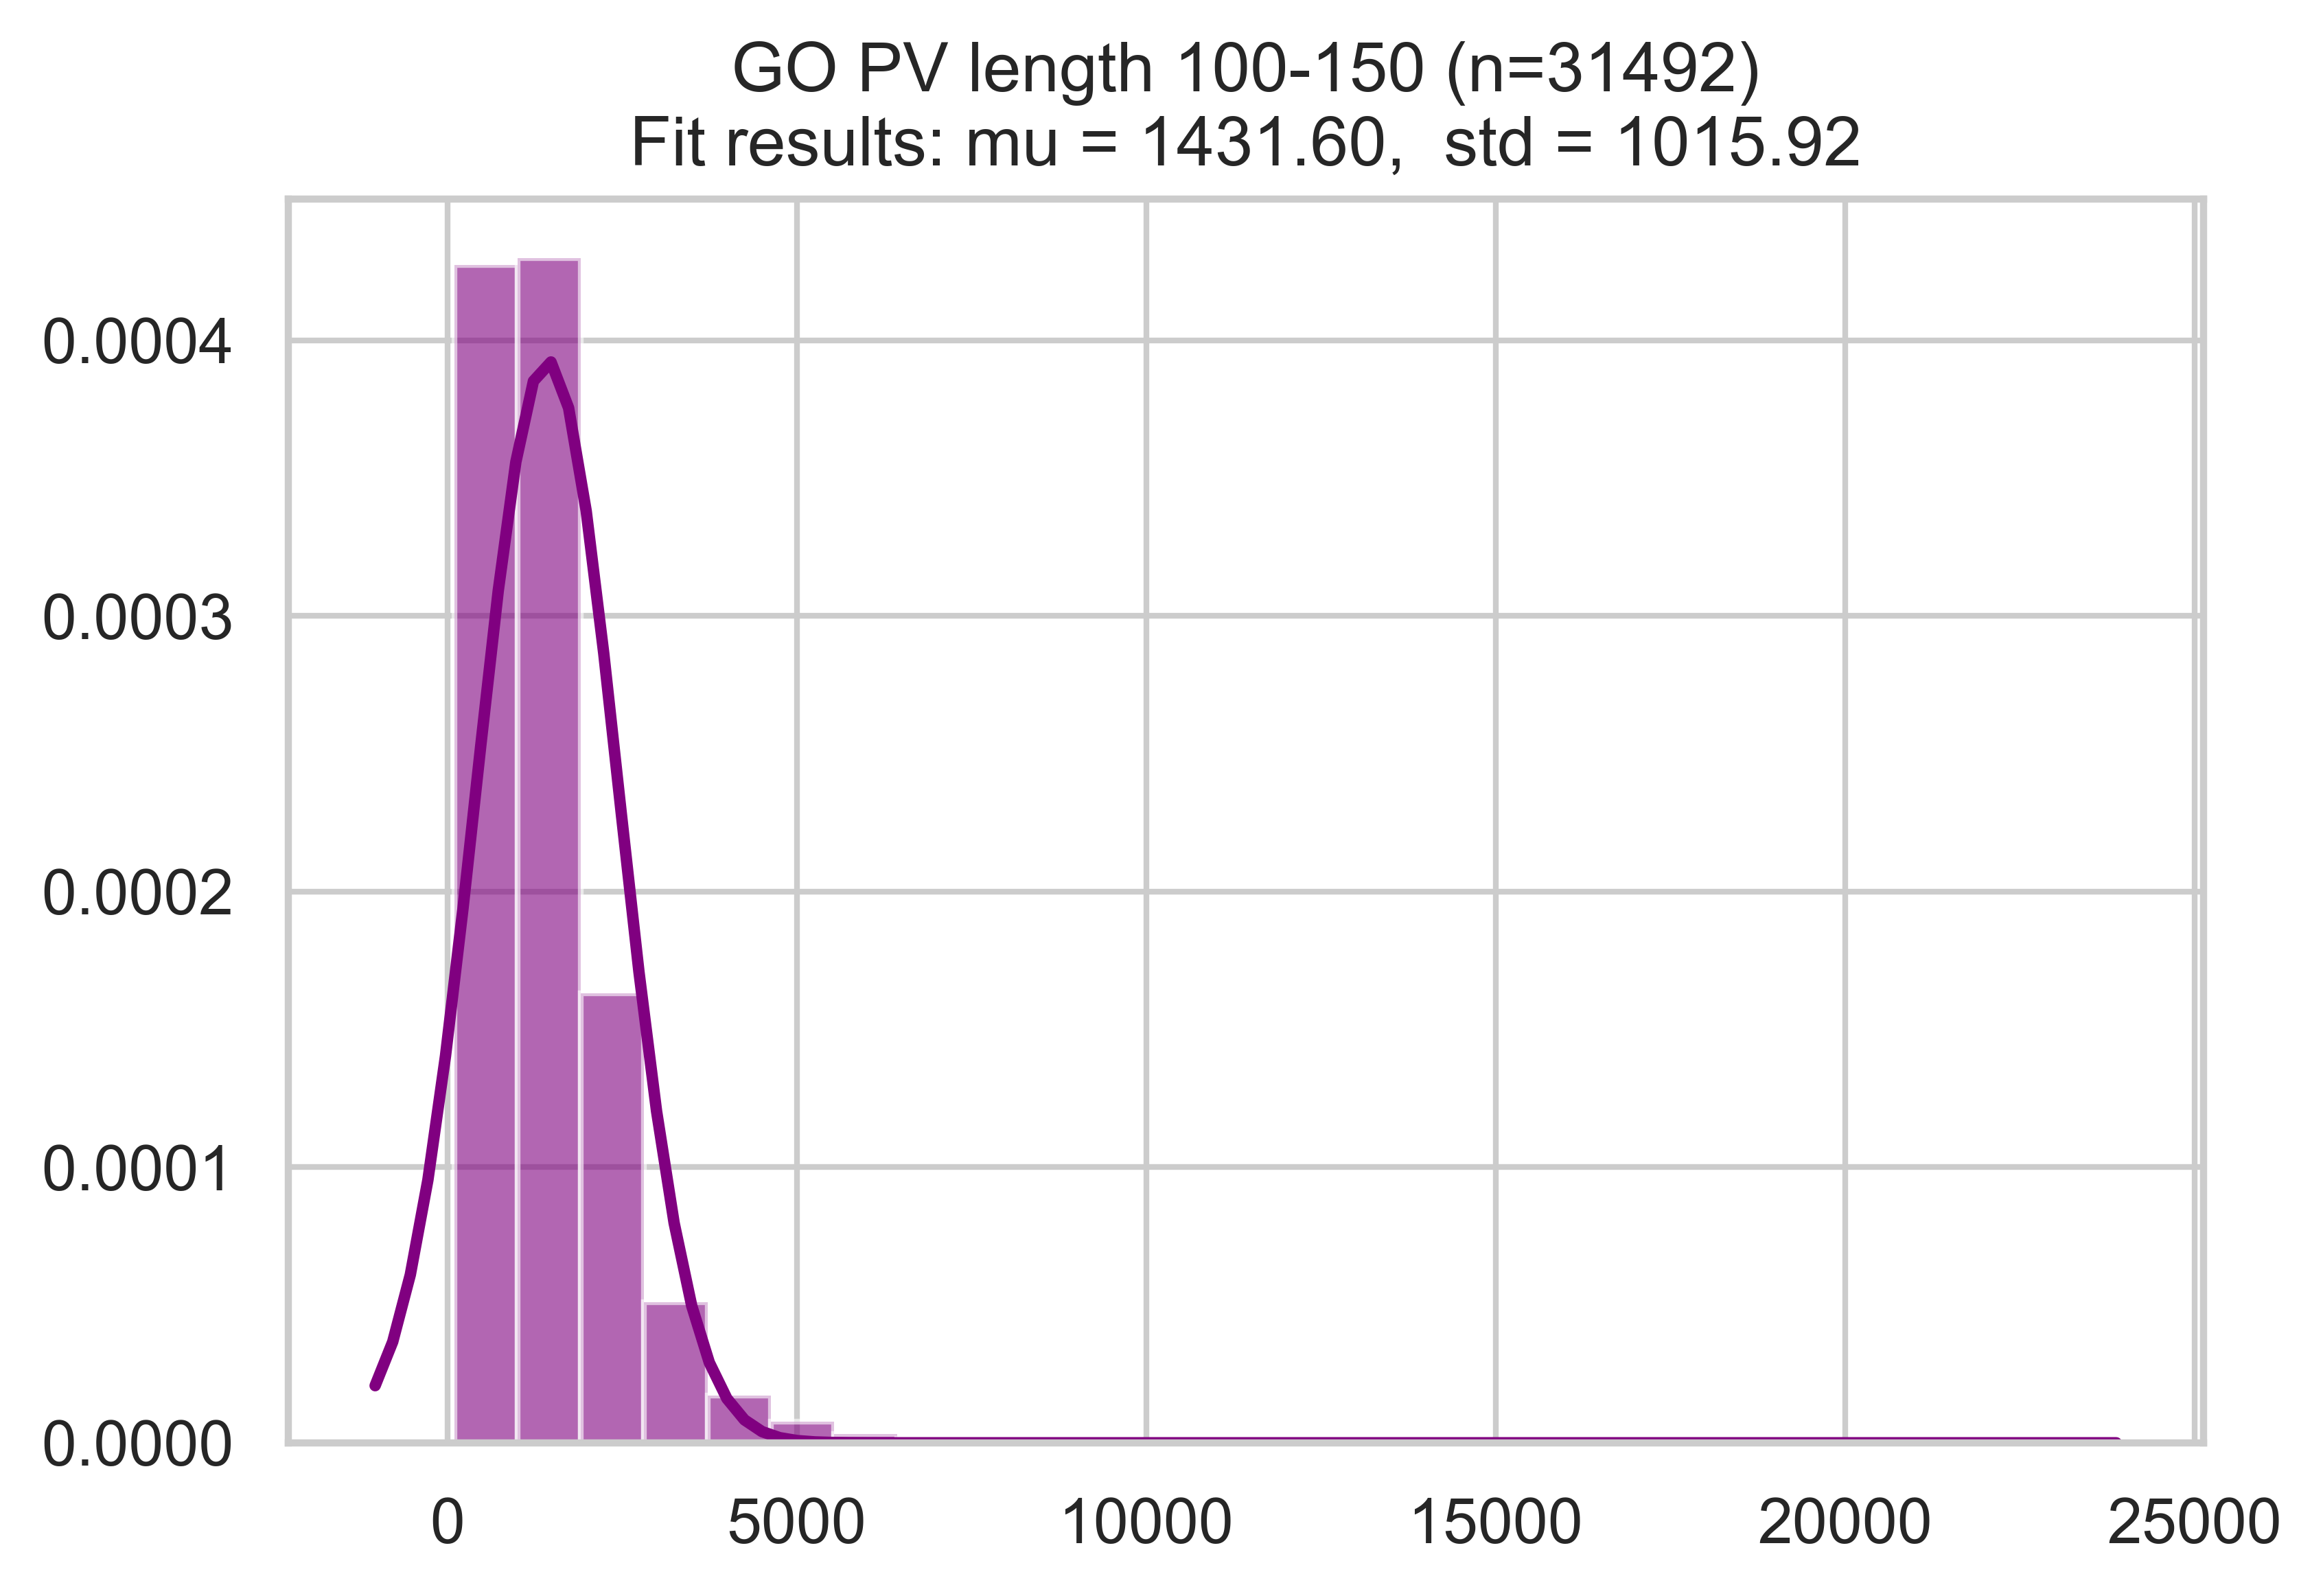

/var/folders/d3/n6gqzx2x2cd87p3mfy_j0q8r0000gp/T/ipykernel_13616/1579727512.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.1, 0.1, 0.1, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color=color)


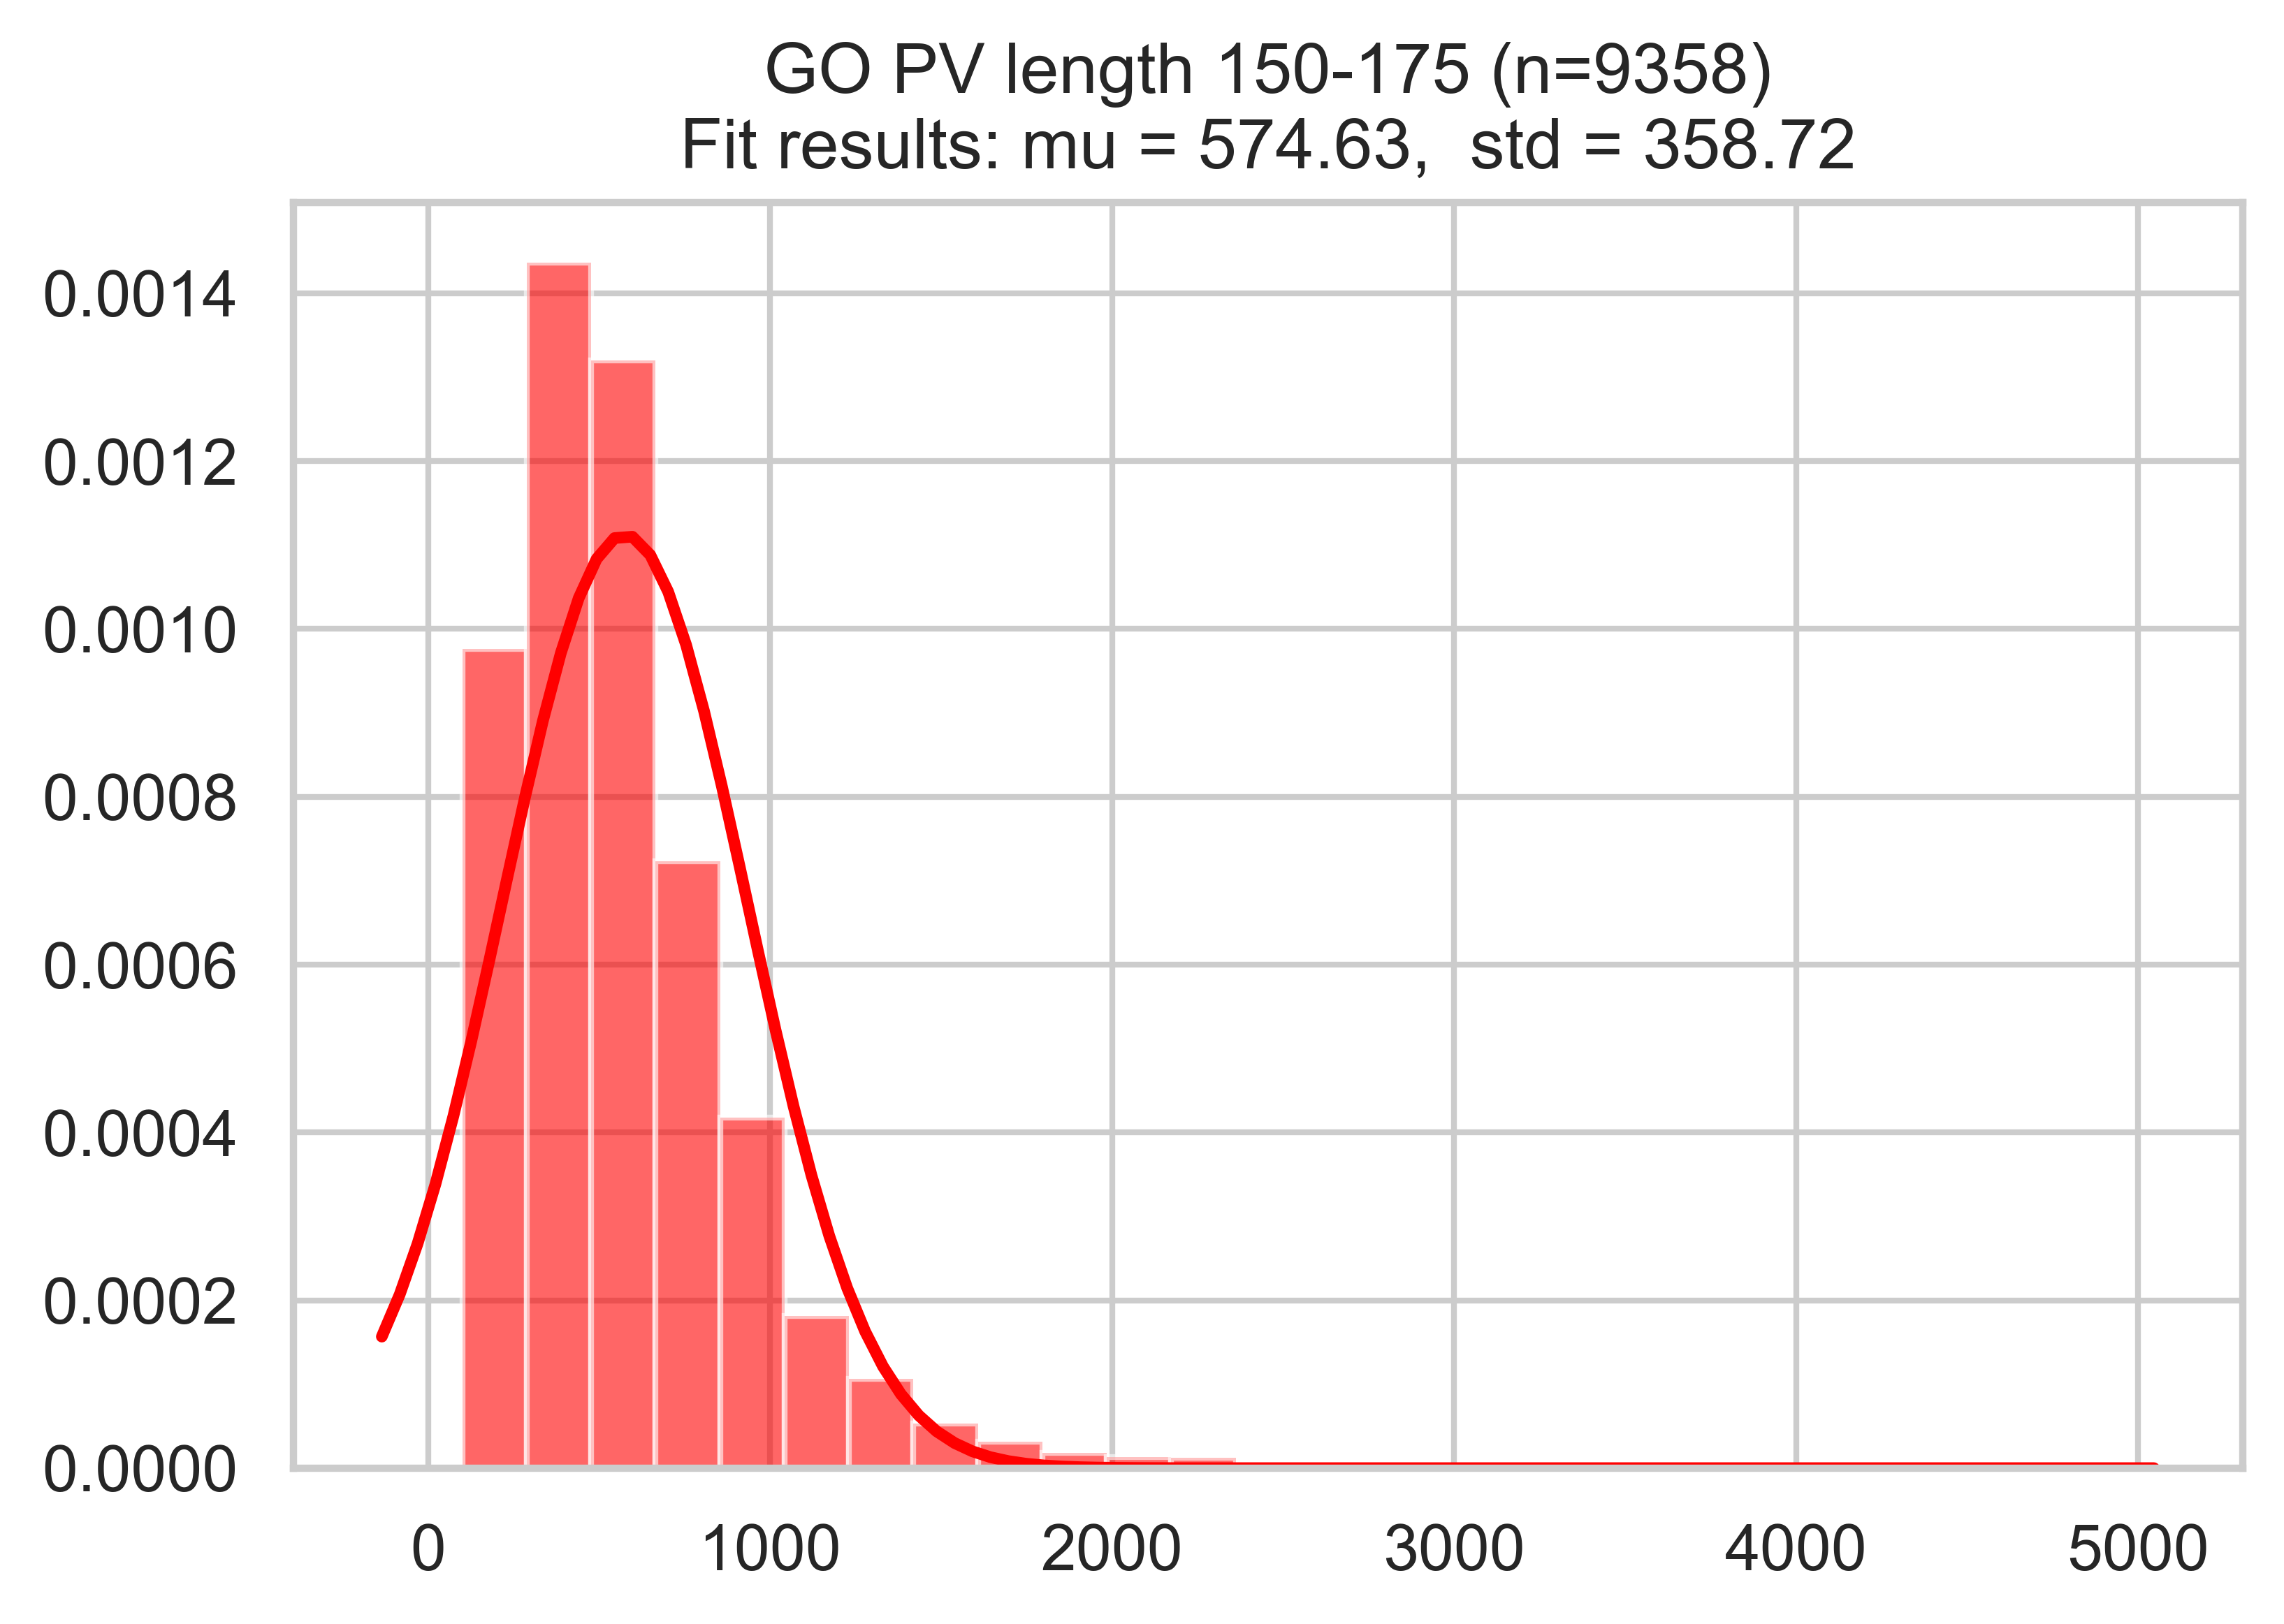

/var/folders/d3/n6gqzx2x2cd87p3mfy_j0q8r0000gp/T/ipykernel_13616/1579727512.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.1, 0.1, 0.1, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color=color)


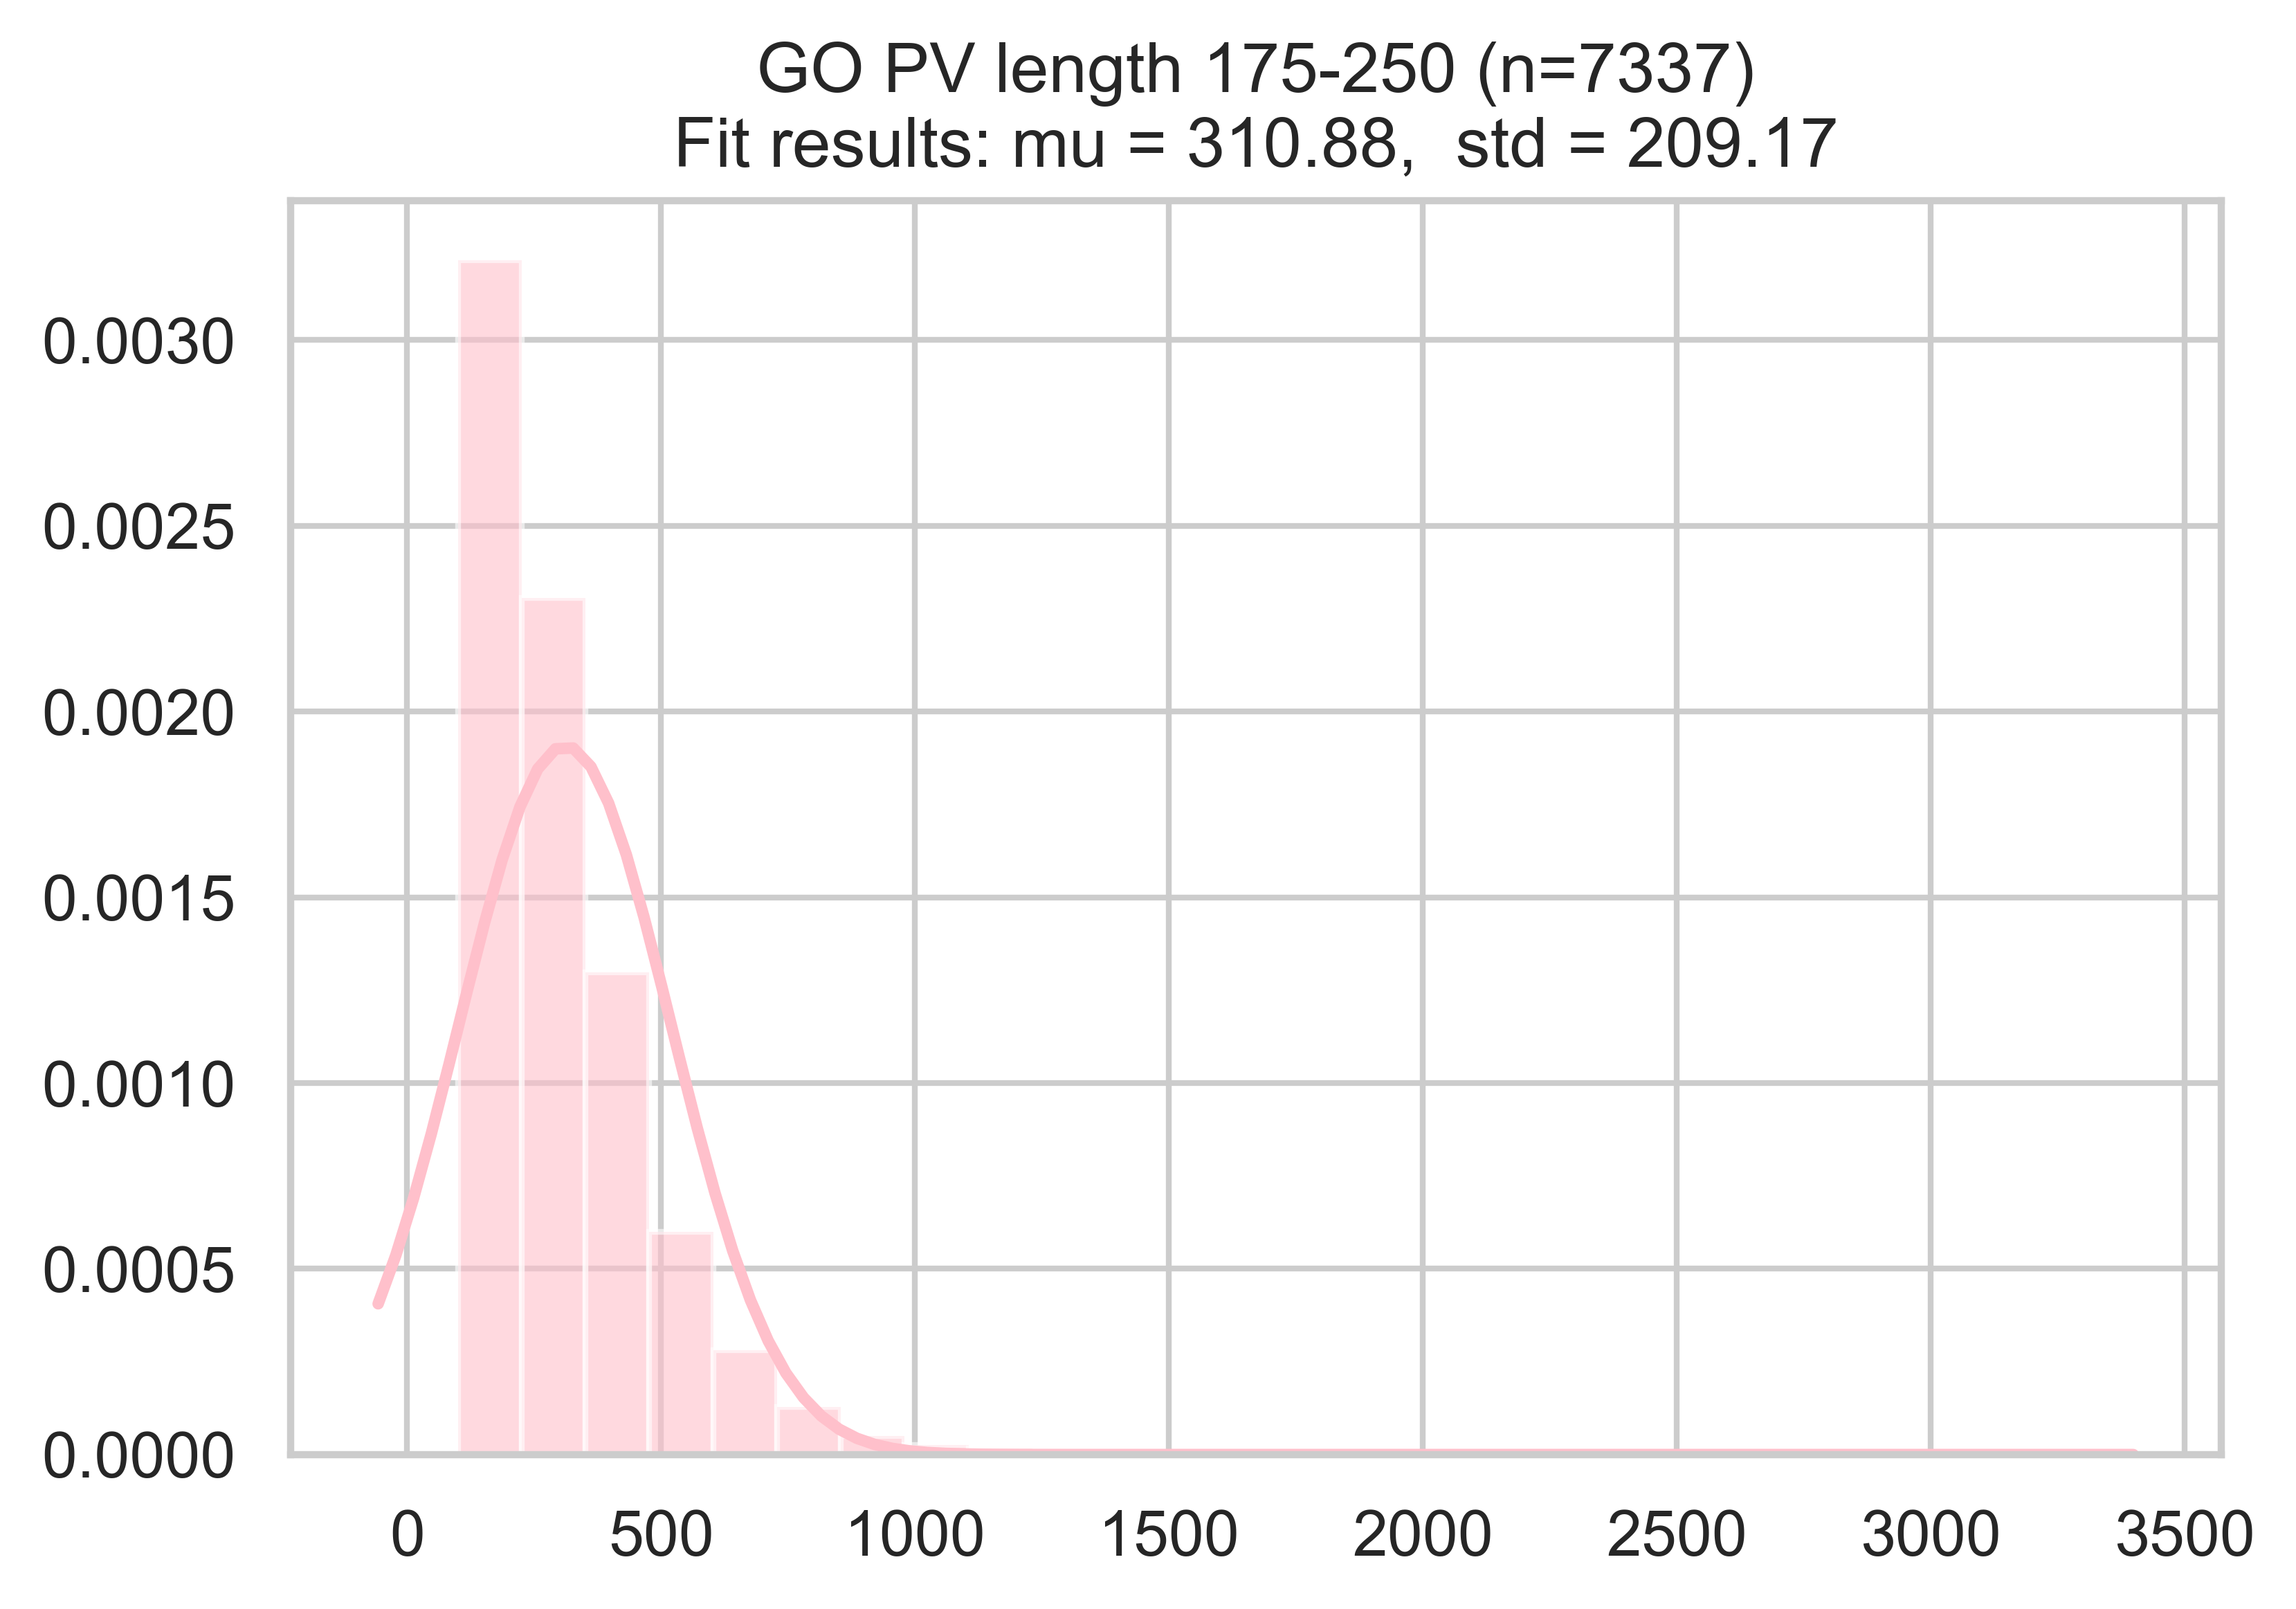

/var/folders/d3/n6gqzx2x2cd87p3mfy_j0q8r0000gp/T/ipykernel_13616/1579727512.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.1, 0.1, 0.1, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color=color)


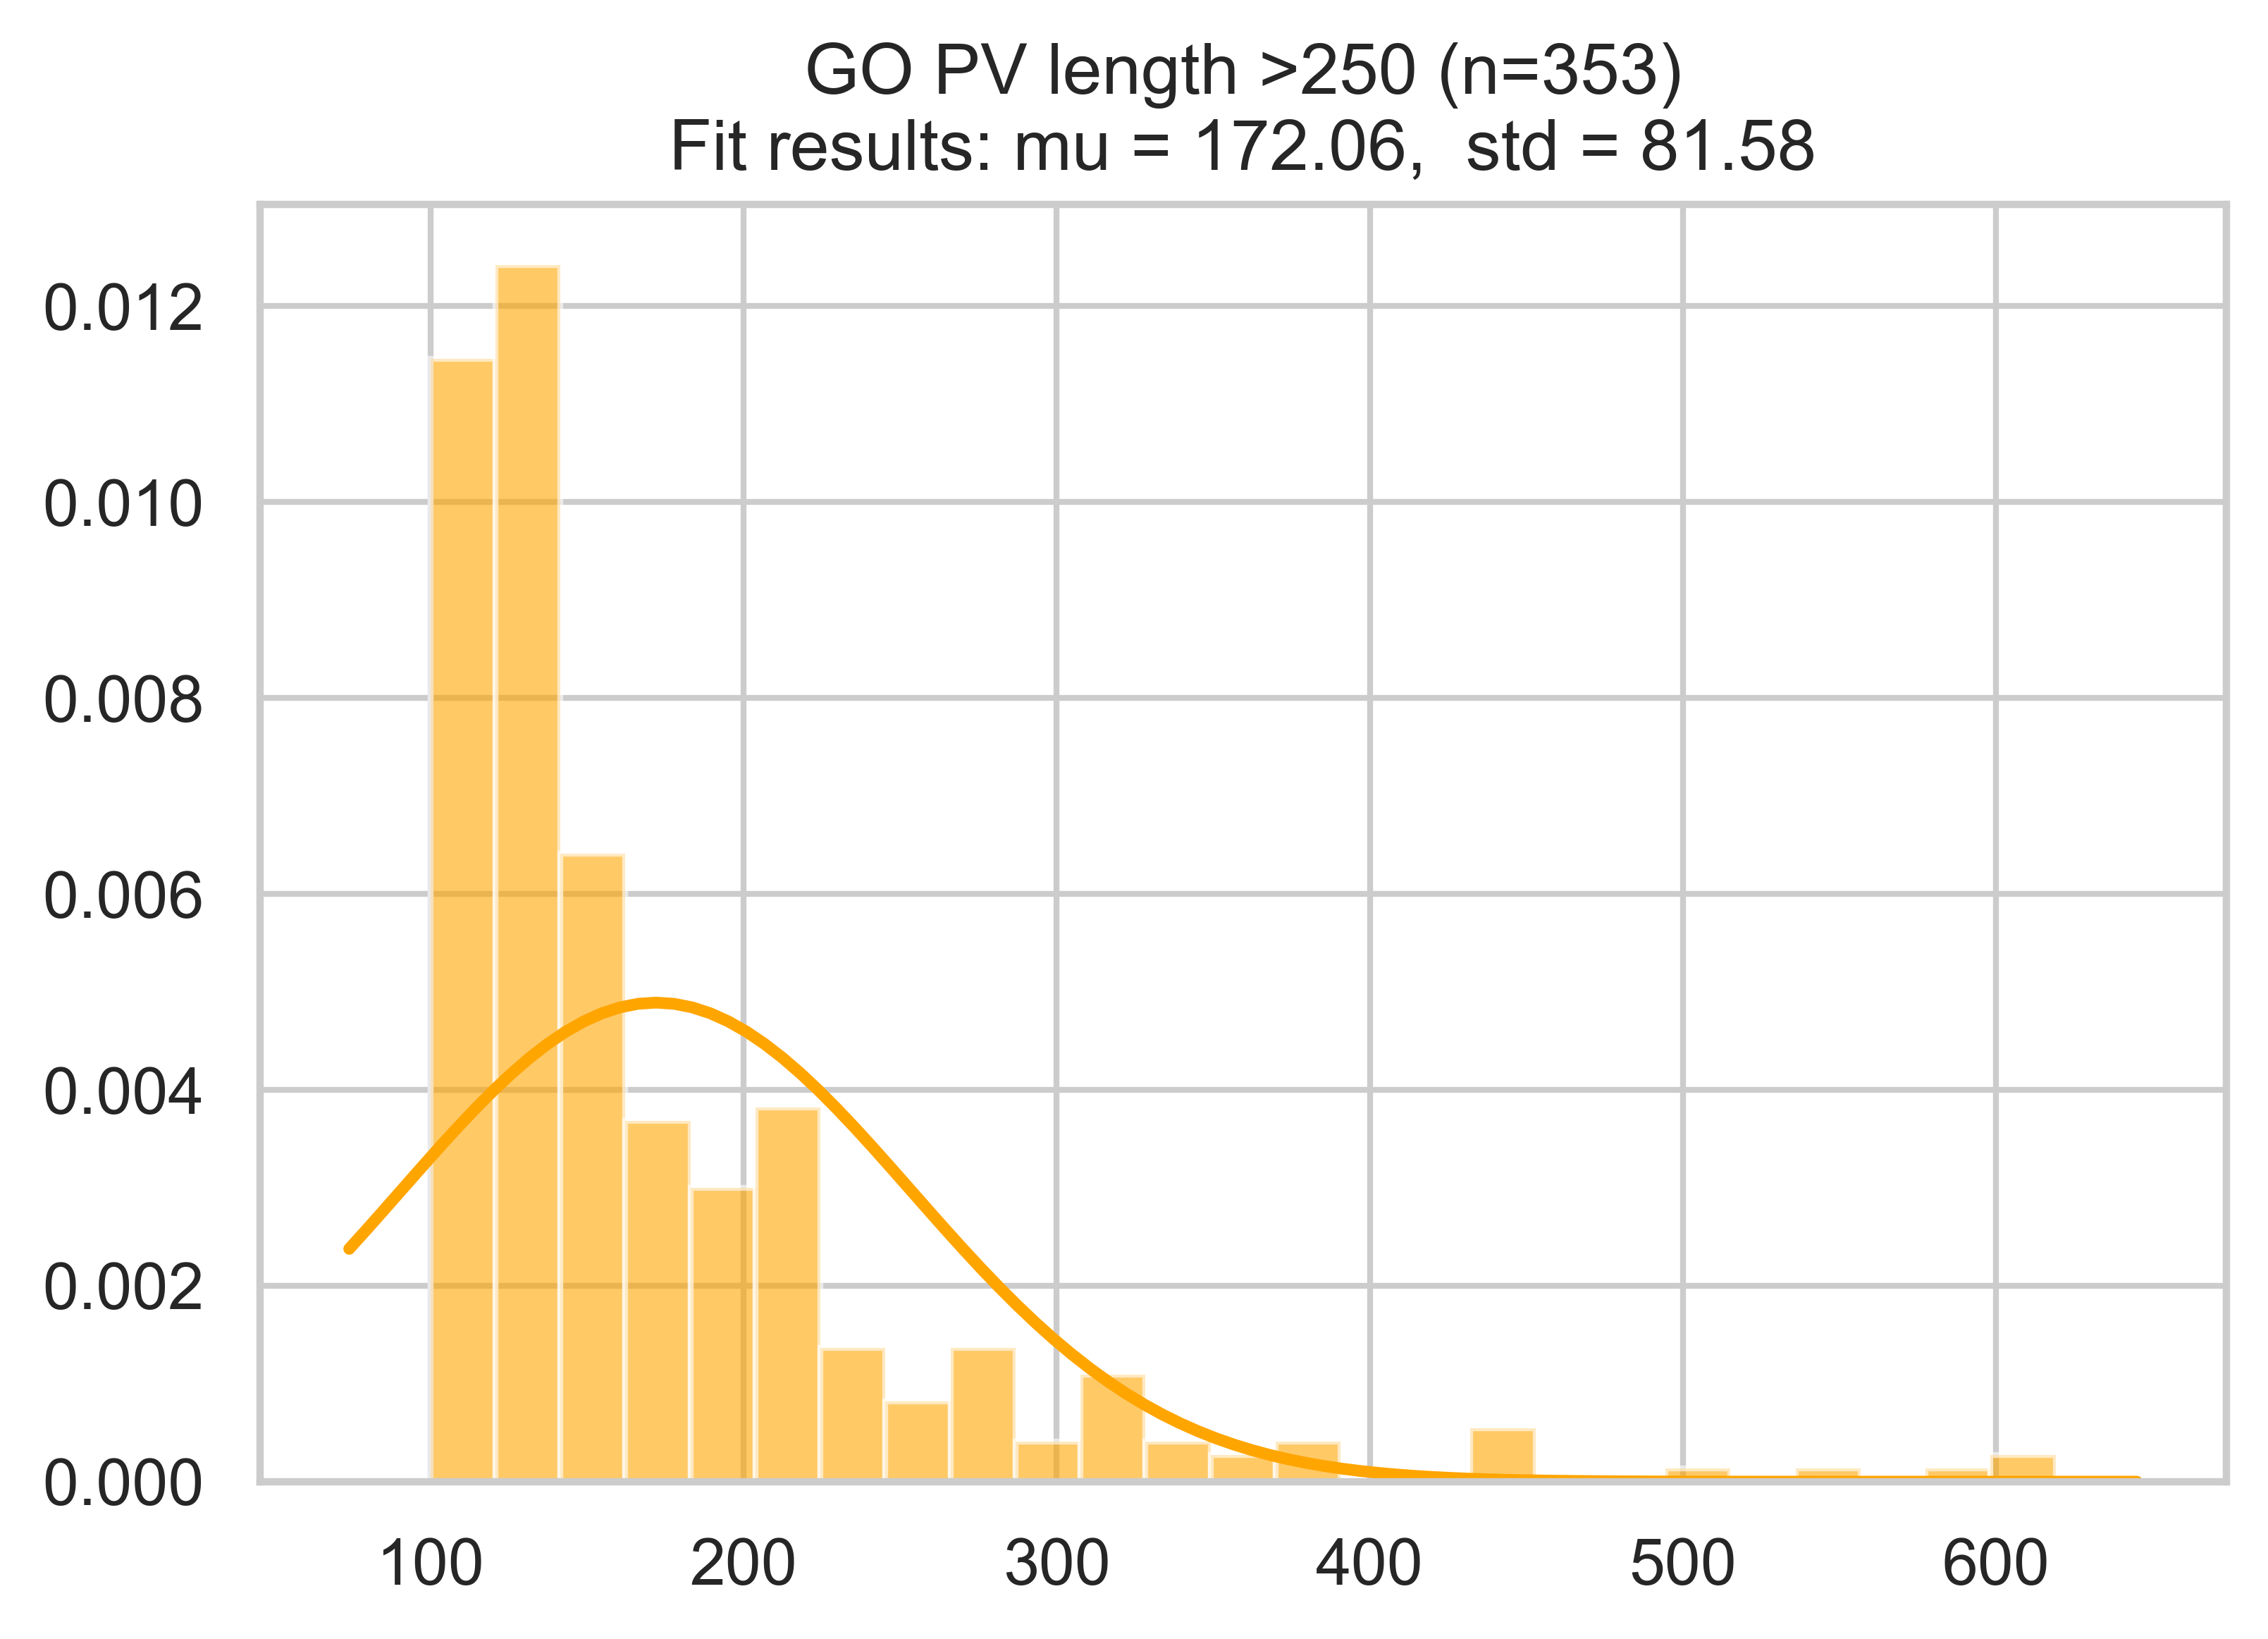

In [82]:
fit_normal_curve(PV_0_50, "GO PV length 0-50", "green")
fit_normal_curve(PV_50_100, "GO PV length 50-100", "blue")
fit_normal_curve(PV_100_150, "GO PV length 100-150", "purple")
fit_normal_curve(PV_150_175, "GO PV length 150-175", "red")
fit_normal_curve(PV_175_250, "GO PV length 175-250", "pink")
fit_normal_curve(PV_ge_250, "GO PV length >250", "orange")

/var/folders/d3/n6gqzx2x2cd87p3mfy_j0q8r0000gp/T/ipykernel_13616/483871911.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.1, 0.1, 0.1, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color=color)


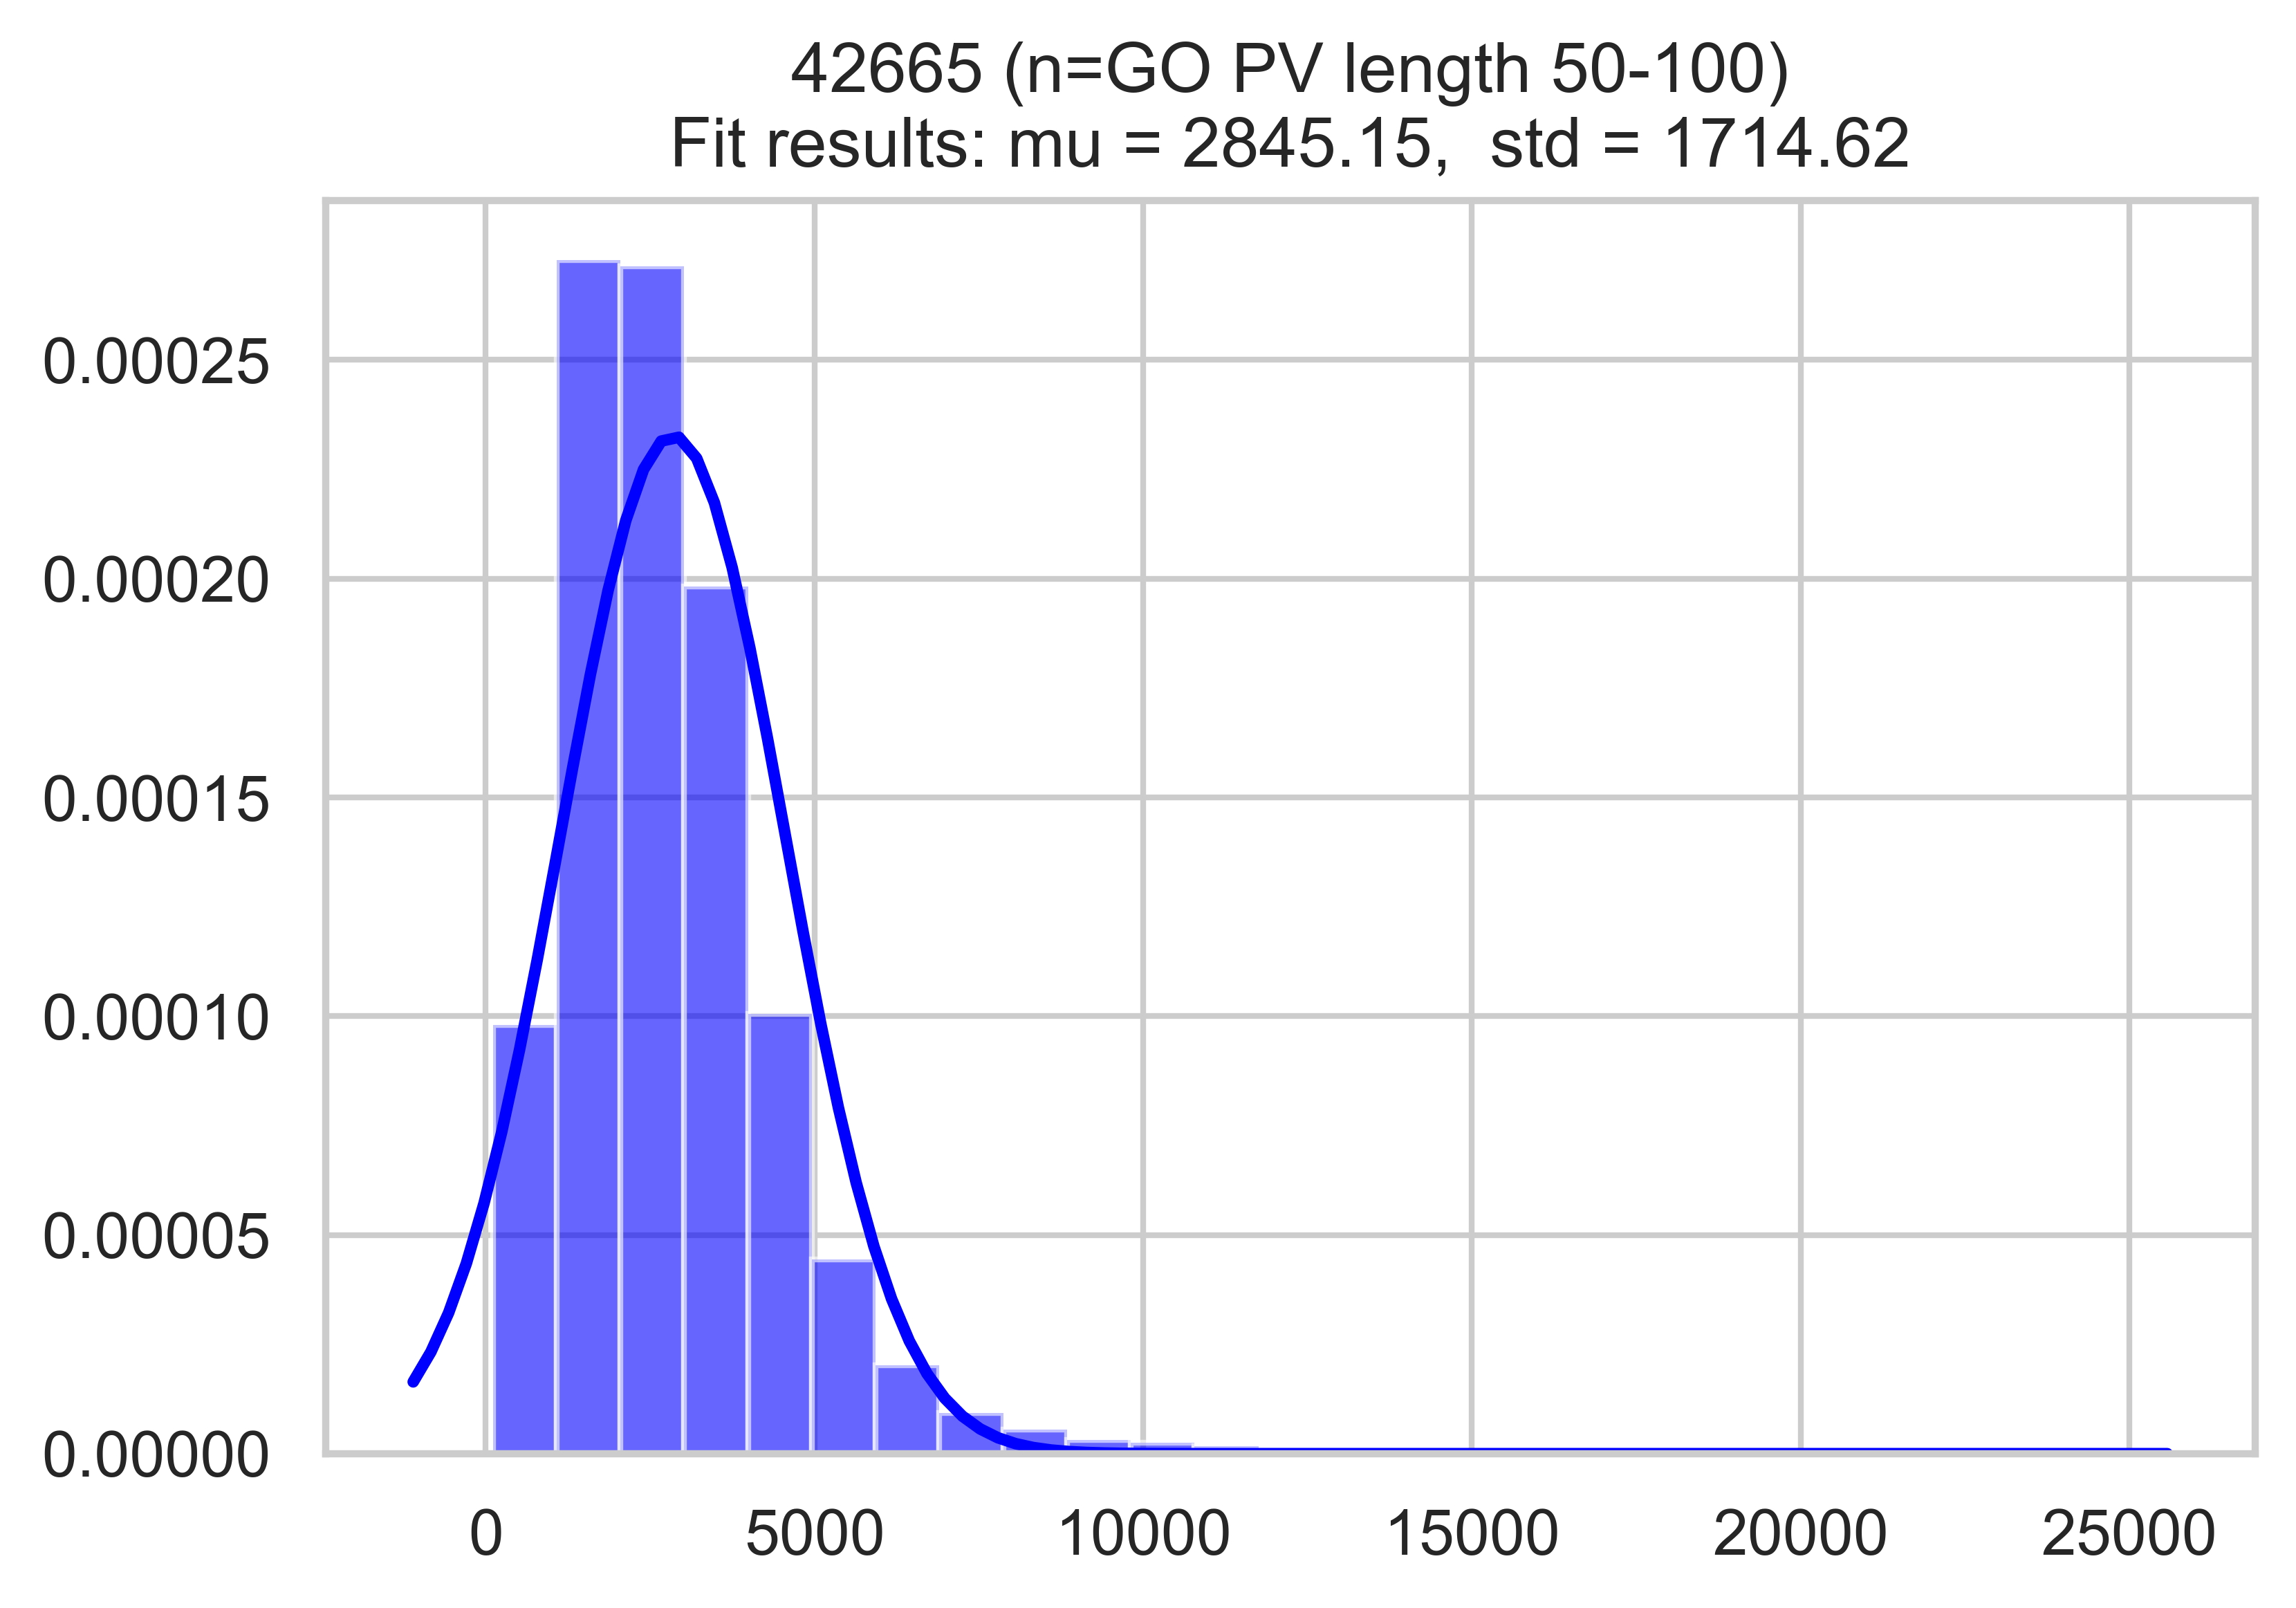

In [75]:
fit_normal_curve(PV_50_100, "GO PV length 50-100", "blue")

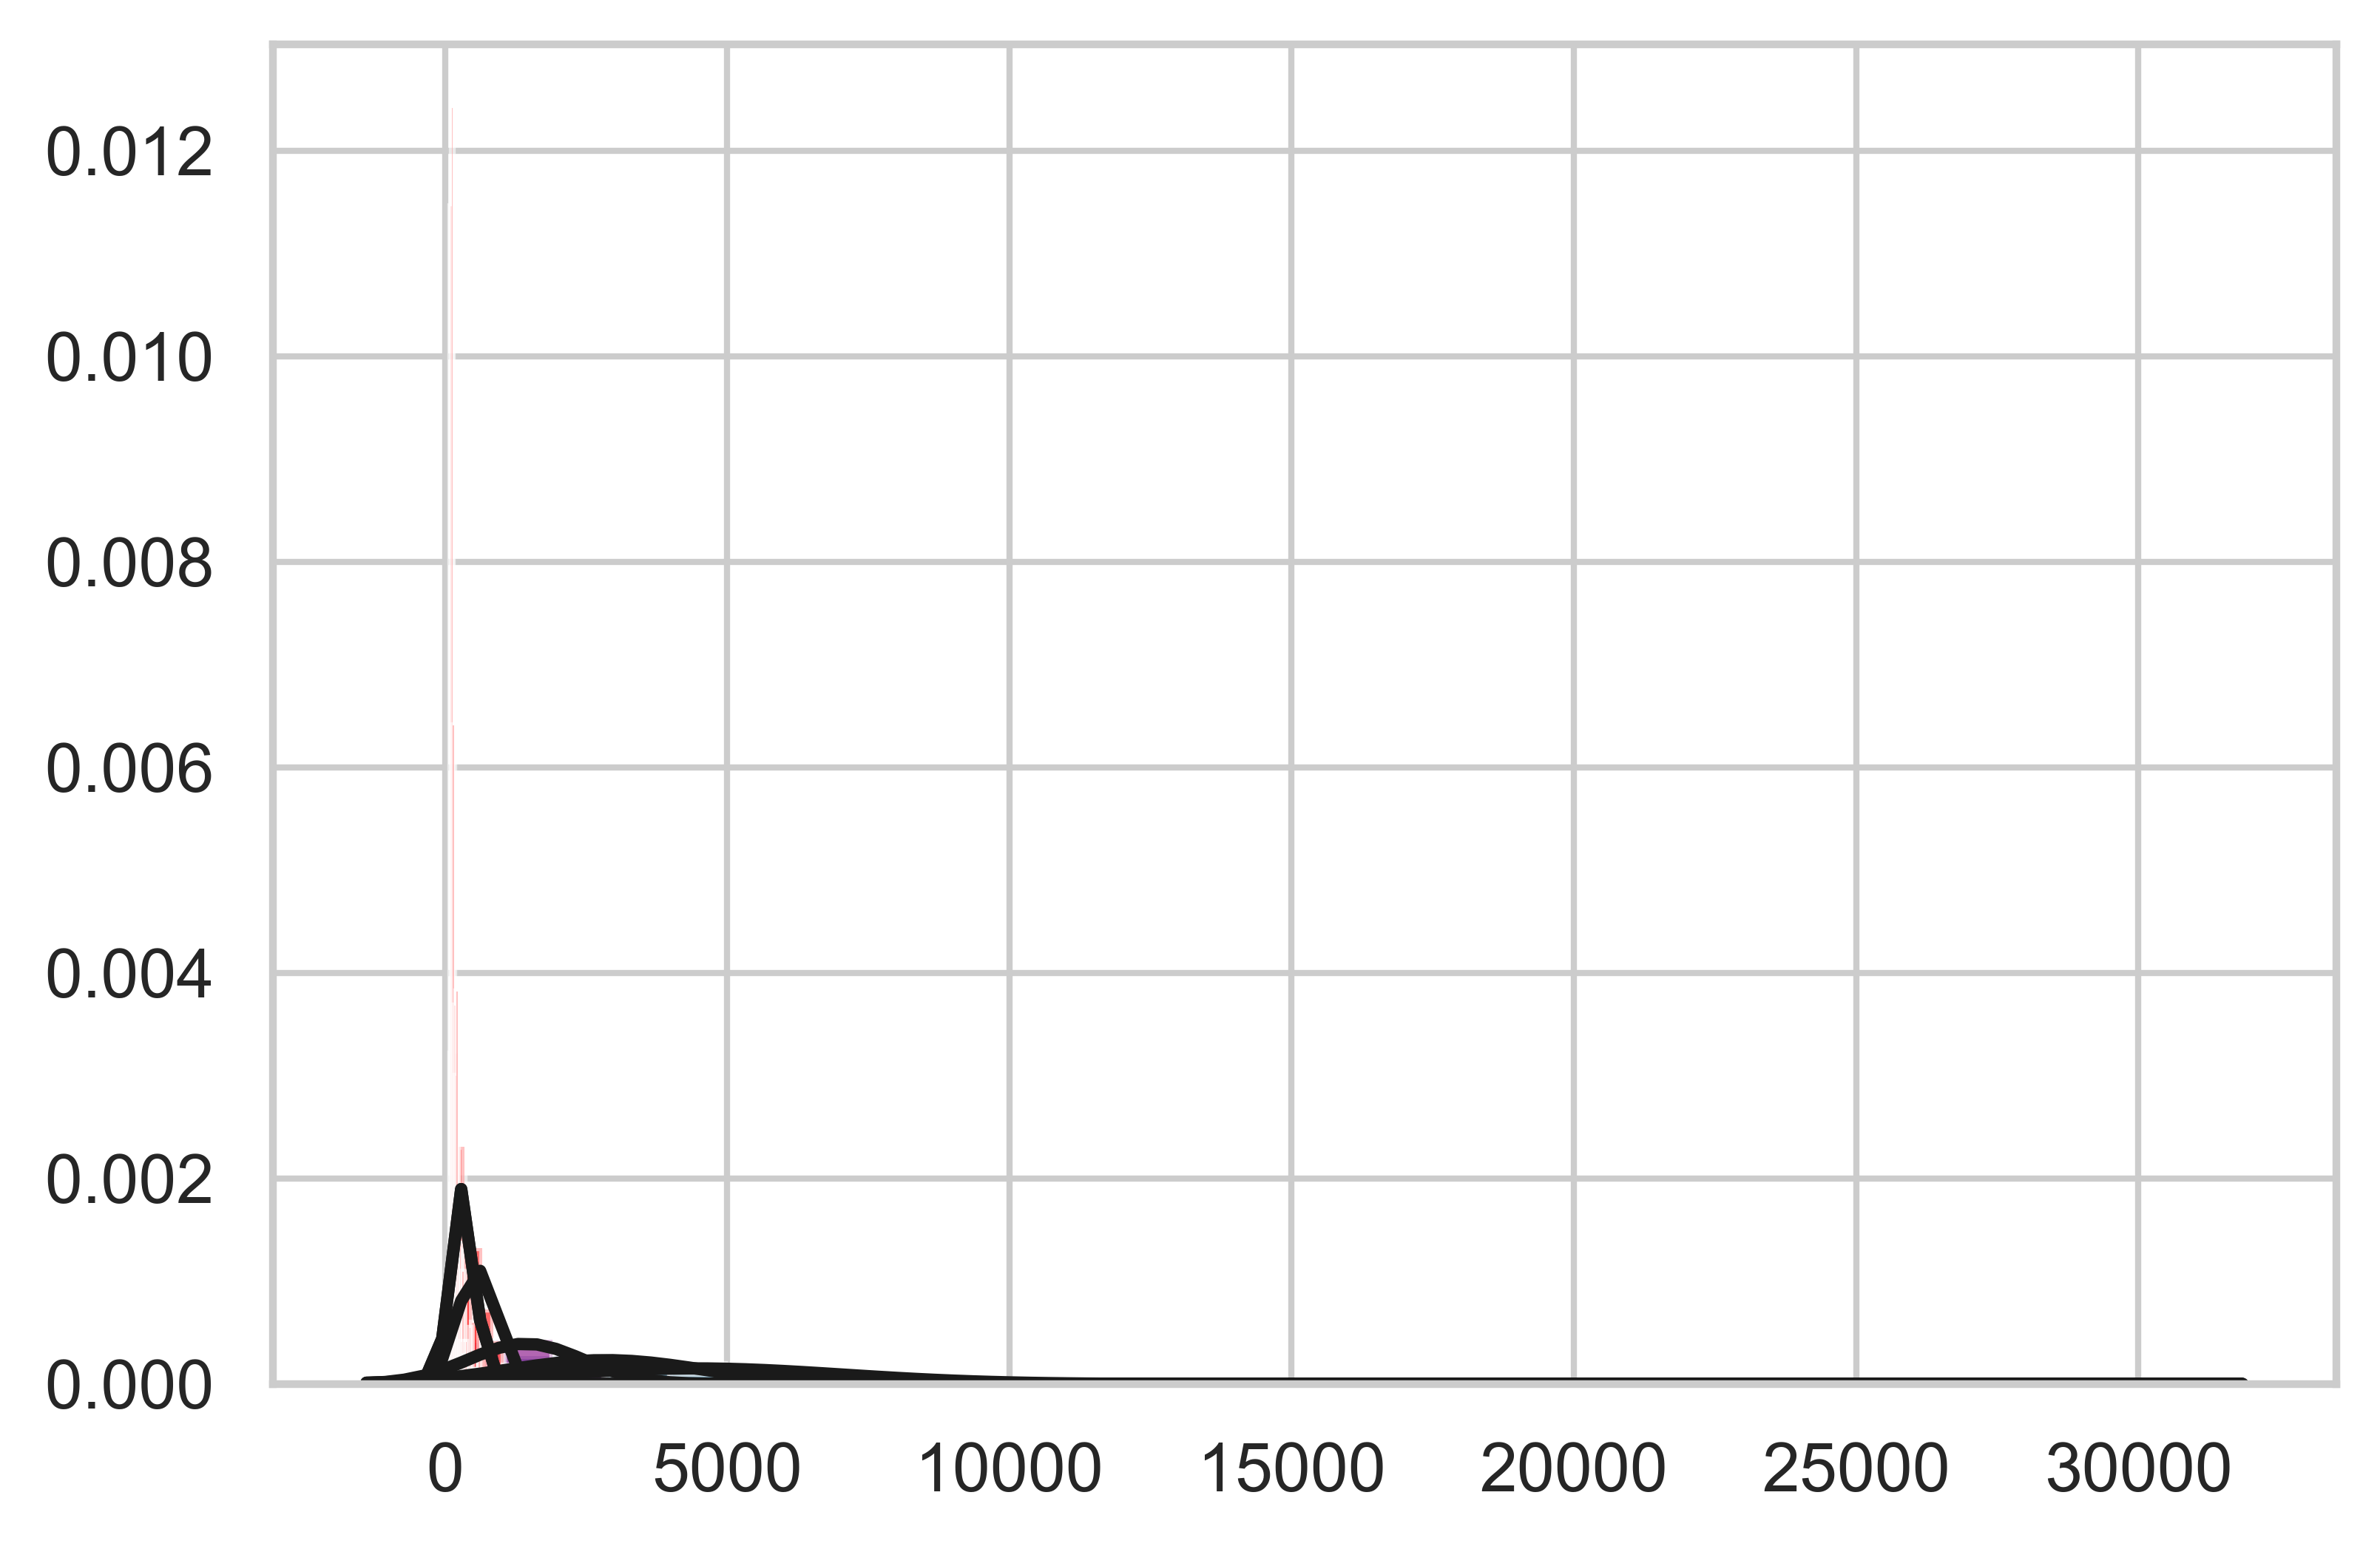

In [83]:
######################################################
# Fit a normal distribution to the data:
mu, std = norm.fit(PV_0_50)

# Plot the histogram.
plt.hist(PV_0_50, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)



######################################################

# Fit a normal distribution to the data:
mu1, std1 = norm.fit(PV_50_100)

# Plot the histogram.
plt.hist(PV_50_100, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
p1 = norm.pdf(x ,mu1, std1)
plt.plot(x, p1, 'k', linewidth=2)



######################################################

# Fit a normal distribution to the data:
mu2, std2 = norm.fit(PV_100_150)

# Plot the histogram.
plt.hist(PV_100_150, bins=25, density=True, alpha=0.6, color='purple')

# Plot the PDF.
p2 = norm.pdf(x ,mu2, std2)
plt.plot(x, p2, 'k', linewidth=2)



######################################################

# Fit a normal distribution to the data:
mu3, std3 = norm.fit(PV_150_175)

# Plot the histogram.
plt.hist(PV_150_175, bins=25, density=True, alpha=0.6, color='red')

# Plot the PDF.
p3 = norm.pdf(x ,mu3, std3)
plt.plot(x, p3, 'k', linewidth=2)



######################################################

# Fit a normal distribution to the data:
mu4, std4 = norm.fit(PV_175_250)

# Plot the histogram.
plt.hist(PV_175_250, bins=25, density=True, alpha=0.6, color='red')

# Plot the PDF.
p4 = norm.pdf(x ,mu4, std4)
plt.plot(x, p4, 'k', linewidth=2)


######################################################
# Fit a normal distribution to the data:
mu5, std5 = norm.fit(PV_ge_250)

# Plot the histogram.
plt.hist(PV_ge_250, bins=25, density=True, alpha=0.6, color='red')

# Plot the PDF.
p5 = norm.pdf(x ,mu4, std4)
plt.plot(x, p5, 'k', linewidth=2)


#title = "%s\nFit results: mu = %.2f,  std = %.2f" % (title, mu, std)
#plt.title(title)

plt.show()

### Compare across multiple distributions
### For all categories of PV_len, 'beta' and 'burr' are top candidates

In [84]:
## Scipy fit beta distribution
from scipy.stats import beta
stats.beta.fit(PV_0_50)

(3.558551539173905, 130.81861142705918, -192.3991041385617, 174109.27009620098)

In [85]:
PV_0_50 = df_GO_PV_allDP[df_GO_PV_allDP['PV_len_cat']=='0-50'].baseline_coverage.values
PV_50_100 =df_GO_PV_allDP[df_GO_PV_allDP['PV_len_cat']=='50-100'].baseline_coverage.values
PV_100_150 = df_GO_PV_allDP[df_GO_PV_allDP['PV_len_cat']=='100-150'].baseline_coverage.values
PV_150_175 = df_GO_PV_allDP[df_GO_PV_allDP['PV_len_cat']=='150-175'].baseline_coverage.values
PV_175_250 = df_GO_PV_allDP[df_GO_PV_allDP['PV_len_cat']=='175-250'].baseline_coverage.values
PV_ge_250 = df_GO_PV_allDP[df_GO_PV_allDP['PV_len_cat']=='>250'].baseline_coverage.values

In [86]:
## Fit multiple distributions
def compare_dists(data):
    f = Fitter(data,
               distributions=['gamma',
                              'uniform'
                              'lognorm',
                              'nbinom',
                              "beta",
                              "burr",
                              "norm"])
    print(f.fit())
    print(f.summary())

In [87]:
get_distributions()

['alpha',
 'anglit',
 'arcsine',
 'argus',
 'beta',
 'betaprime',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'cosine',
 'crystalball',
 'dgamma',
 'dweibull',
 'erlang',
 'expon',
 'exponnorm',
 'exponpow',
 'exponweib',
 'f',
 'fatiguelife',
 'fisk',
 'foldcauchy',
 'foldnorm',
 'gamma',
 'gausshyper',
 'genexpon',
 'genextreme',
 'gengamma',
 'genhalflogistic',
 'genhyperbolic',
 'geninvgauss',
 'genlogistic',
 'gennorm',
 'genpareto',
 'gilbrat',
 'gompertz',
 'gumbel_l',
 'gumbel_r',
 'halfcauchy',
 'halfgennorm',
 'halflogistic',
 'halfnorm',
 'hypsecant',
 'invgamma',
 'invgauss',
 'invweibull',
 'johnsonsb',
 'johnsonsu',
 'kappa3',
 'kappa4',
 'ksone',
 'kstwo',
 'kstwobign',
 'laplace',
 'laplace_asymmetric',
 'levy',
 'levy_l',
 'levy_stable',
 'loggamma',
 'logistic',
 'loglaplace',
 'lognorm',
 'loguniform',
 'lomax',
 'maxwell',
 'mielke',
 'moyal',
 'nakagami',
 'ncf',
 'nct',
 'ncx2',
 'norm',
 'norminvgauss',
 'pareto',
 'pearson3',
 'powerlaw',
 'pow

Fitting 6 distributions: 100%|████████████████████| 6/6 [00:01<00:00,  3.26it/s]


None
                sumsquare_error          aic           bic  kl_div  \
burr               2.000530e-09  2610.166534 -1.294433e+06     inf   
beta               7.653647e-09  3024.054184 -1.237820e+06     inf   
gamma              8.596435e-09  2936.341819 -1.232929e+06     inf   
norm               3.745045e-08  4558.625007 -1.170845e+06     inf   
uniformlognorm              inf          inf           inf     inf   

                ks_statistic     ks_pvalue  
burr                0.009931  4.824954e-04  
beta                0.037290  2.056506e-51  
gamma               0.034480  5.109869e-44  
norm                0.097637  0.000000e+00  
uniformlognorm           NaN           NaN  


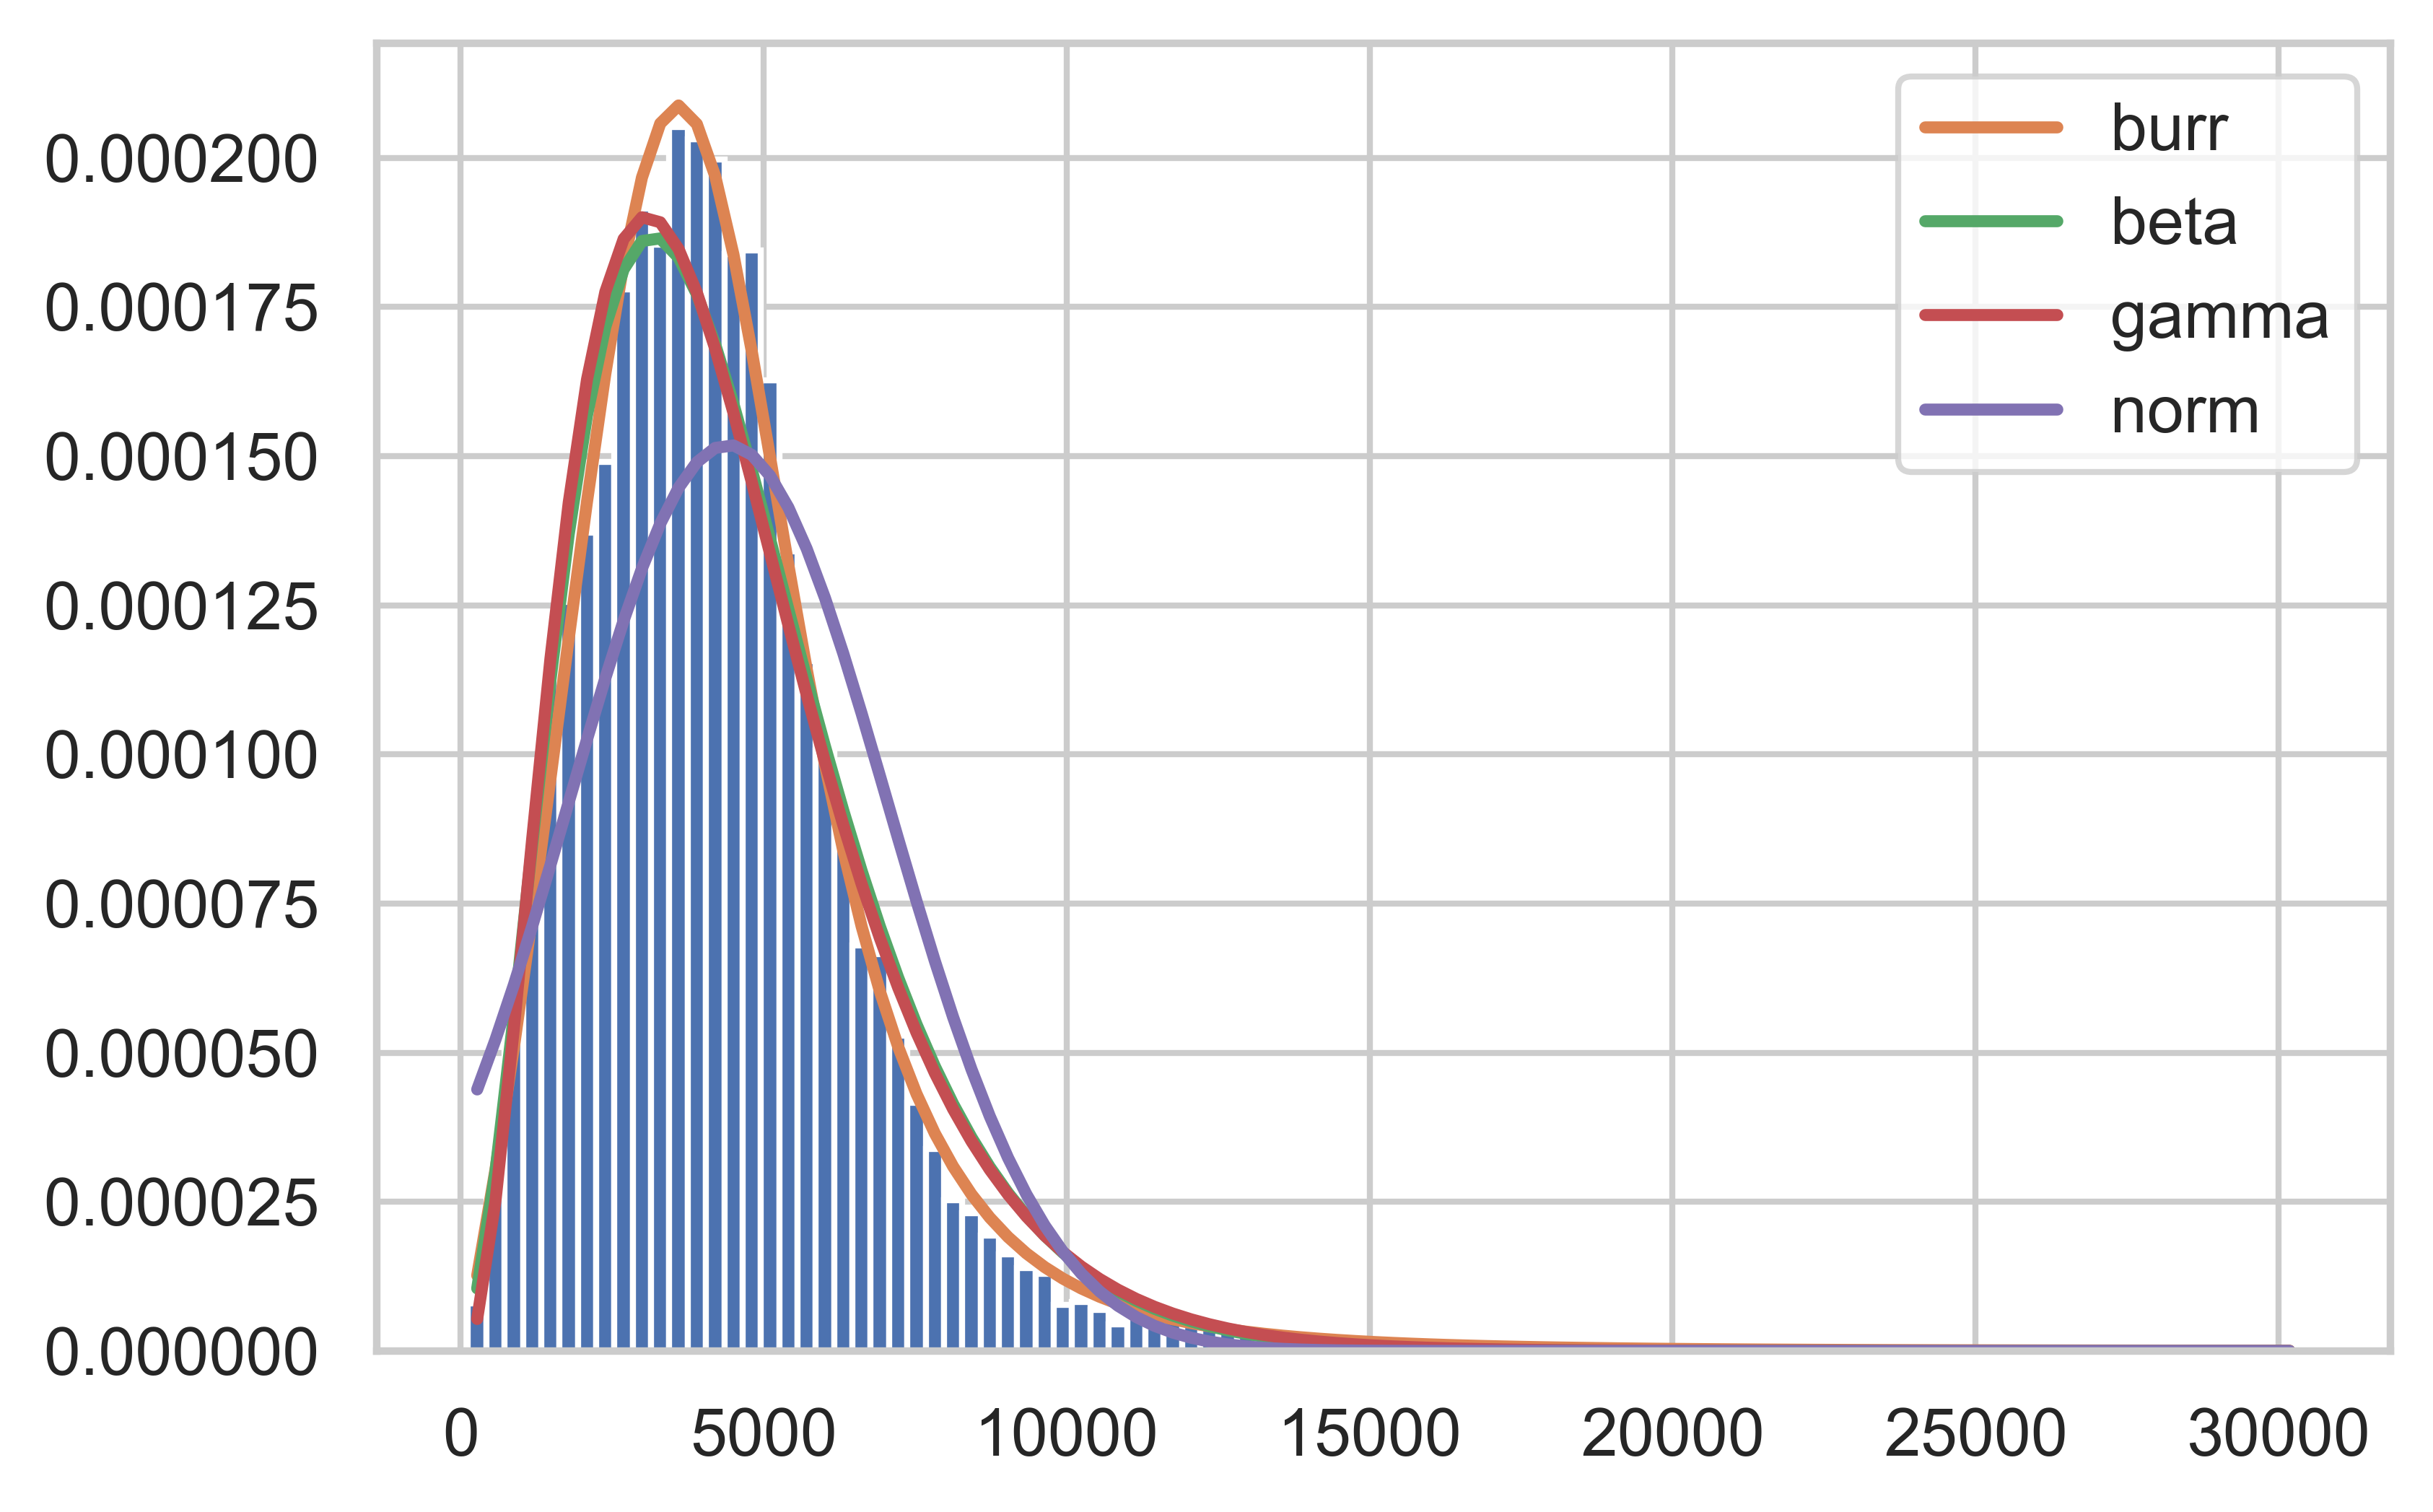

In [88]:
compare_dists(PV_0_50)

Fitting 6 distributions: 100%|████████████████████| 6/6 [00:01<00:00,  3.33it/s]


None
                sumsquare_error          aic           bic  kl_div  \
beta               7.943990e-09  3218.230922 -1.250553e+06     inf   
gamma              4.718511e-08  5603.185005 -1.174549e+06     inf   
norm               7.233409e-08  6345.032584 -1.156333e+06     inf   
burr               1.188548e-07  2481.411341 -1.135124e+06     inf   
uniformlognorm              inf          inf           inf     inf   

                ks_statistic      ks_pvalue  
beta                0.023014   4.626236e-20  
gamma               0.065514  1.182686e-159  
norm                0.084420  5.686346e-265  
burr                0.125784   0.000000e+00  
uniformlognorm           NaN            NaN  


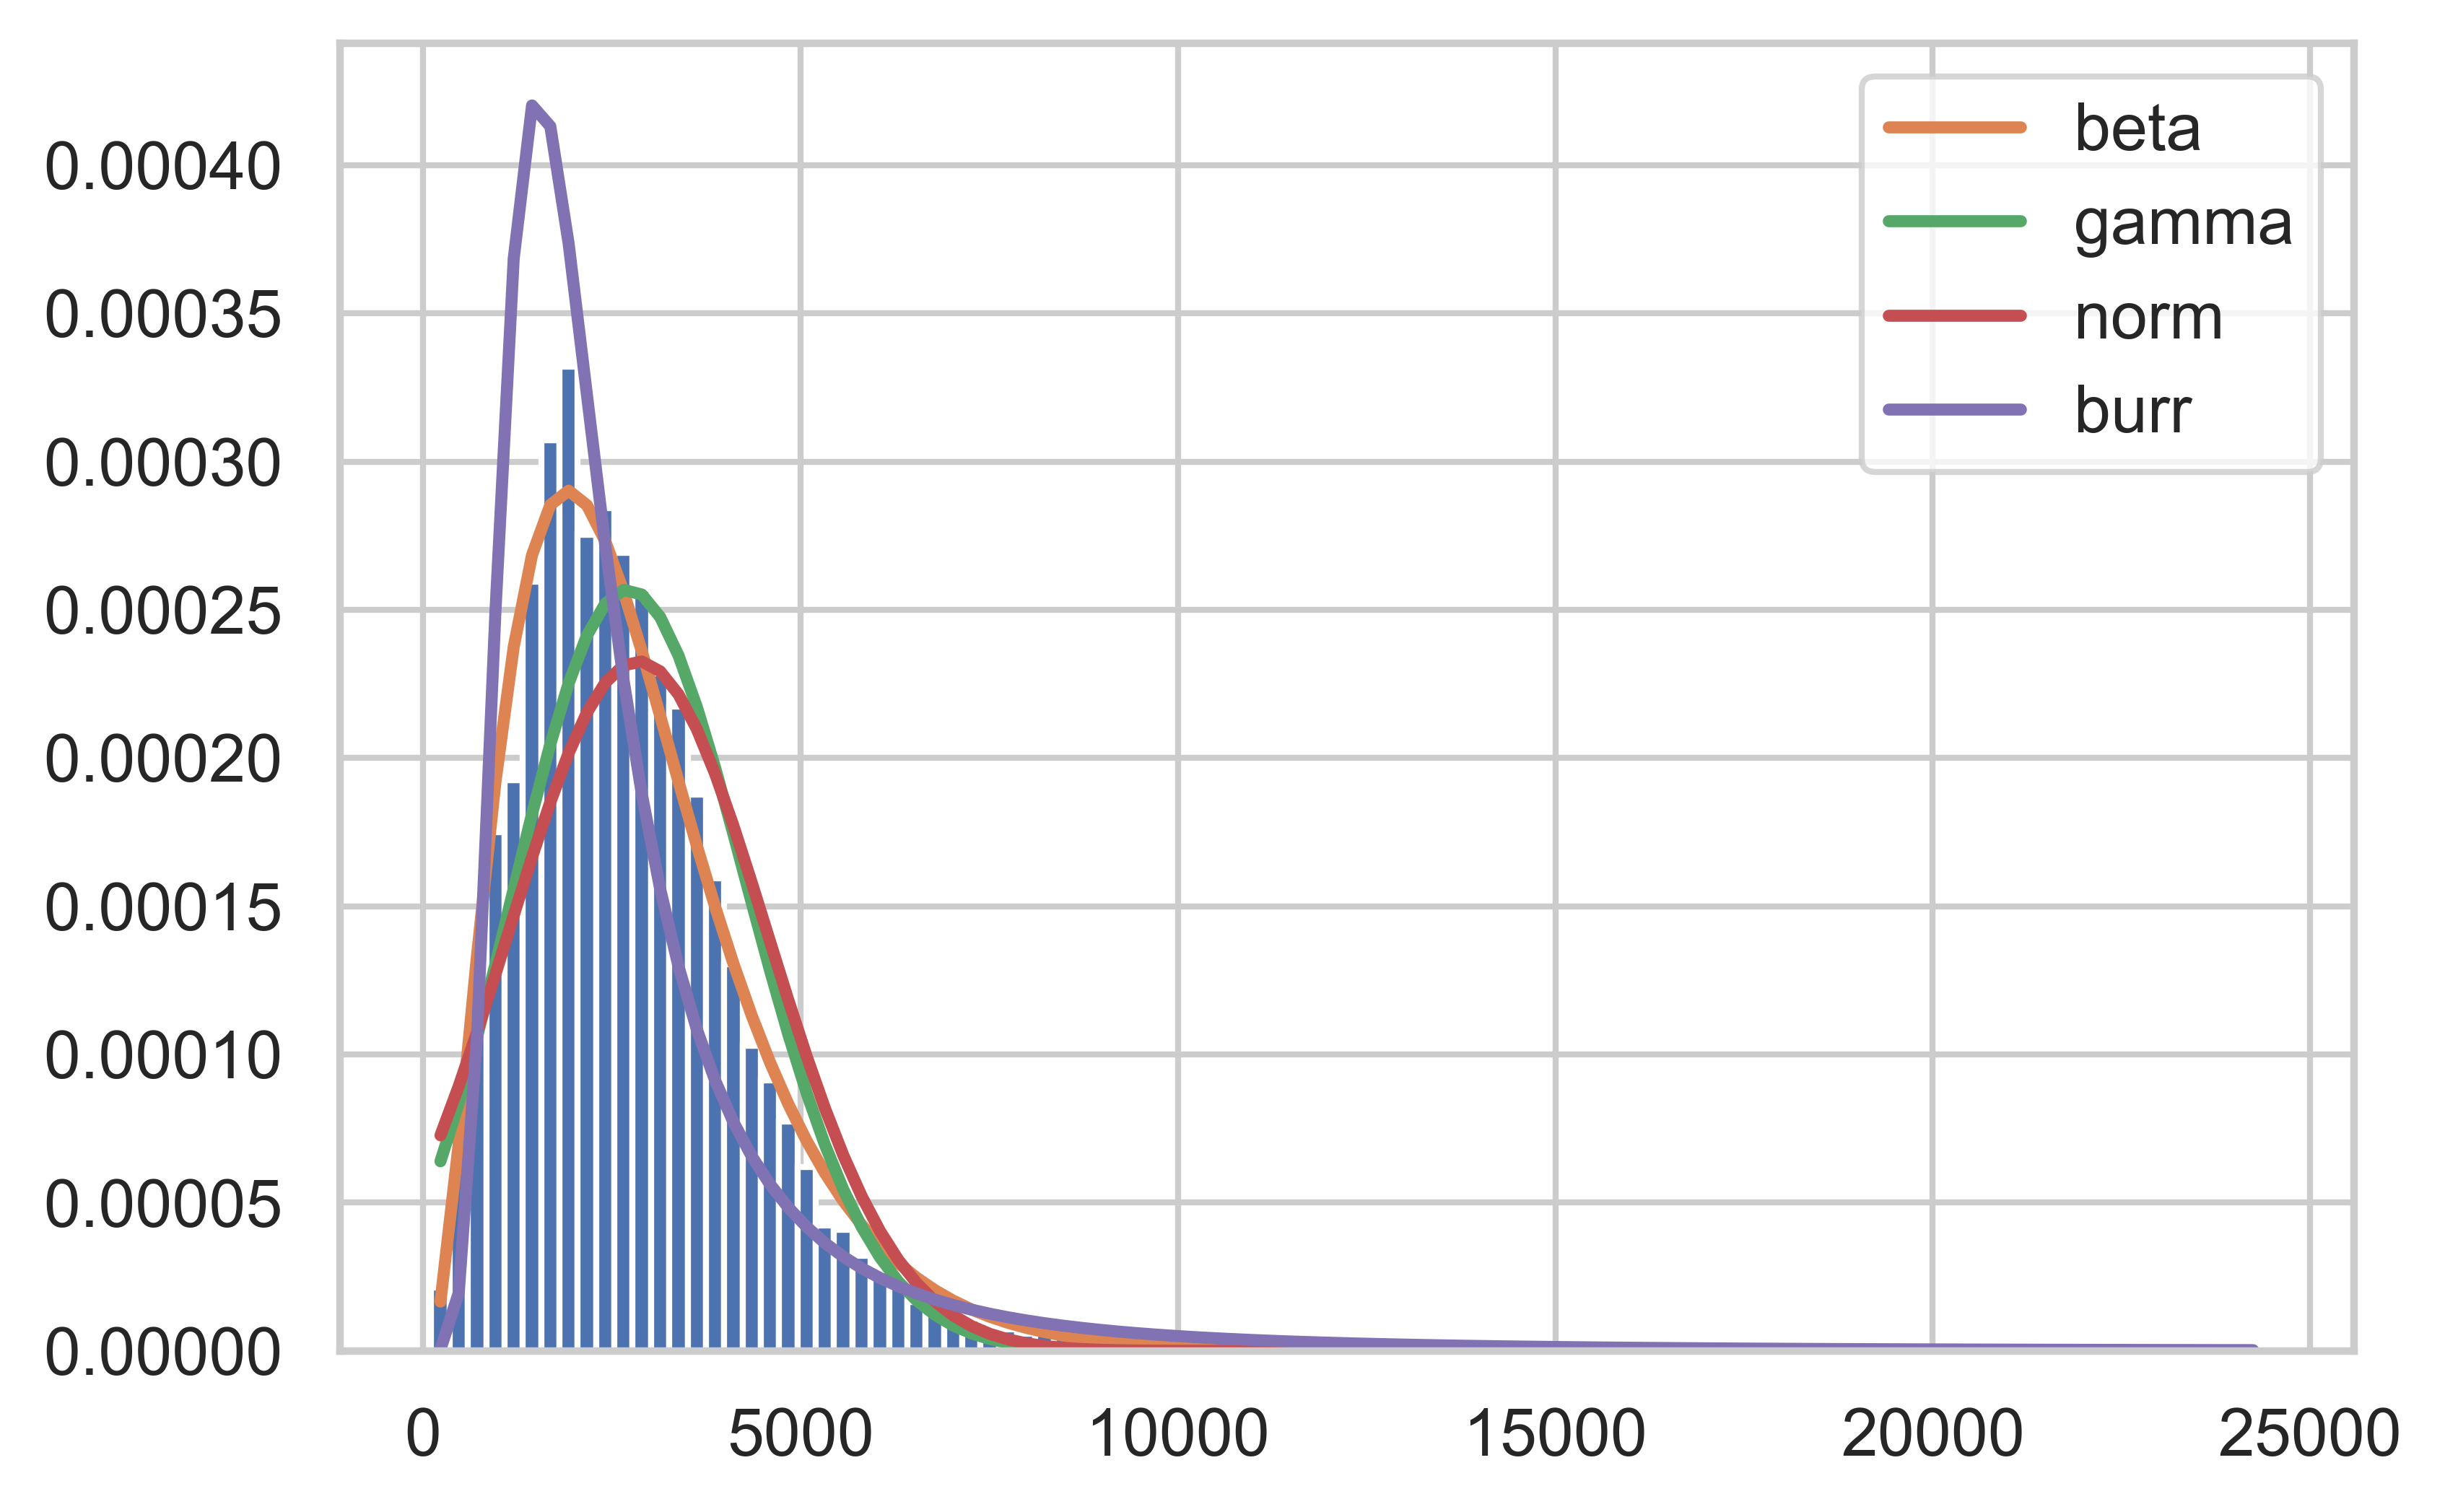

In [89]:
compare_dists(PV_50_100)

Fitting 6 distributions: 100%|████████████████████| 6/6 [00:01<00:00,  4.73it/s]


None
                sumsquare_error           aic           bic  kl_div  \
burr               7.008325e-09  2.848180e+03 -9.174357e+05     inf   
beta               9.376214e-09  4.253019e+03 -9.082691e+05     inf   
norm               2.111684e-07  1.538650e+04 -8.102086e+05     inf   
gamma              4.267484e-07  5.399318e+03 -7.880424e+05     inf   
uniformlognorm              inf           inf           inf     inf   

                ks_statistic     ks_pvalue  
burr                0.012883  5.721951e-05  
beta                0.022020  1.071514e-13  
norm                0.109636  0.000000e+00  
gamma               0.220134  0.000000e+00  
uniformlognorm           NaN           NaN  


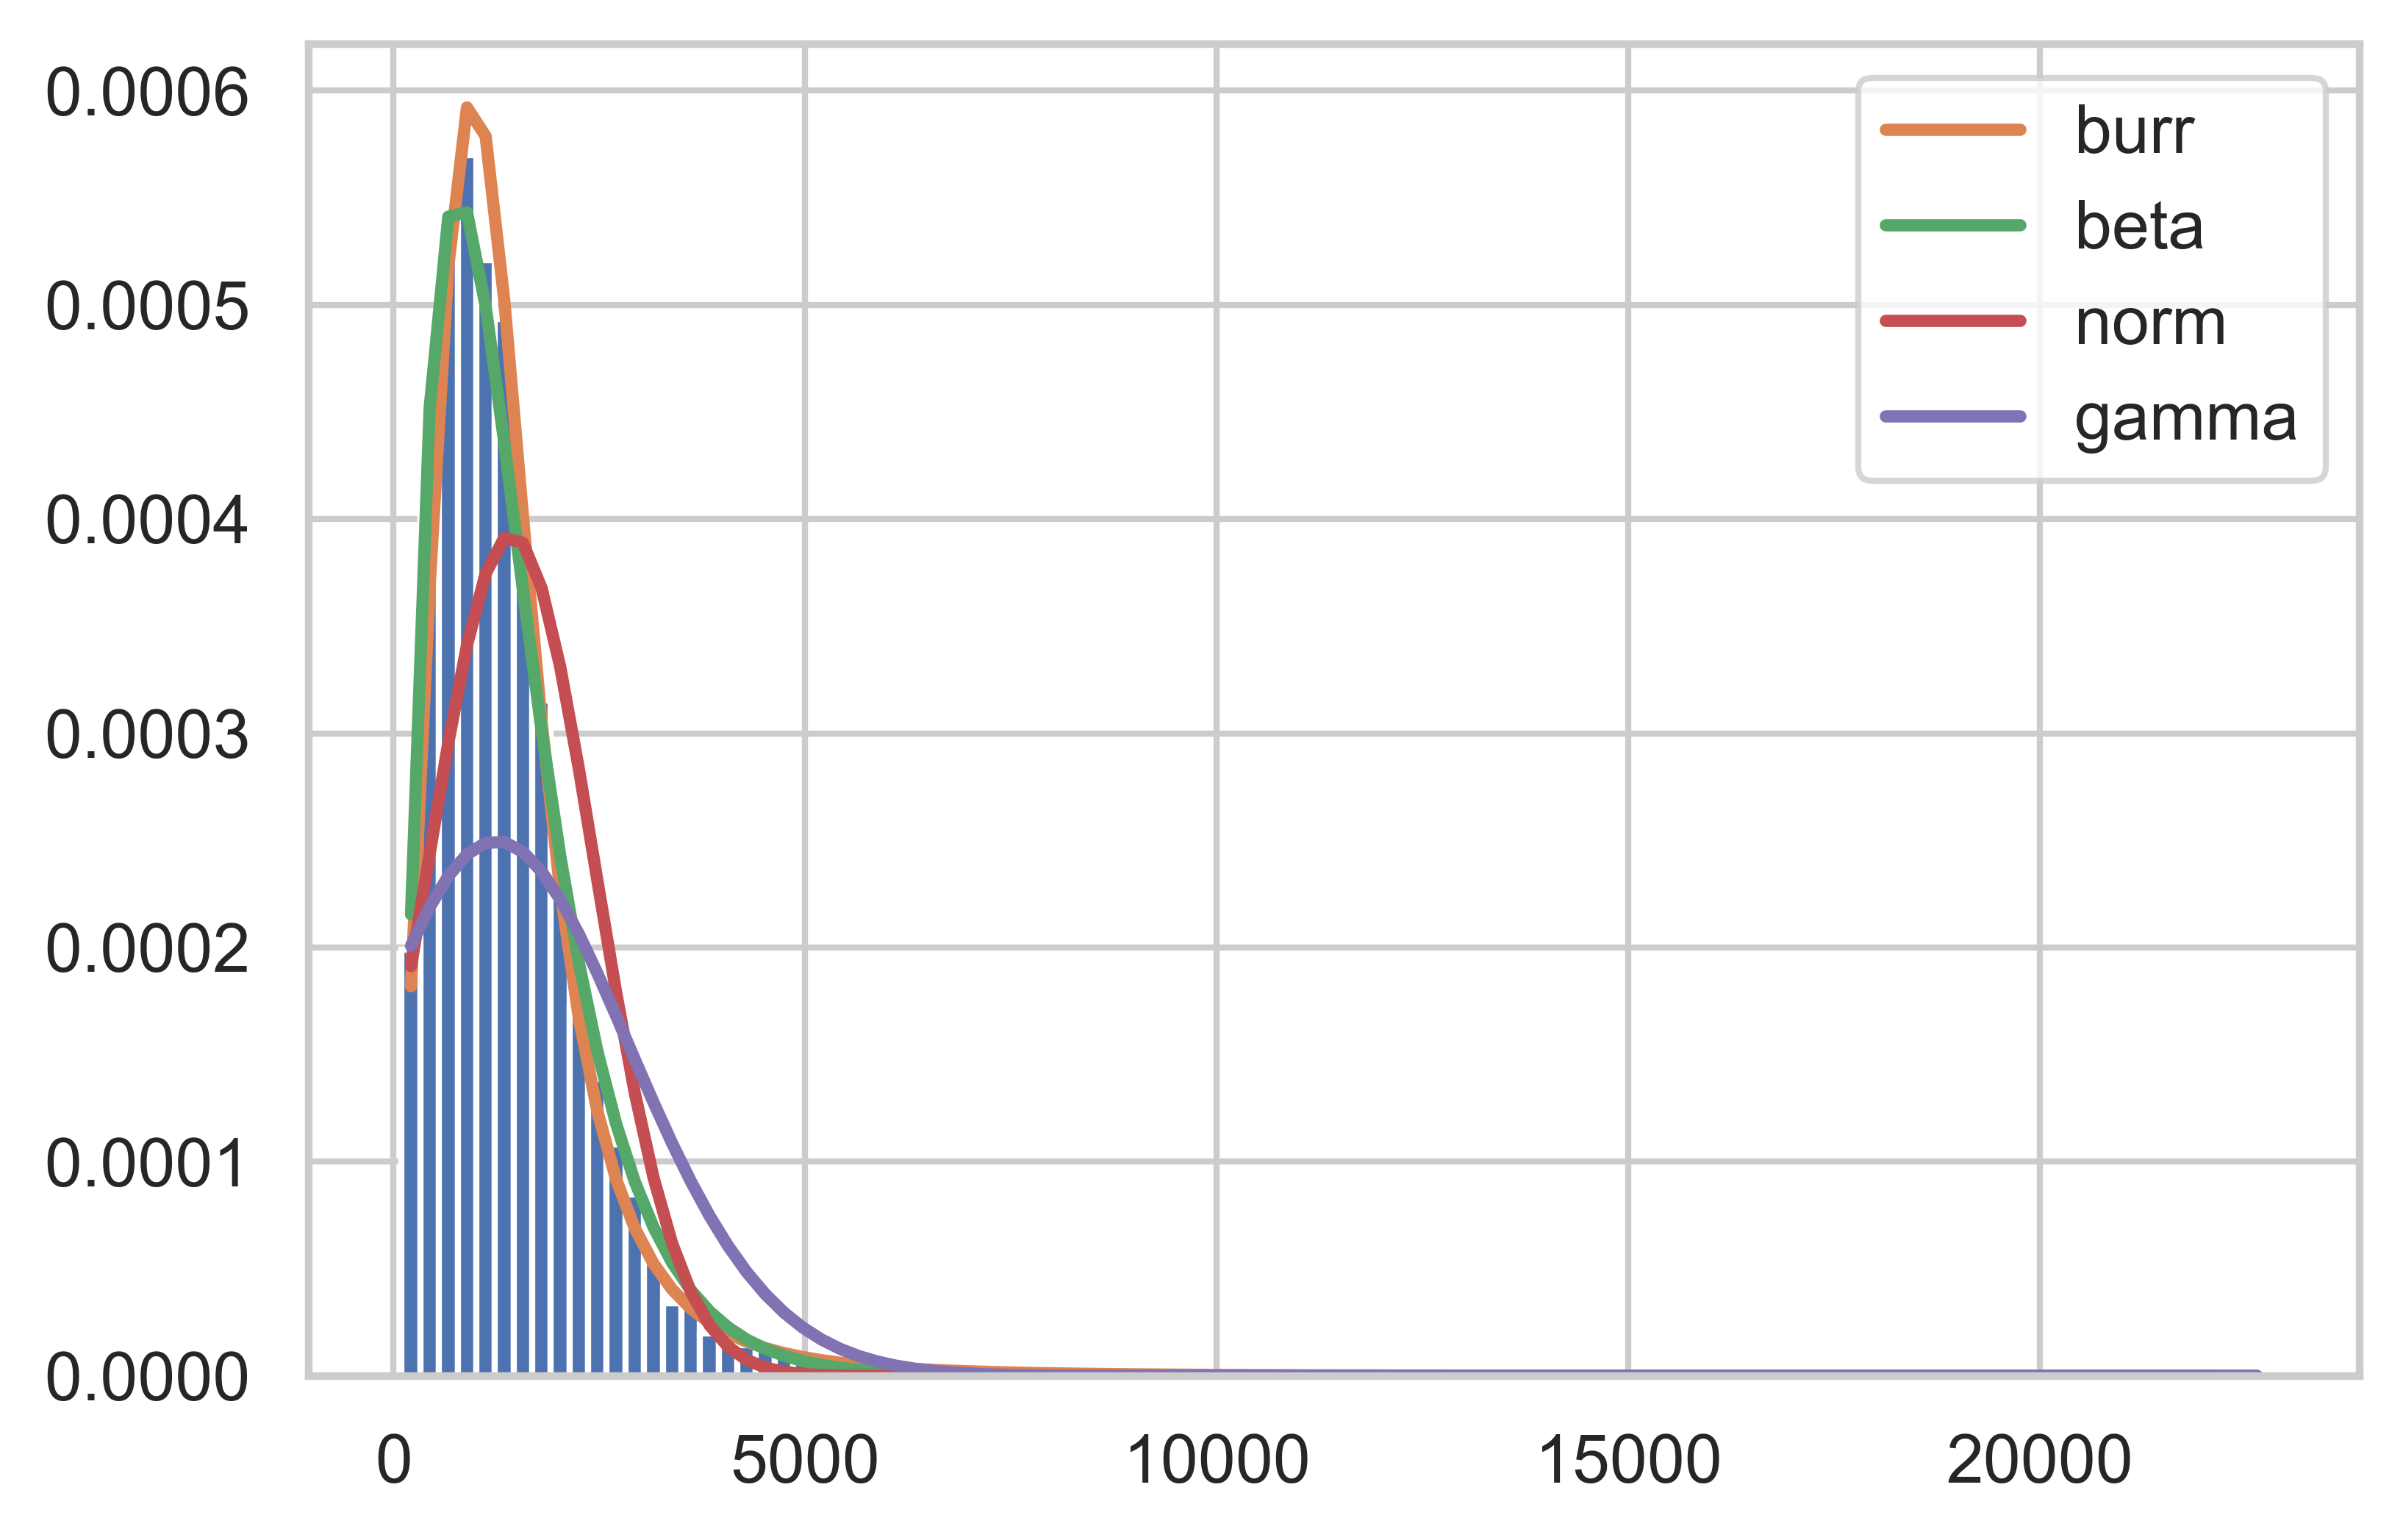

In [90]:
compare_dists(PV_100_150)

Fitting 6 distributions: 100%|████████████████████| 6/6 [00:00<00:00, 11.93it/s]


None
                sumsquare_error           aic           bic  kl_div  \
burr               2.715664e-07  2.258611e+03 -2.270170e+05     inf   
beta               3.921474e-07  2.784848e+03 -2.235786e+05     inf   
norm               2.292054e-06  5.550544e+03 -2.070747e+05     inf   
gamma              2.230755e-05  1.344494e+05 -1.857717e+05     inf   
uniformlognorm              inf           inf           inf     inf   

                ks_statistic     ks_pvalue  
burr                0.016614  1.128574e-02  
beta                0.024969  1.682092e-05  
norm                0.105693  1.757214e-91  
gamma               0.995883  0.000000e+00  
uniformlognorm           NaN           NaN  


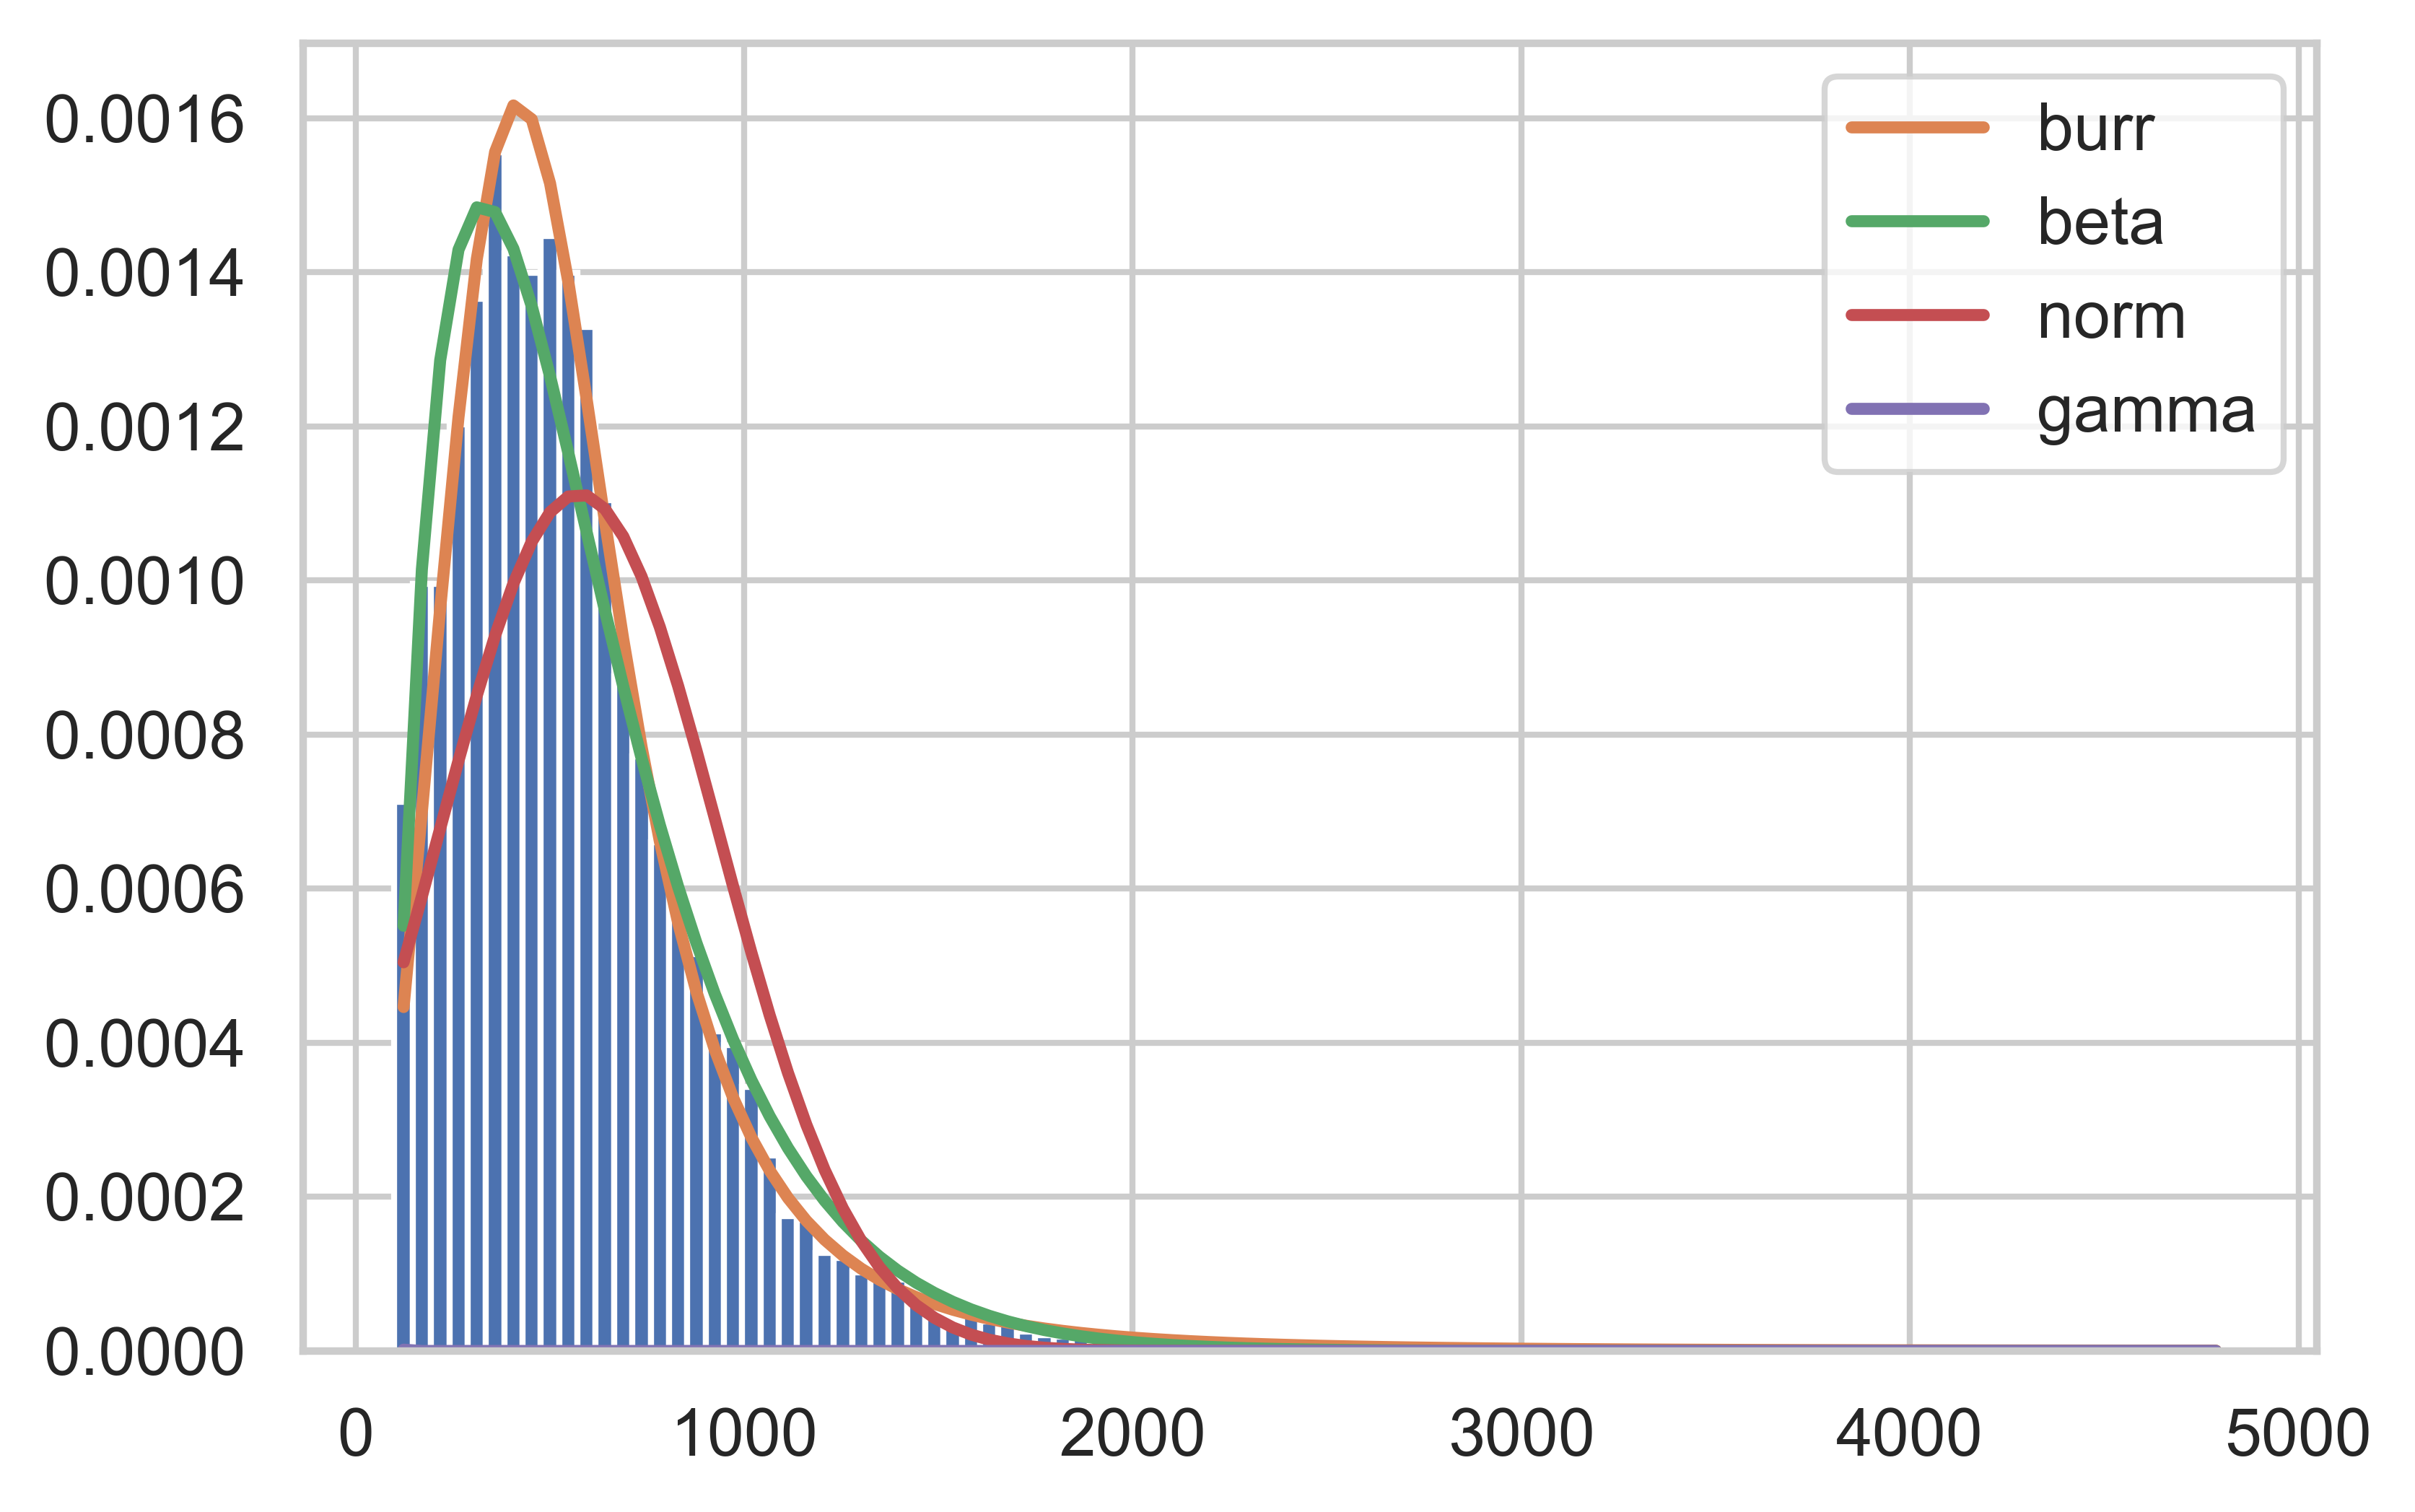

In [91]:
compare_dists(PV_150_175)

Fitting 6 distributions: 100%|████████████████████| 6/6 [00:00<00:00, 12.34it/s]


None
                sumsquare_error           aic           bic  kl_div  \
beta               4.764367e-07  2.726857e+03 -1.720729e+05     inf   
burr               3.286412e-06  2.154108e+03 -1.579036e+05     inf   
norm               1.554745e-05  7.364756e+03 -1.465190e+05     inf   
gamma              7.193476e-05  6.981562e+04 -1.352708e+05     inf   
uniformlognorm              inf           inf           inf     inf   

                ks_statistic      ks_pvalue  
beta                0.019718   6.567428e-03  
burr                0.042872   3.722747e-12  
norm                0.156685  8.724742e-158  
gamma               0.984458   0.000000e+00  
uniformlognorm           NaN            NaN  


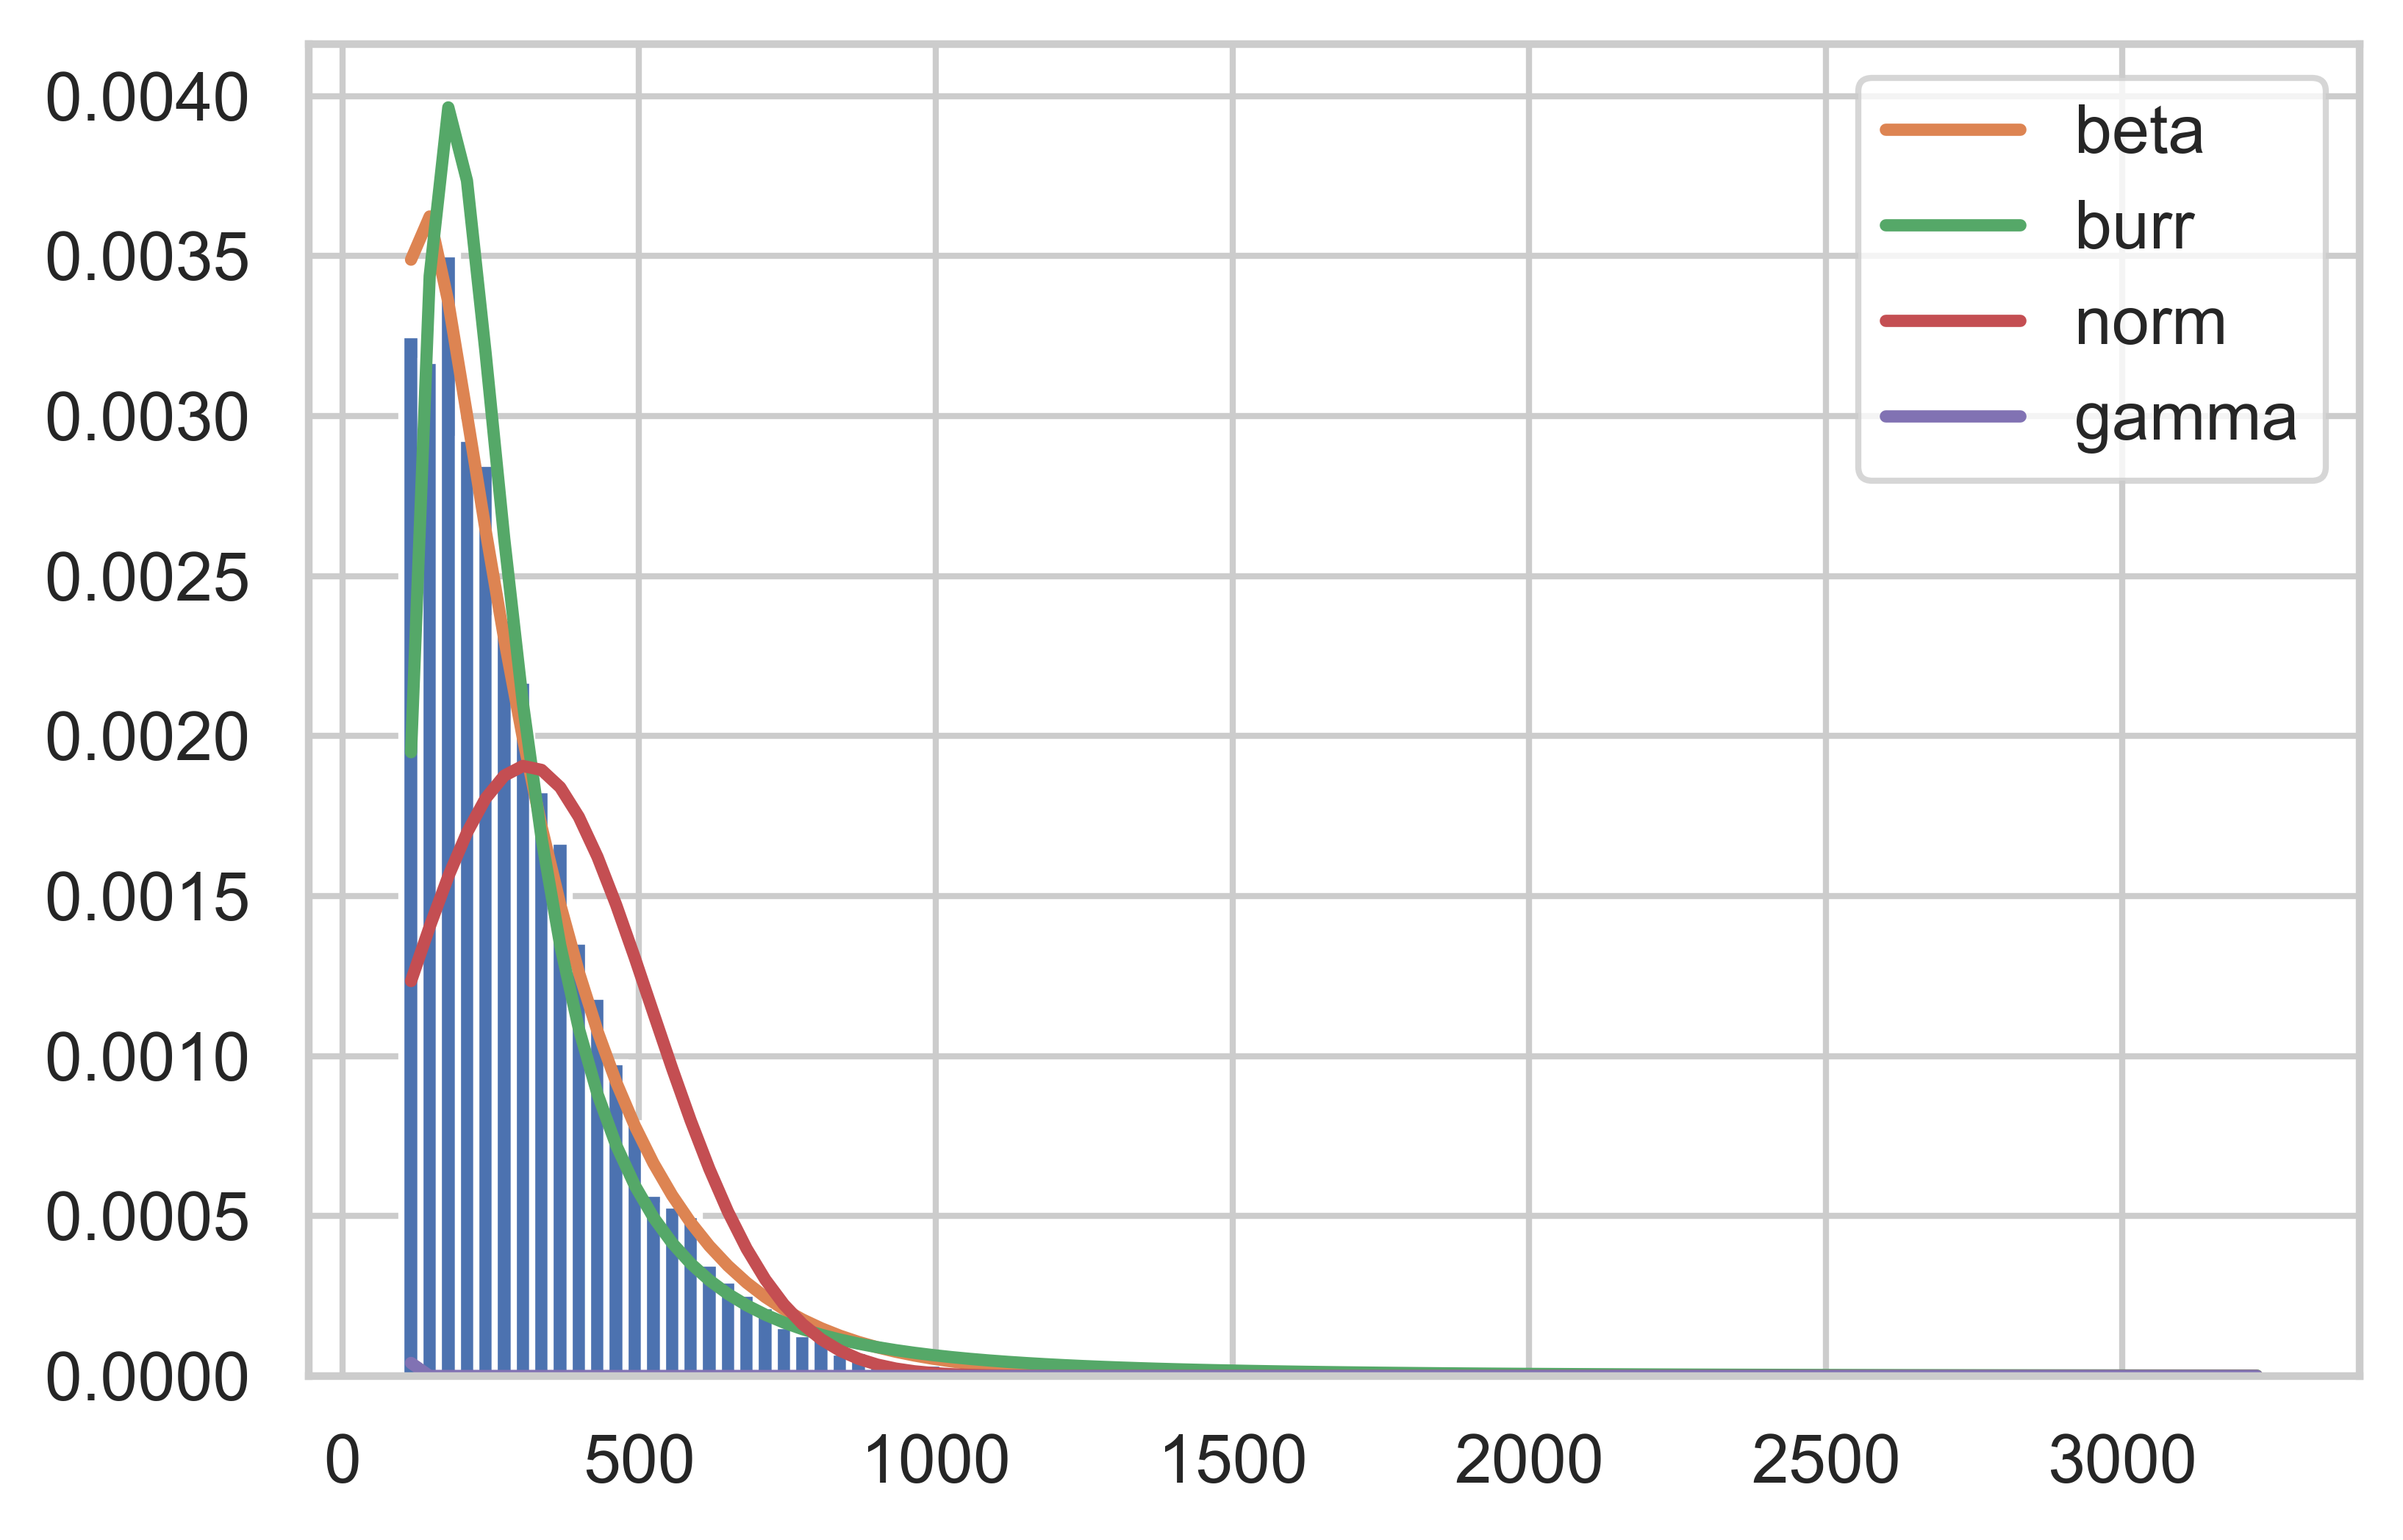

In [92]:
compare_dists(PV_175_250)

Fitting 6 distributions: 100%|████████████████████| 6/6 [00:00<00:00, 36.72it/s]


None
                sumsquare_error           aic          bic  kl_div  \
beta                   0.000164  1.562621e+03 -5123.828006     inf   
burr                   0.000200  1.565537e+03 -5054.182840     inf   
norm                   0.000674  1.933231e+03 -4637.072354     inf   
gamma                  0.001368  1.712664e+04 -4380.969544     inf   
uniformlognorm              inf           inf          inf     inf   

                ks_statistic     ks_pvalue  
beta                0.055646  2.162273e-01  
burr                0.047902  3.807624e-01  
norm                0.188553  1.837643e-11  
gamma               0.944659  0.000000e+00  
uniformlognorm           NaN           NaN  


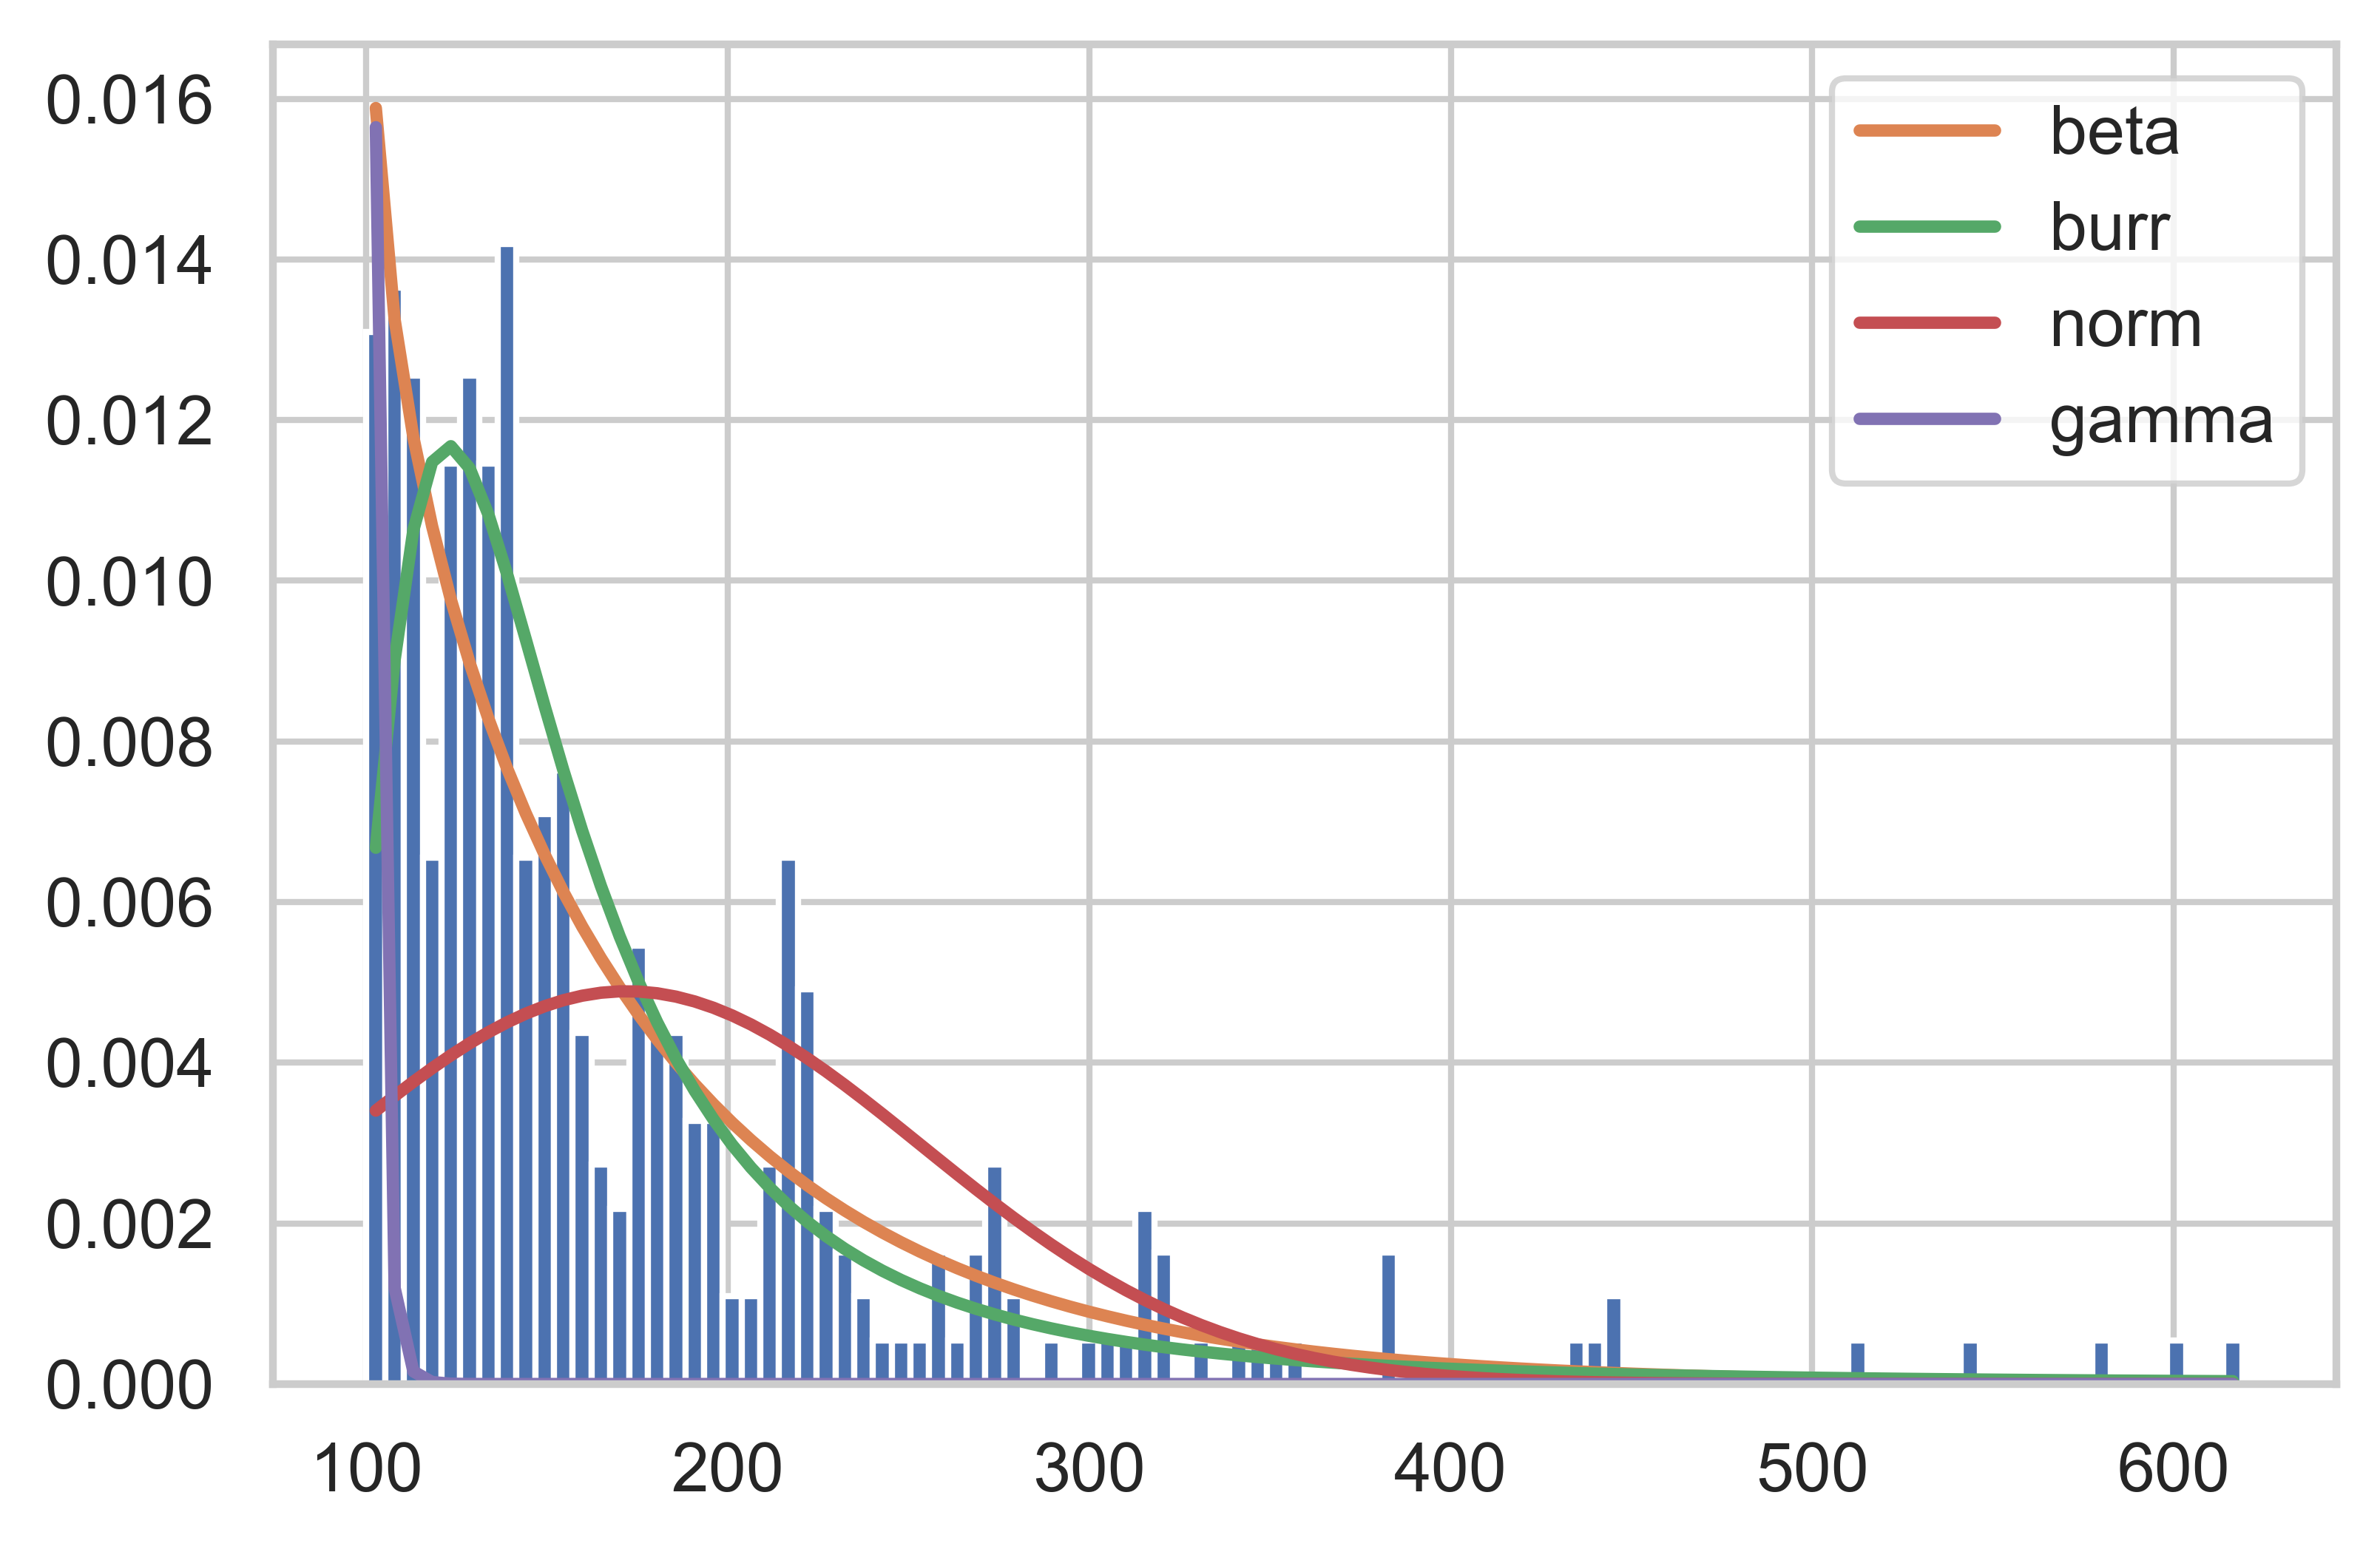

In [37]:
compare_dists(PV_ge_250)

In [94]:
print("The area of your rectangle is cm\u00b2")

The area of your rectangle is cm²
